# Introdução

Notebook com os gráficos utilizados na seção de fatos estilizados da dissertação.

In [1]:
!rm -R ./figs
!mkdir figs

## Pacotes

In [2]:
%config InlineBackend.figure_format = 'retina'
from datetime import datetime as dt
t1 = dt.now()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import pandas_datareader.data as web

from scipy.interpolate import make_interp_spline, BSpline #Smooth plot

sns.set(style="whitegrid")

## Funções e variáveis

In [3]:
def crise_subprime(axes, alpha=0.4):
    axes.axvspan(
    xmin='2007-12-01', 
    xmax='2009-06-01',
    color='gray', 
    label='Crise subprime',
    zorder=0,
    alpha=alpha
)

In [4]:
def crises(axes, color='lightgray', alpha=0.4):
    axes.axvspan(xmin = "1953-07", xmax='1954-04', color = color, alpha=alpha, label = 'Recessão')
    axes.axvspan(xmin = "1957-08", xmax='1958-05', color = color, alpha=alpha, label = '')
    axes.axvspan(xmin = "1960-05", xmax='1961-02', color = color, alpha=alpha, label = '')
    axes.axvspan(xmin = "1969-12", xmax='1970-11', color = color, alpha=alpha, label = '')
    axes.axvspan(xmin = "1973-11", xmax='1975-03', color = color, alpha=alpha, label = '')
    axes.axvspan(xmin = "1980-01", xmax='1980-07', color = color, alpha=alpha, label = '')
    axes.axvspan(xmin = "1981-07", xmax='1982-01', color = color, alpha=alpha, label = '')
    axes.axvspan(xmin = "1990-07", xmax='1991-03', color = color, alpha=alpha, label = '')
    axes.axvspan(xmin = "2001-03", xmax='2001-11', color = color, alpha=alpha, label = '')

In [5]:
start = dt(1949,1,1)
end = dt(2019,1,1)
recessions = web.get_data_fred('USRECM', start, end)
recessions.columns = ['Recessions']
recessions['xmin'] = False
recessions['xmax'] = False
for i in range(len(recessions['Recessions'])-1):
  recessions.iscopy = True
  if recessions['Recessions'].iloc[i] == 0 and recessions['Recessions'].iloc[i+1] == 1:
      recessions['xmin'].iloc[i+1] = True
  elif recessions['Recessions'].iloc[i] == 1 and recessions['Recessions'].iloc[i+1] == 0:
      recessions['xmax'].iloc[i+1] = True
recessions.head()

/home/gpetrini/.local/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Recessions   xmin   xmax
DATE                                
1949-01-01           1  False  False
1949-02-01           1  False  False
1949-03-01           1  False  False
1949-04-01           1  False  False
1949-05-01           1  False  False

In [6]:
def recessions_bars(ax):
    import matplotlib.pyplot as plt
    xmin = recessions[recessions['xmin'] == True]['xmin']
    xmax = recessions[recessions['xmax'] == True]['xmax']
    
    for i in range(len(xmax)):
        ax.axvspan(xmin = xmin.index[i], xmax = xmax.index[i], alpha=.3, color='k')
        
print("Início recessão: " + str(recessions['xmin'][recessions['xmin'] == True].index))
print("Fim recessão: " + str(recessions['xmax'][recessions['xmax'] == True].index))

Início recessão: DatetimeIndex(['1953-07-01', '1957-08-01', '1960-04-01', '1969-12-01',
               '1973-11-01', '1980-01-01', '1981-07-01', '1990-07-01',
               '2001-03-01', '2007-12-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)
Fim recessão: DatetimeIndex(['1949-11-01', '1954-06-01', '1958-05-01', '1961-03-01',
               '1970-12-01', '1975-04-01', '1980-08-01', '1982-12-01',
               '1991-04-01', '2001-12-01', '2009-07-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)


In [7]:
def default_plot():
  plt.xlabel('')
  sns.set_context('talk')
  plt.rcParams['axes.edgecolor']='#333F4B'
  plt.rcParams['axes.linewidth']=0.8
  plt.rcParams['xtick.color']='#333F4B'
  plt.rcParams['ytick.color']='#333F4B'
  ax.grid(False)
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')
  ax.spines['left'].set_smart_bounds(True)
  ax.spines['bottom'].set_smart_bounds(True)
  sns.despine()

In [8]:
def salvar_grafico(file_name, extension=".png", pasta="./figs/"):
    fig.savefig(pasta + file_name + extension, dpi = 300, bbox_inches = 'tight',
    pad_inches = 0.2, transparent = False,)

# Saldo financeiro líquido

In [9]:
start = dt(1947, 1, 1)
end = dt(2015, 1, 1)

df = web.DataReader(
    [
        'W995RC1Q027SBEA', # Domestic business
        'W996RC1Q027SBEA', # Households and institutions
        'AD01RC1Q027SBEA', # Government
        'NETFI', # Balance on Current Account, NIPA's
        'GDP', # Gross Domestic Product
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    'Firmas',
    'Famílias',
    'Governo',
    'Setor Externo',
    'PIB'
]
df.index.name = ''

df = df.dropna()
df['Setor Externo'] = -df['Setor Externo']
df['Soma'] = df.sum(axis='columns')
df = df.apply(lambda x: x/df['PIB'])

df['Setor Privado'] = df['Firmas'] + df['Famílias']
#df = -df

df.head()

Firmas  Famílias   Governo  Setor Externo  PIB      Soma  \
                                                                         
1960-01-01 -0.014306  0.031884 -0.014142      -0.003437  1.0  1.000000   
1960-04-01 -0.008300  0.032069 -0.020587      -0.003184  1.0  0.999998   
1960-07-01 -0.003598  0.037483 -0.026164      -0.007724  1.0  0.999998   
1960-10-01  0.006018  0.036583 -0.033560      -0.009041  1.0  1.000000   
1961-01-01  0.004259  0.043808 -0.038090      -0.009978  1.0  0.999998   

            Setor Privado  
                           
1960-01-01       0.017579  
1960-04-01       0.023769  
1960-07-01       0.033885  
1960-10-01       0.042601  
1961-01-01       0.048066

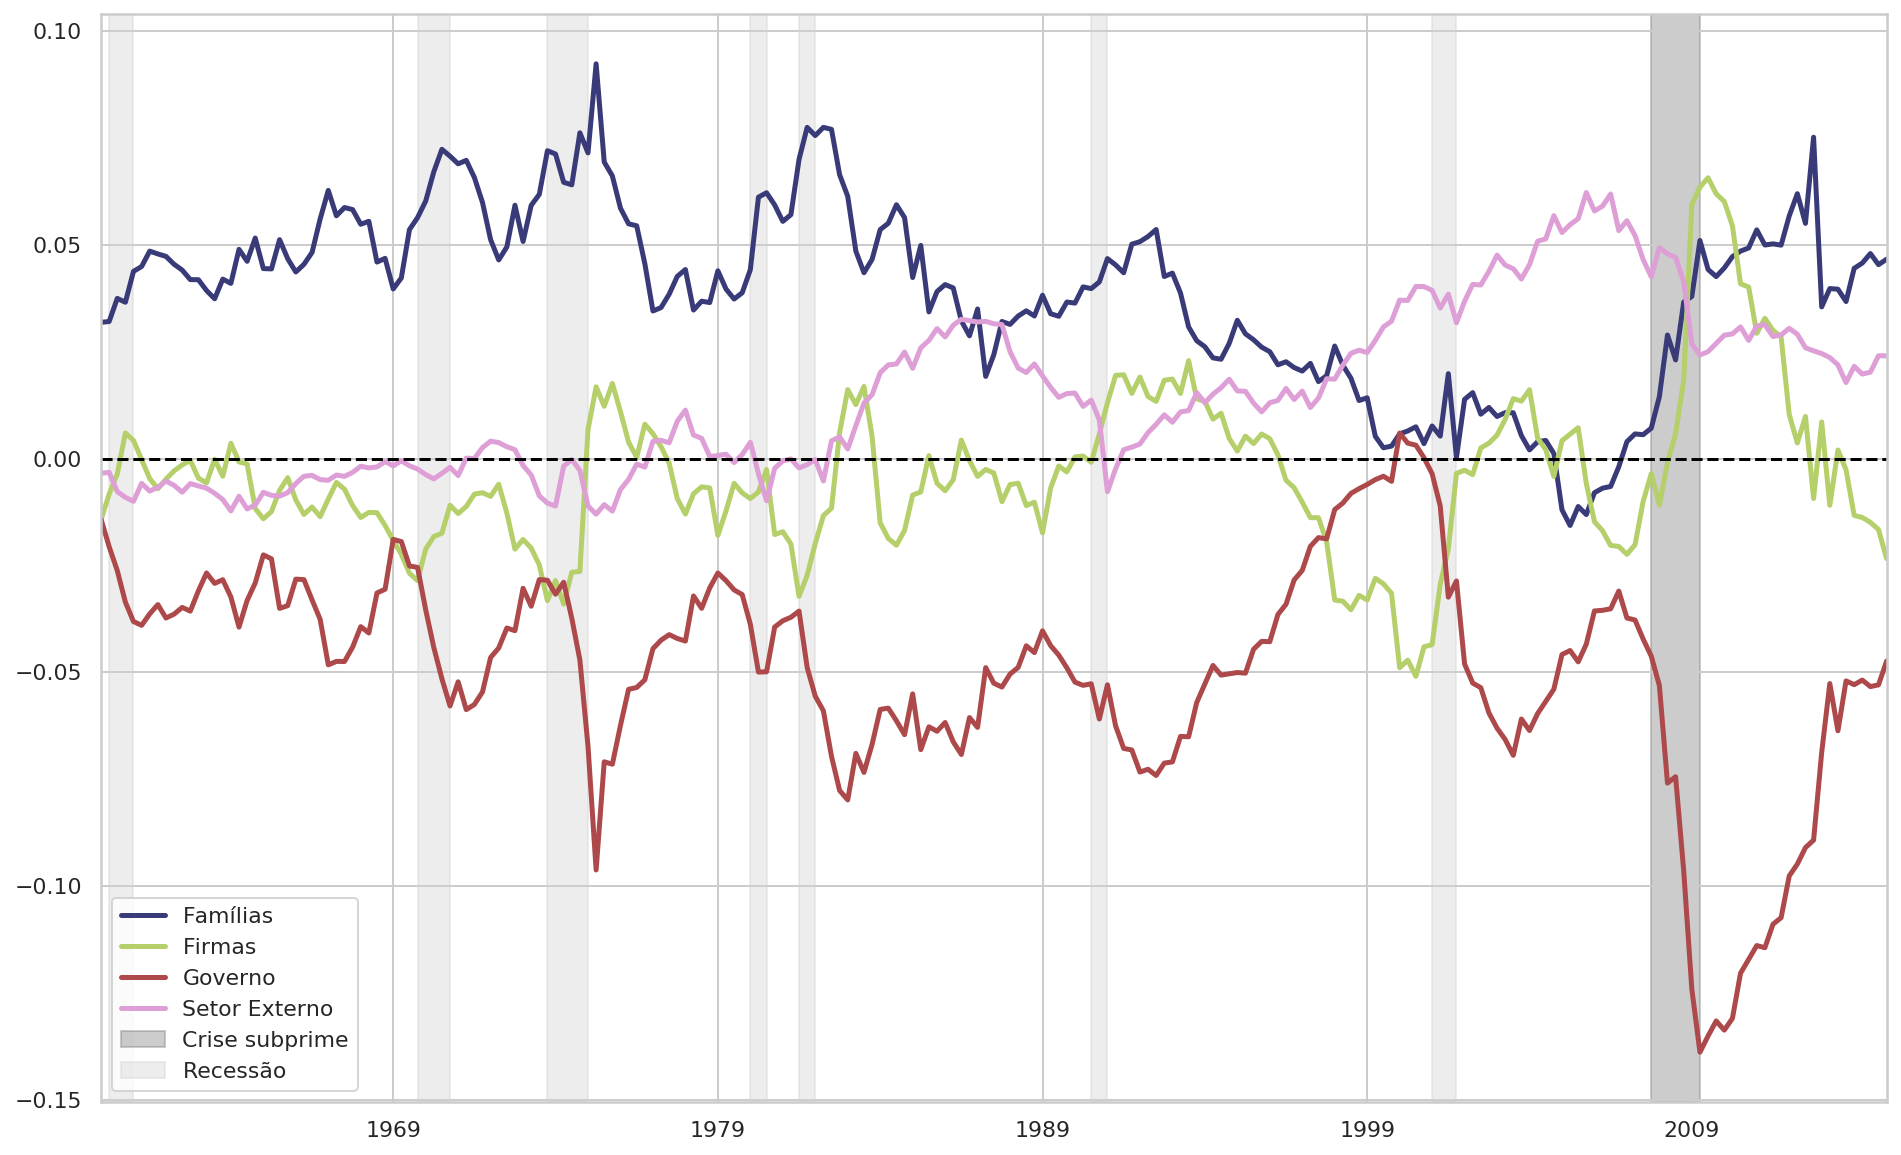

In [10]:
fig, ax = plt.subplots(figsize=(16, 10))

df[[
    'Famílias', 'Firmas',
    'Governo', 
    'Setor Externo'
]].plot(
    ax=ax,
    cmap="tab20b", 
    linewidth=2.5
)

crise_subprime(axes=ax)
crises(axes=ax)
ax.legend()

ax.axhline(y=0, color='black', ls='--')

plt.show()
salvar_grafico("Saldos_Financeiros")

/home/gpetrini/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/__init__.py:62: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


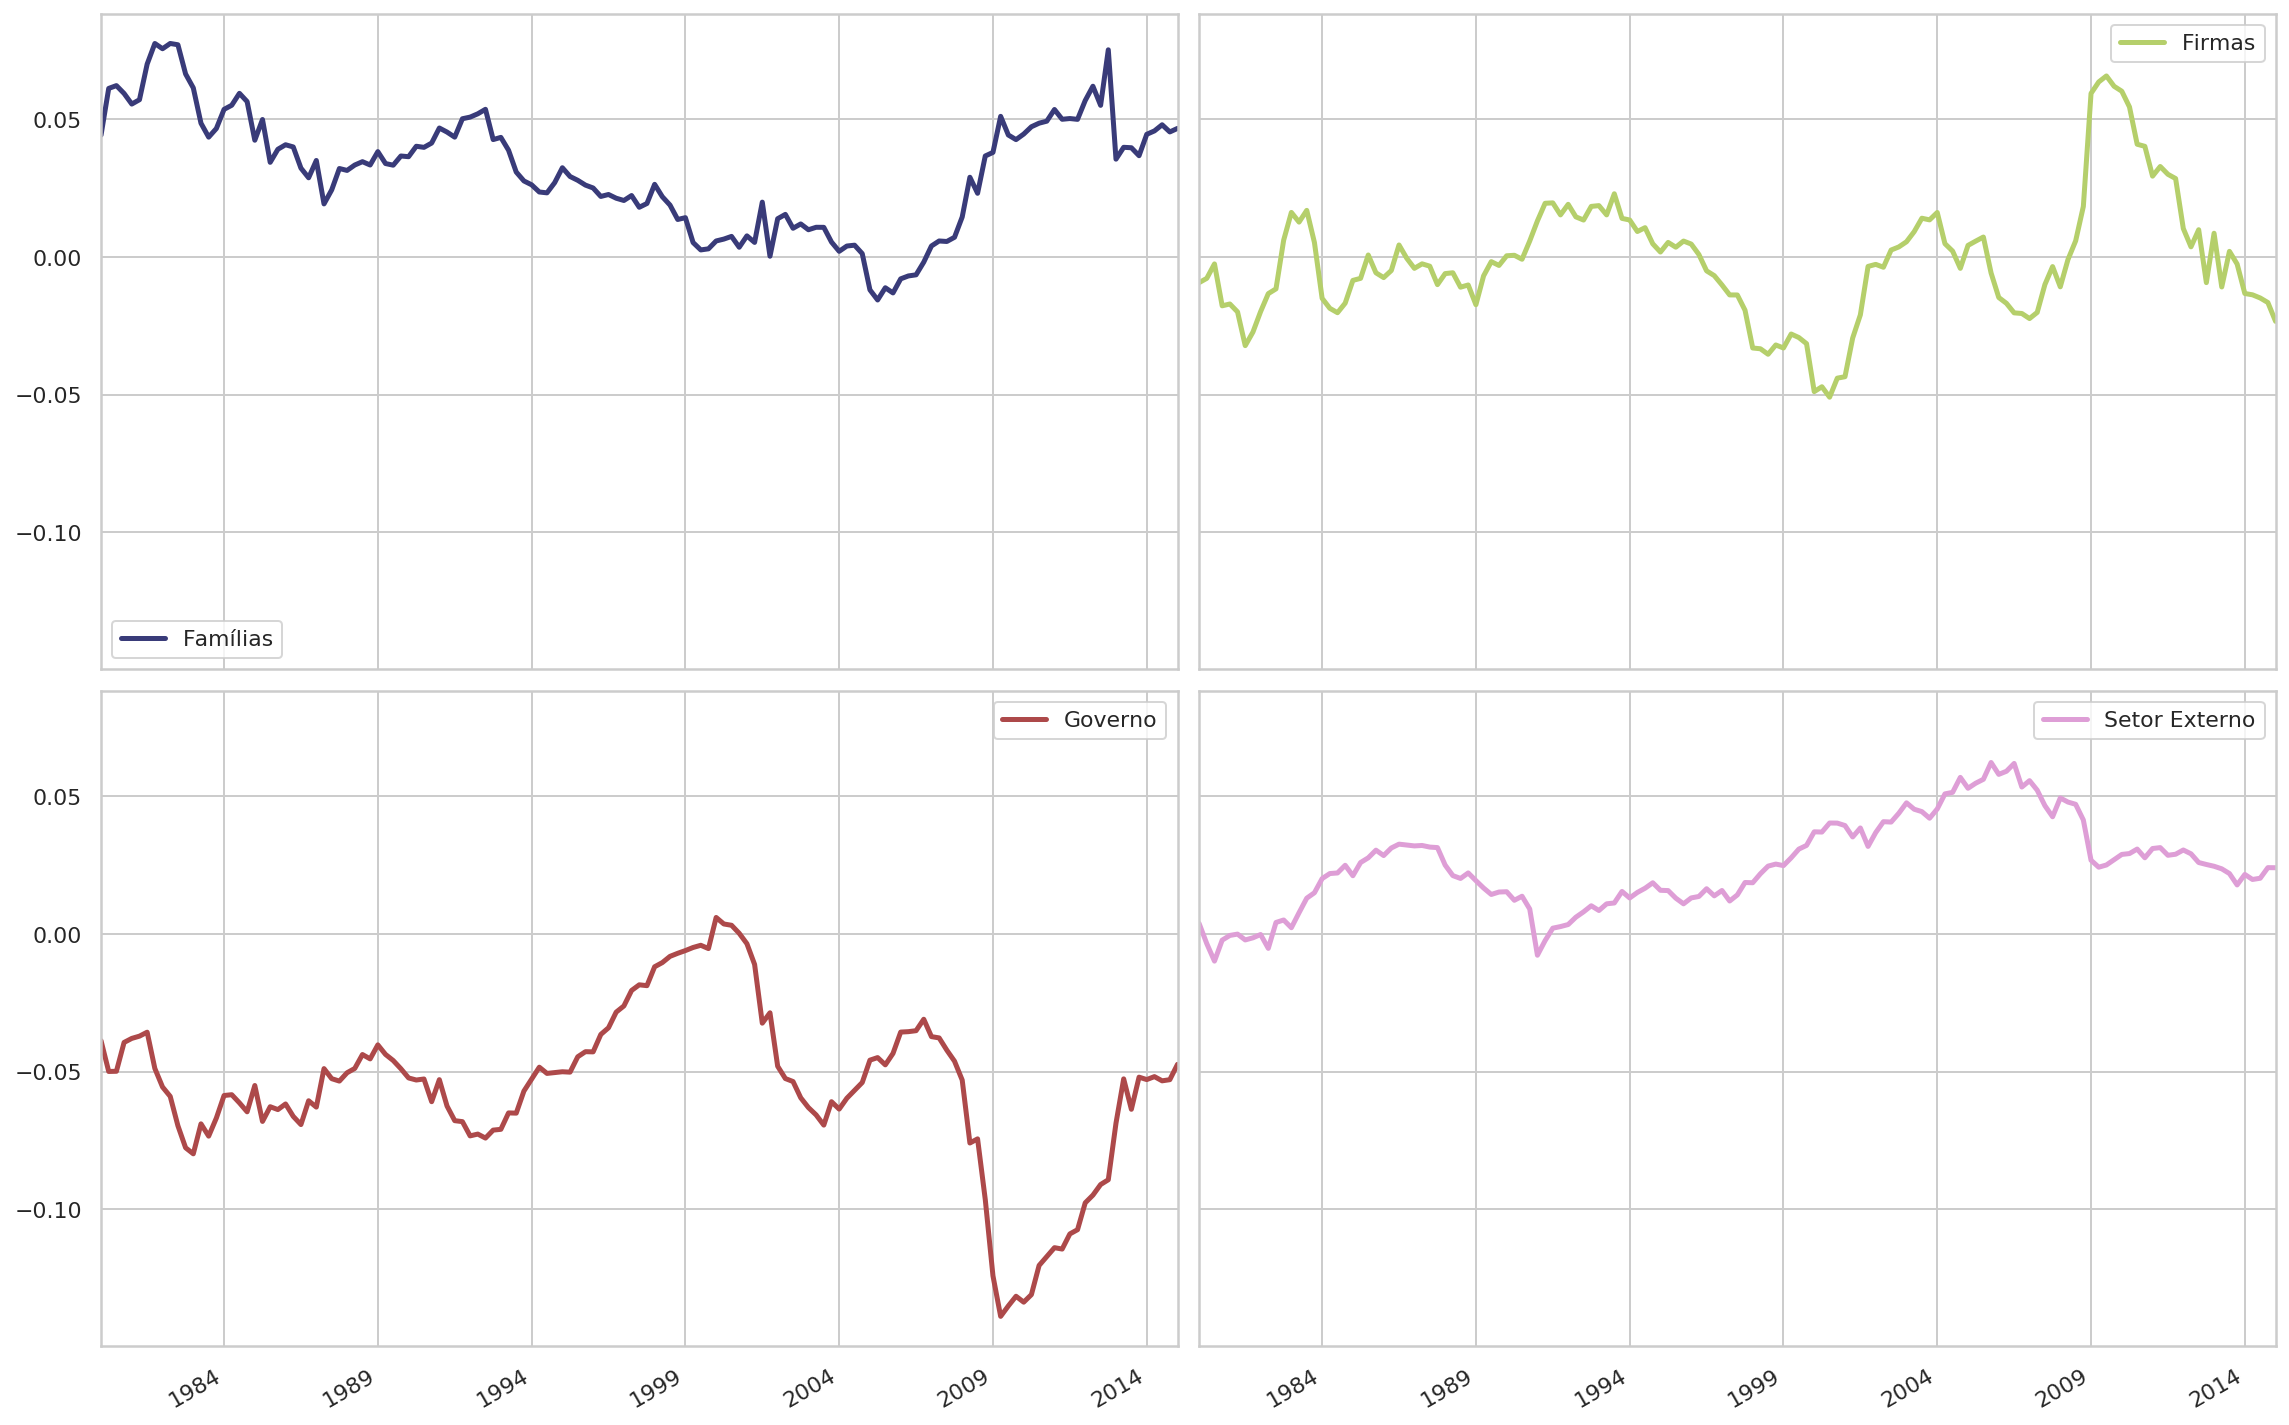

In [11]:
fig, ax = plt.subplots(figsize=(16, 10))

df.loc['1980':, [
    'Famílias', 'Firmas',
    'Governo', 
    'Setor Externo'
]].plot(
    ax=ax,
    cmap="tab20b", 
    linewidth=2.5,
    subplots=True,
    sharex=True, sharey=True,
    layout=(2,2)
)

crises(ax)
crise_subprime(ax)
ax.legend()

ax.axhline(y=0, color='black', ls='--')
plt.tight_layout()

plt.show()

In [12]:
start = dt(1947, 1, 1)
end = dt(2015, 1, 1)

df = web.DataReader(
    [
        'TFAABSHNO', # total financial assets, Level
        'BOGZ1LM152010005Q', # nonfinancial assets, Market value levels
        'TLBSHNO', # total liabilities, Level
        'TNWBSHNO', # net worth, Level
        'TABSHNO', # Households and nonprofit organizations; total assets, Level
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    'Ativos Financeiros',
    'Ativos não financeiros',
    'Passivos',
    'Patrimônio Líquido',
    'Riqueza total'
]
df.index.name = ''
df['Ativos não financeiros'] = df['Ativos não financeiros']/1000

df = df.dropna()
df = df.apply(lambda x: x/df['Riqueza total'])*100

df.head()

Ativos Financeiros  Ativos não financeiros  Passivos  \
                                                                   
1947-10-01           72.756695               27.243305  4.508196   
1948-10-01           71.280588               28.719412  5.045646   
1949-10-01           70.237658               29.762342  5.519234   
1950-10-01           68.973207               31.026793  6.152011   
1951-10-01           68.456019               31.543981  6.262744   

            Patrimônio Líquido  Riqueza total  
                                               
1947-10-01           95.491804          100.0  
1948-10-01           94.954354          100.0  
1949-10-01           94.480766          100.0  
1950-10-01           93.847989          100.0  
1951-10-01           93.737256          100.0

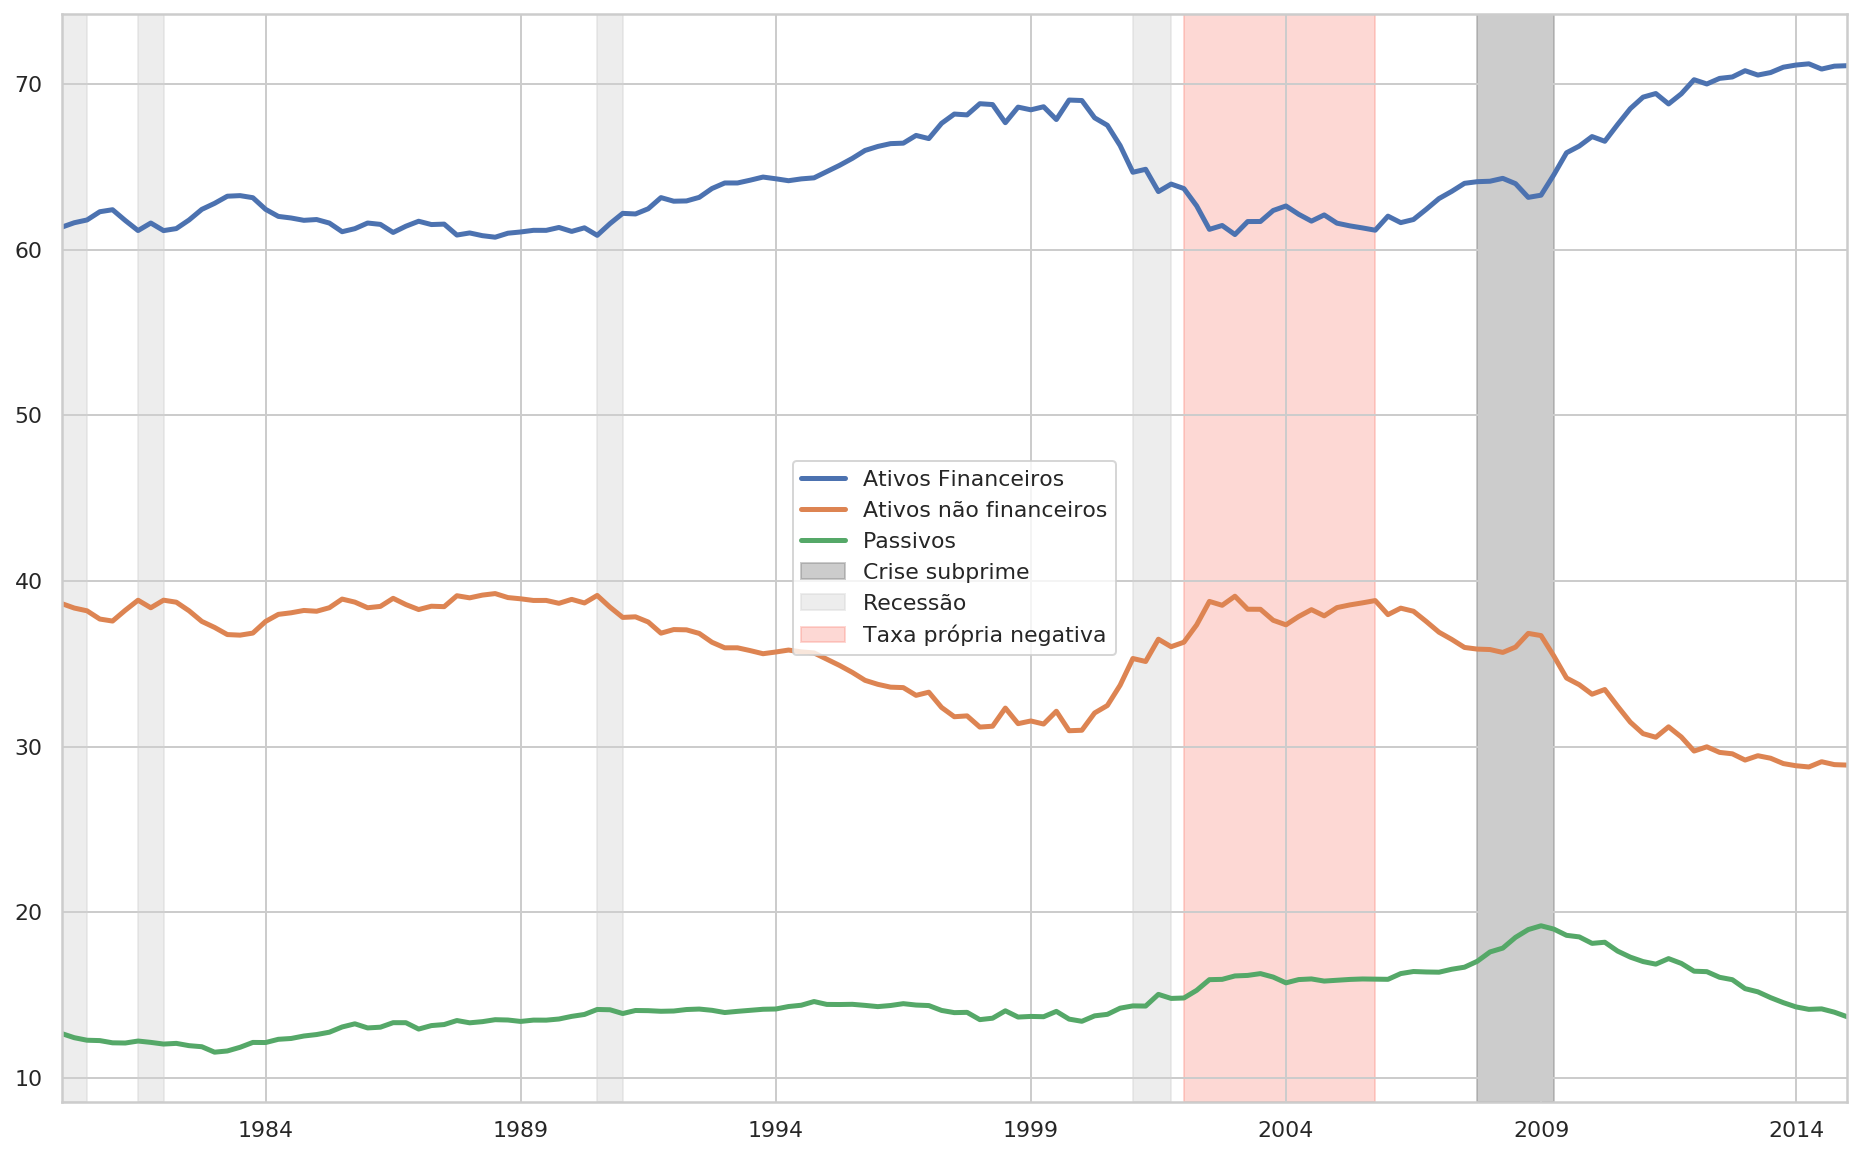

In [13]:
fig, ax = plt.subplots(figsize=(16, 10))

df.drop(['Riqueza total', 'Patrimônio Líquido'],'columns')[df.index>='1980-01-01'].plot(
    ax=ax,
    linewidth=2.5,
)

crise_subprime(ax)
crises(ax)
ax.axvspan(
    xmin='2002-01-01', 
    xmax='2005-12-01',
    color='salmon', 
    label='Taxa própria negativa',
    zorder=-1,
    alpha=.3
)

ax.legend()

plt.show()

# Consumo e Endividamento das famílias

## Endividamento das famílias

In [14]:
start = dt(1947, 1, 1)
end = dt(2015, 1, 1)

df = web.DataReader(
    [
        'HHMSDODNS', # home mortgages; liability, Level
        'HCCSDODNS', # consumer credit; liability, Level
        'TNWBSHNO', # net worth, Level
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    'Hipotecas',
    'Crédito',
    'Patrimônio líquido',
]

df.index.name = ''

df = df.dropna()
df = df.apply(lambda x: x/df['Patrimônio líquido']).drop(['Patrimônio líquido'], 'columns')

df.head()

Hipotecas   Crédito
                               
1947-10-01   0.028719  0.013510
1948-10-01   0.032226  0.015748
1949-10-01   0.034651  0.017947
1950-10-01   0.038622  0.020439
1951-10-01   0.040440  0.019794

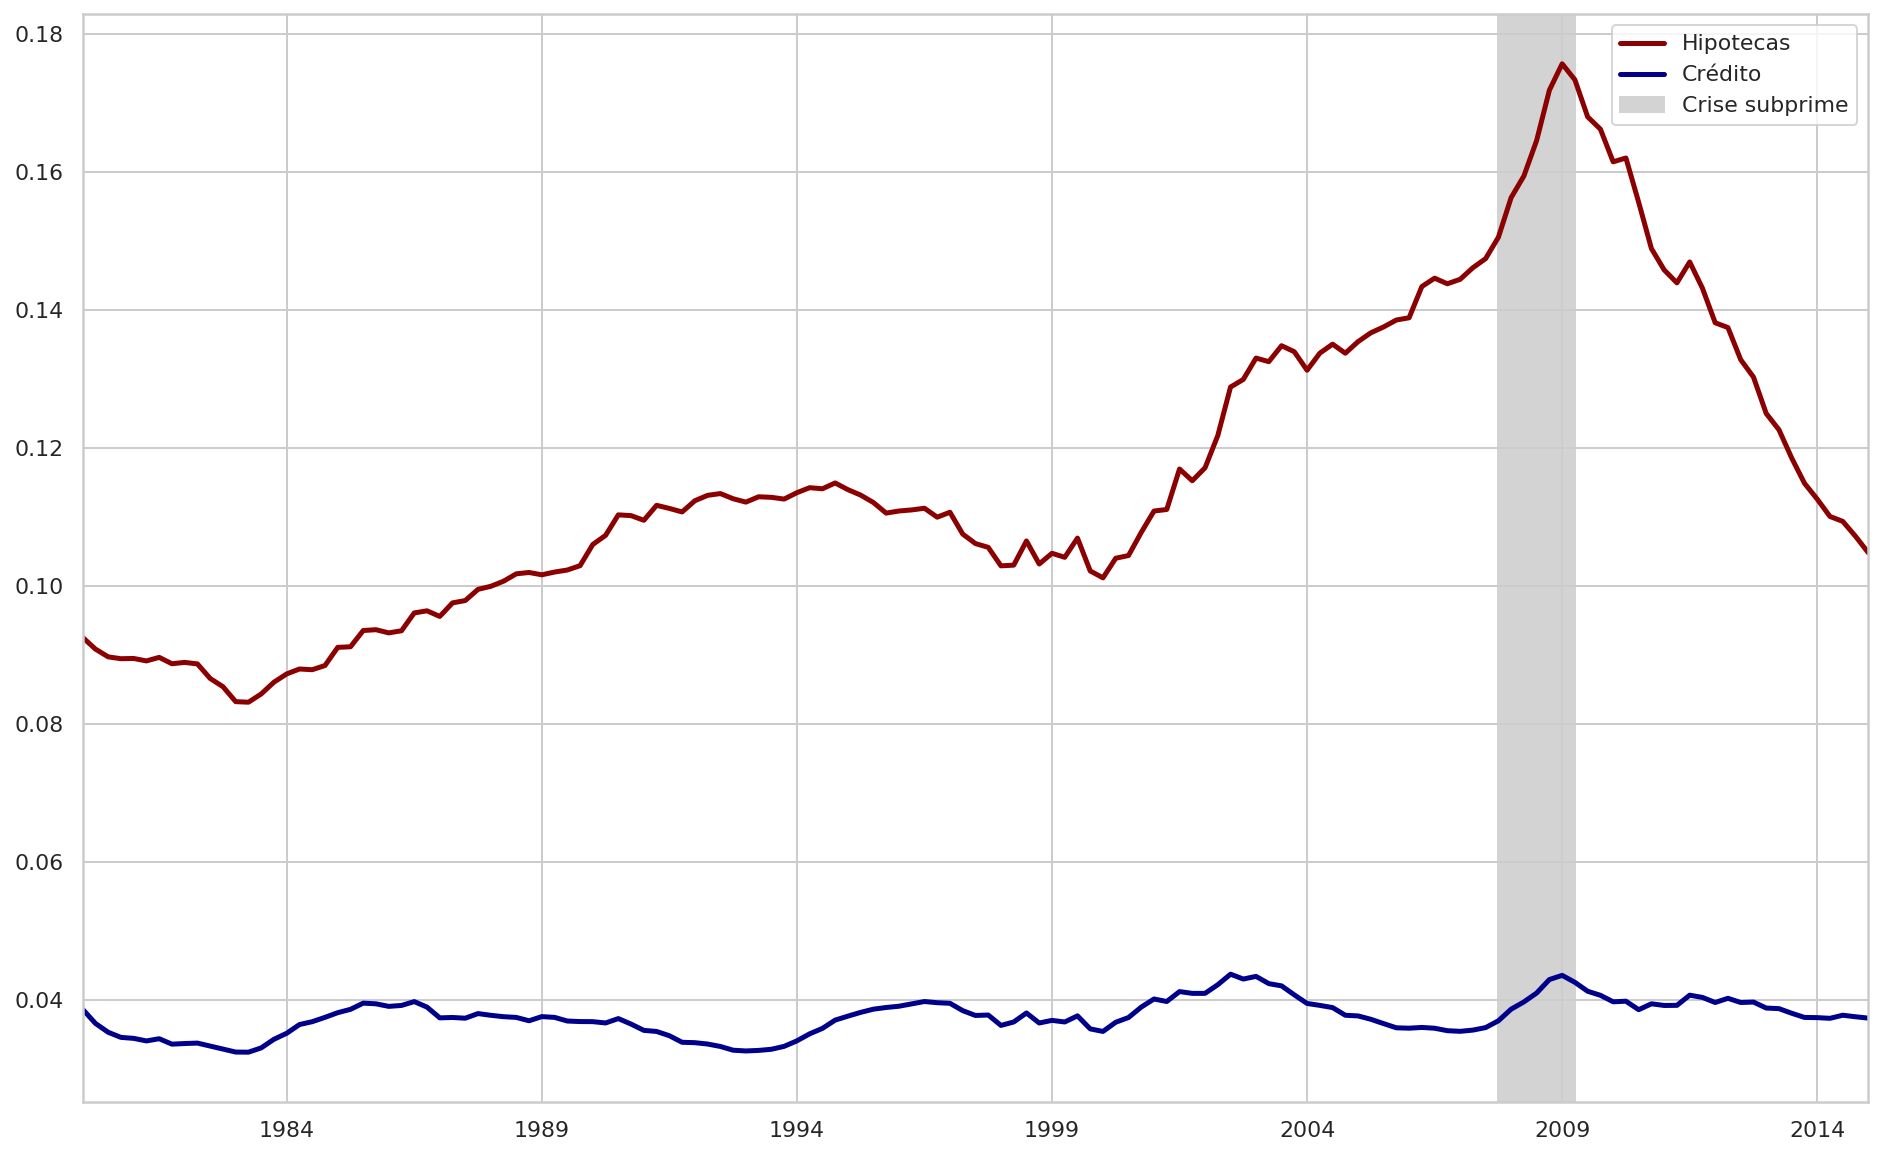

In [15]:
fig, ax = plt.subplots(figsize=(16, 10))

df.iloc[df.index>='1980-01',:].plot(
    ax=ax,
    color=('darkred', 'darkblue'),
    linewidth=2.5,
)

ax.axvspan(
    xmin='2007-12-01', 
    xmax='2009-06-01',
    color='lightgray', 
    label='Crise subprime',
    zorder=0
)
ax.legend()

plt.show()

In [16]:
start = dt(1947, 1, 1)
end = dt(2015, 1, 1)

df = web.DataReader(
    [
        'CMDEBT', # debt securities and loans; liability, Level 
        #'PCEC', # Personal Consumption Expenditures # CHECAR
        'DPHCRC1A027NBEA', # Personal consumption expenditures: Household consumption expenditures
        'TNWBSHNO', # net worth, Level
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    'Dívida',
    'Consumo',
    'Patrimônio líquido',
]

df.index.name = ''

df = df.dropna()
df = df.apply(lambda x: x/df['Patrimônio líquido']).drop(['Patrimônio líquido'], 'columns')

df.head()

Dívida   Consumo
                              
1952-01-01  0.065992  0.166656
1953-01-01  0.073990  0.170382
1954-01-01  0.078061  0.167790
1955-01-01  0.083522  0.169325
1956-01-01  0.088642  0.162716

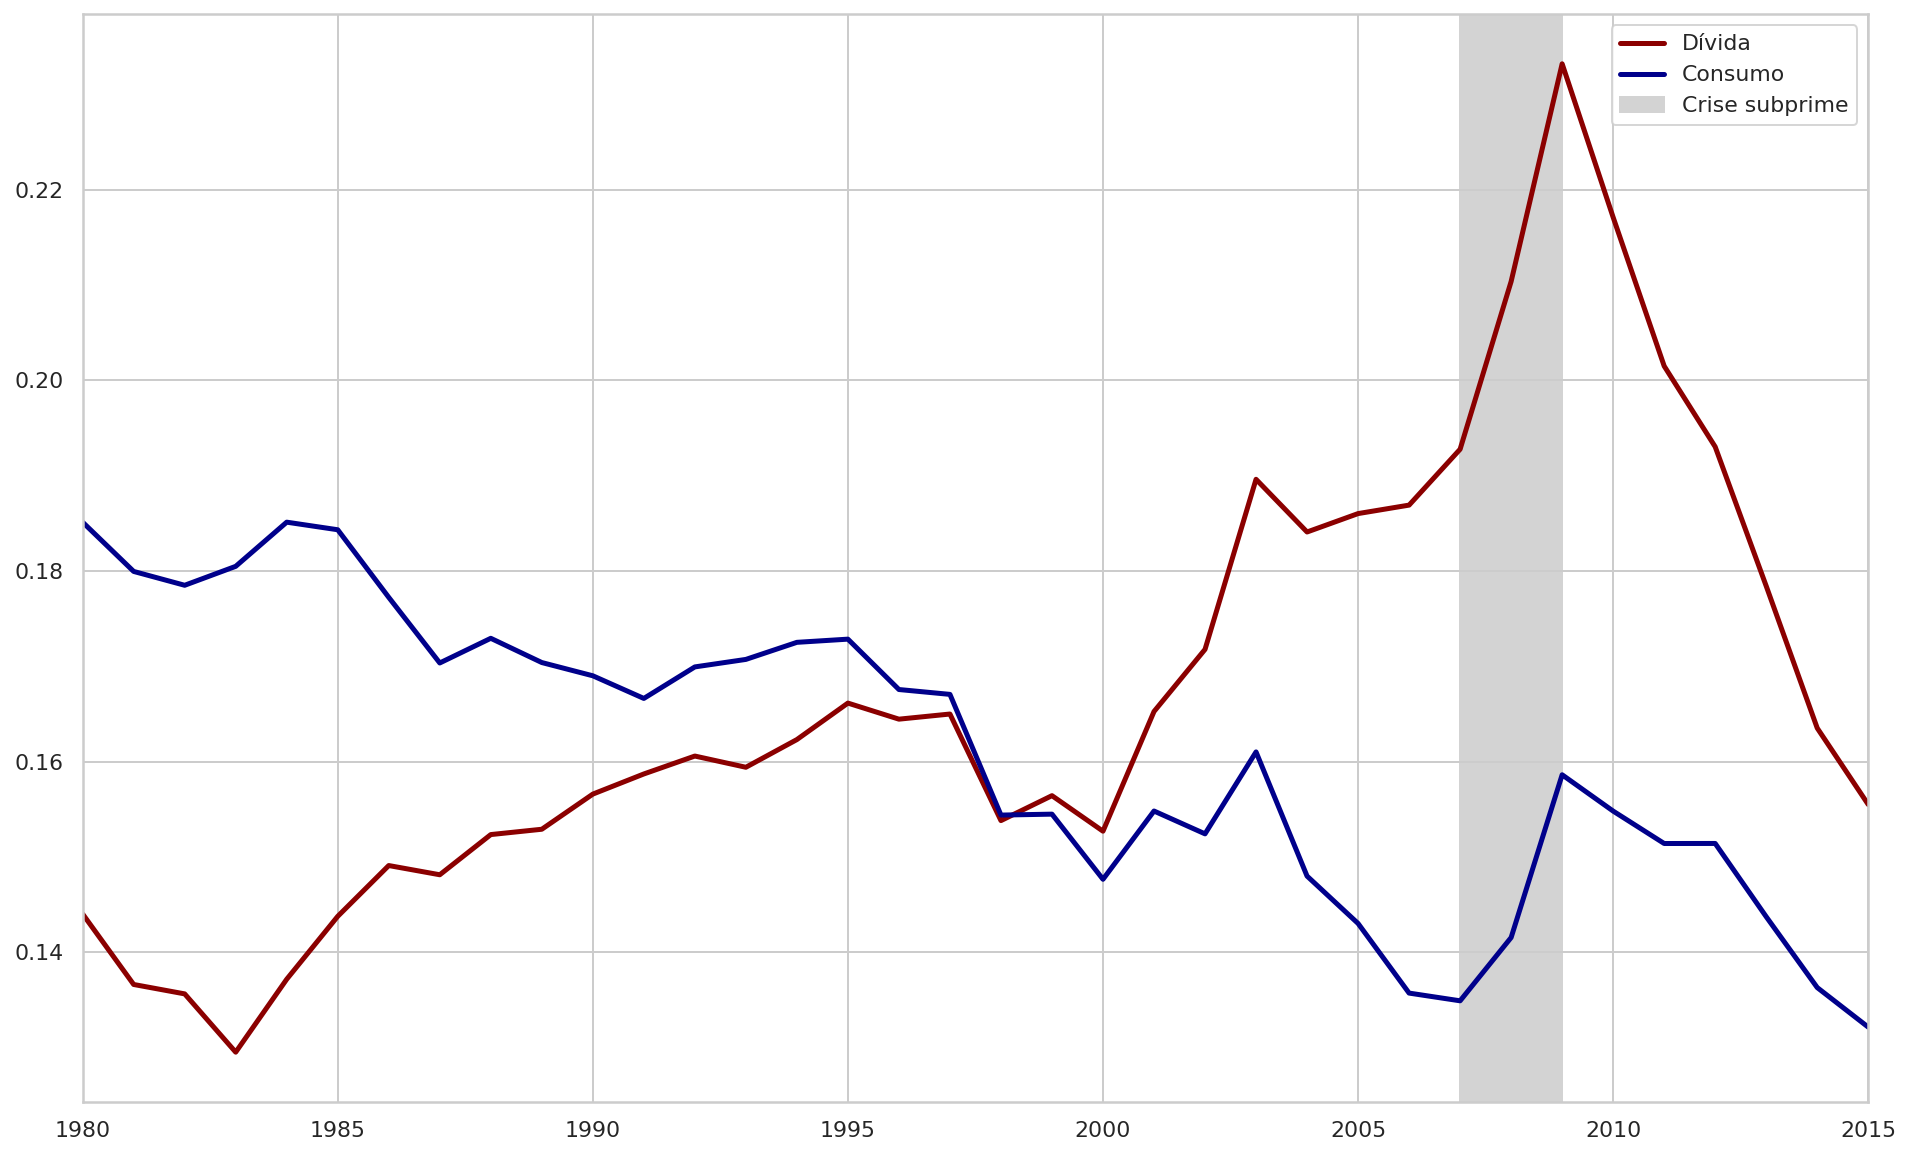

In [17]:
fig, ax = plt.subplots(figsize=(16, 10))

df.iloc[df.index>='1980-01',:].plot(
    ax=ax,
    color=('darkred', 'darkblue'),
    linewidth=2.5,
)

ax.axvspan(
    xmin='2007-12-01', 
    xmax='2009-06-01',
    color='lightgray', 
    label='Crise subprime',
    zorder=0
)
ax.legend()

plt.show()

In [18]:
start = dt(1947, 1, 1)
end = dt(2015, 1, 1)

df = web.DataReader(
    [
        'CMDEBT', # debt securities and loans; liability, Level 
        'CSUSHPINSA', # S&P/Case-Shiller U.S. National Home Price Index
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    'Dívida das famílias',
    'Preço dos imóveis',
]

for i in df.columns:
    df[i] = (df[i]/df[i]['2000-01-01'])*100

df.index.name = ''
df = df.resample("QS").mean().dropna()
df.head()

Dívida das famílias  Preço dos imóveis
                                                  
1987-01-01            38.457941          64.133333
1987-04-01            39.632448          65.600667
1987-07-01            40.624038          67.240667
1987-10-01            41.026038          68.127333
1988-01-01            42.135434          68.955667

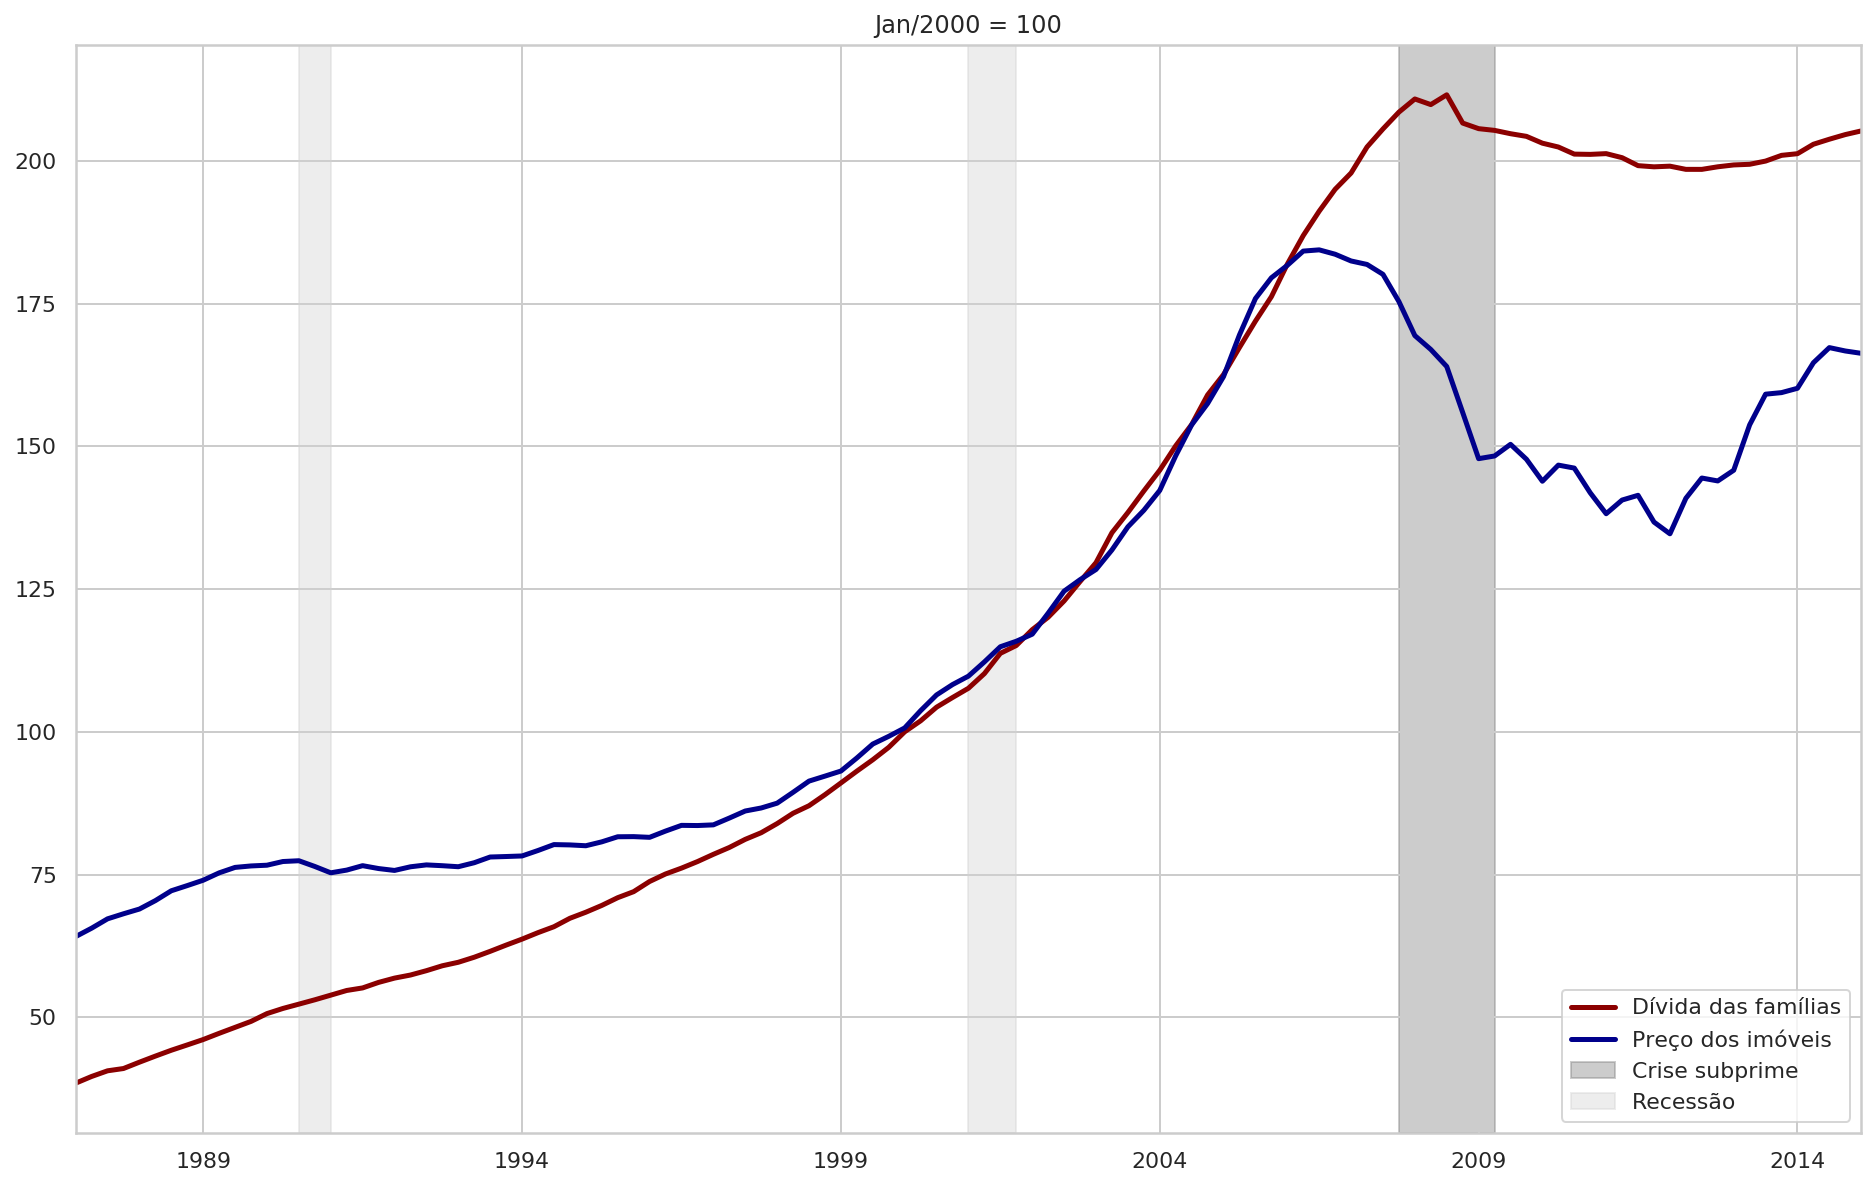

In [19]:
fig, ax = plt.subplots(figsize=(16, 10))

df.iloc[df.index>='1970-01',:].plot(
    ax=ax,
    color=('darkred', 'darkblue'),
    linewidth=2.5,
)

crise_subprime(ax)
crises(ax)
ax.legend()

ax.set_title('Jan/2000 = 100')
plt.show()
salvar_grafico(file_name="Divida_PrecoImoveis")

## Crédito para as famílias

In [20]:
start = dt(1945, 1, 1)
end = dt(2015, 1, 1)

df = web.DataReader(
    [
        'BOGZ1FL154104015Q', # home mortgages and consumer credit; liability, Level 
        'HHMSDODNS', # home mortgages; liability, Level
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    'Crédito para as famílias',
    'Hipotecas'
]

df.index.name = ''
df = df.pct_change(4).dropna()
df.head()

Crédito para as famílias  Hipotecas
                                               
1946-10-01                  0.288991   0.234898
1947-01-01                  0.288991   0.234898
1947-04-01                  0.288991   0.234898
1947-07-01                  0.288991   0.234898
1947-10-01                  0.264258   0.223680

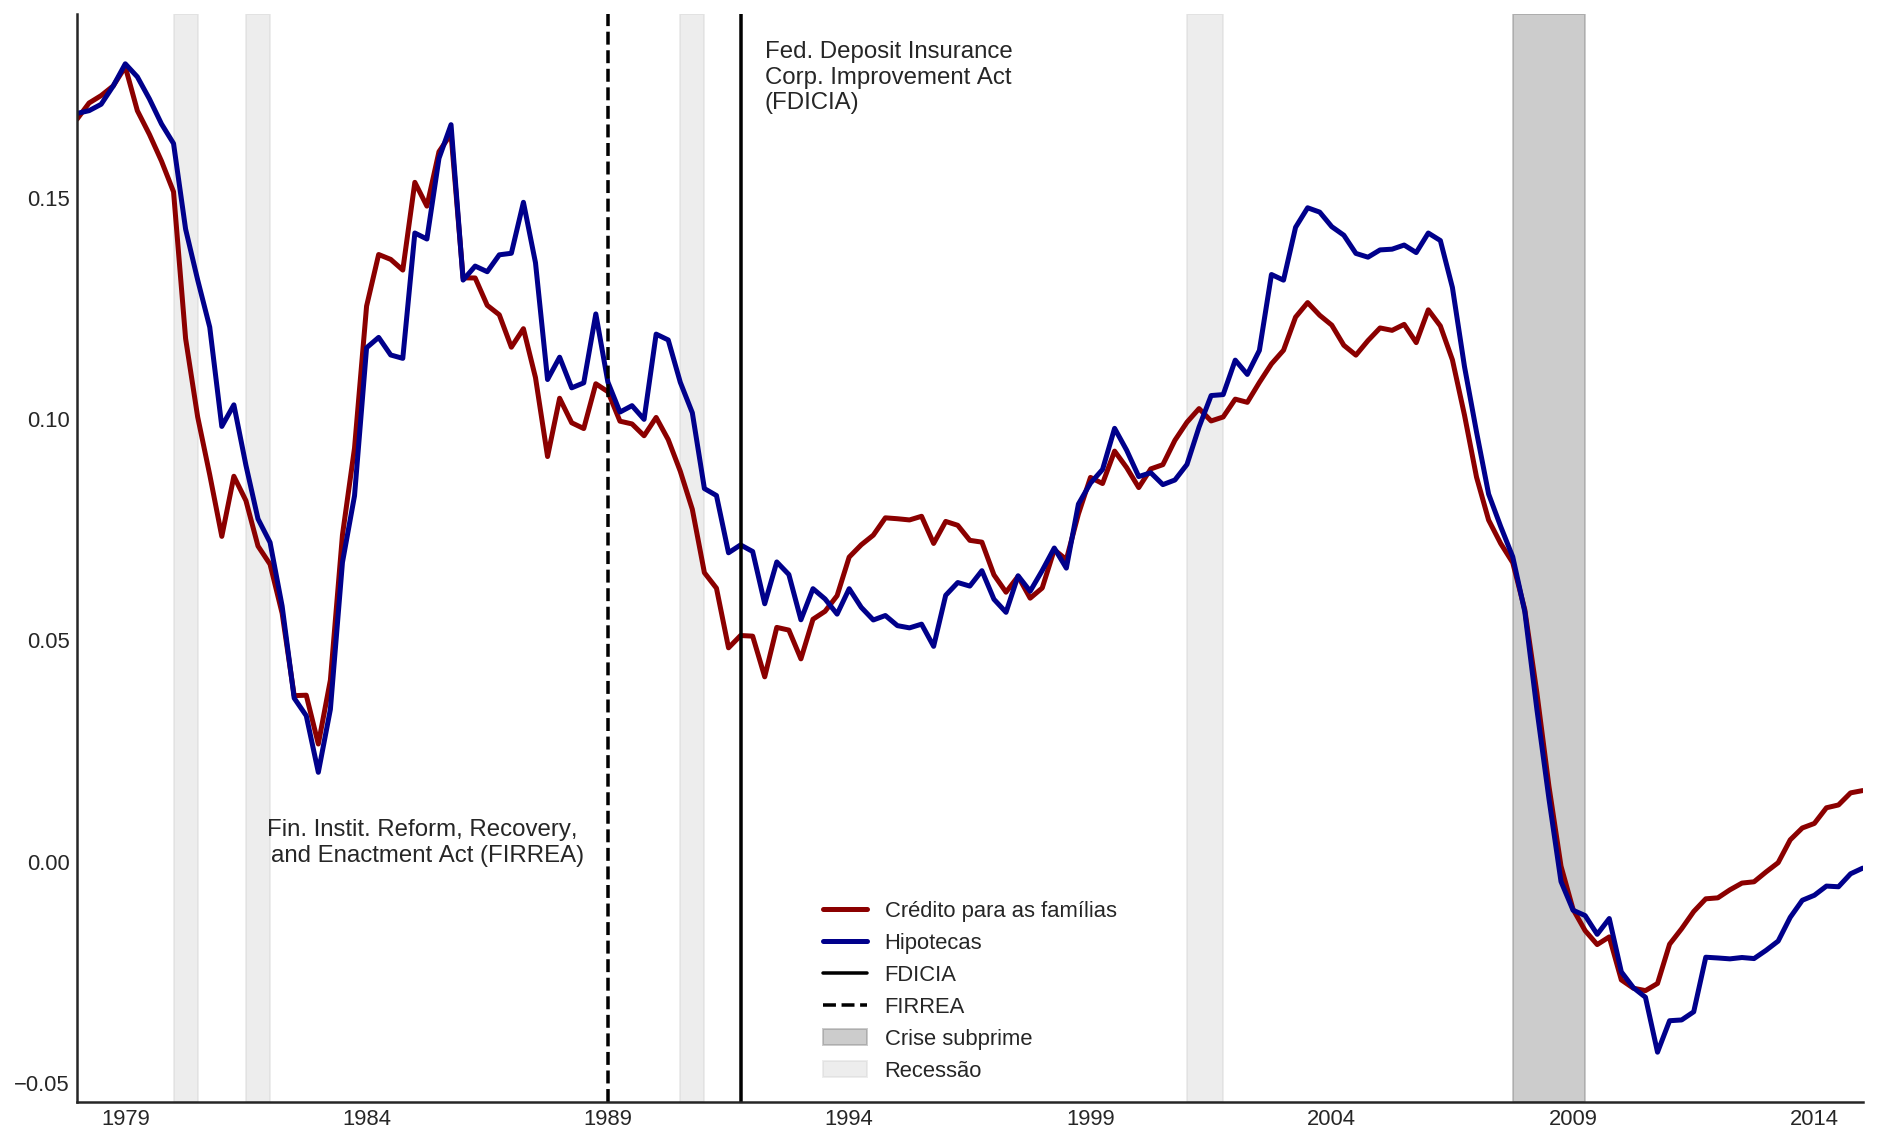

In [21]:
plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize=(16, 10))

df.iloc[df.index>='1978-01',:].plot(
    ax=ax,
    linewidth=2.5,
    color=('darkred', 'darkblue')
)

crise_subprime(ax)
crises(ax)
ax.axvline(
    x="1991-12-19", 
    label='FDICIA', 
    color='black', 
    ls='-', 
    linewidth=1.75
)
ax.axvline(
    x="1989-02-06", 
    label='FIRREA', 
    color='black', 
    ls='--', 
    linewidth=1.75
)

ax.legend()

ax.text(
    s = "Fed. Deposit Insurance \nCorp. Improvement Act \n(FDICIA)",
    y = 0.17,
    x="1992-06-01", 
    fontsize=12,
       )

ax.text(
    s = "Fin. Instit. Reform, Recovery, \nand Enactment Act (FIRREA)",
    y = 0.,
    x="1988-08-01", 
    fontsize=12,
    horizontalalignment='right'
       )

sns.despine()
plt.show()
salvar_grafico(file_name="FDICIA")

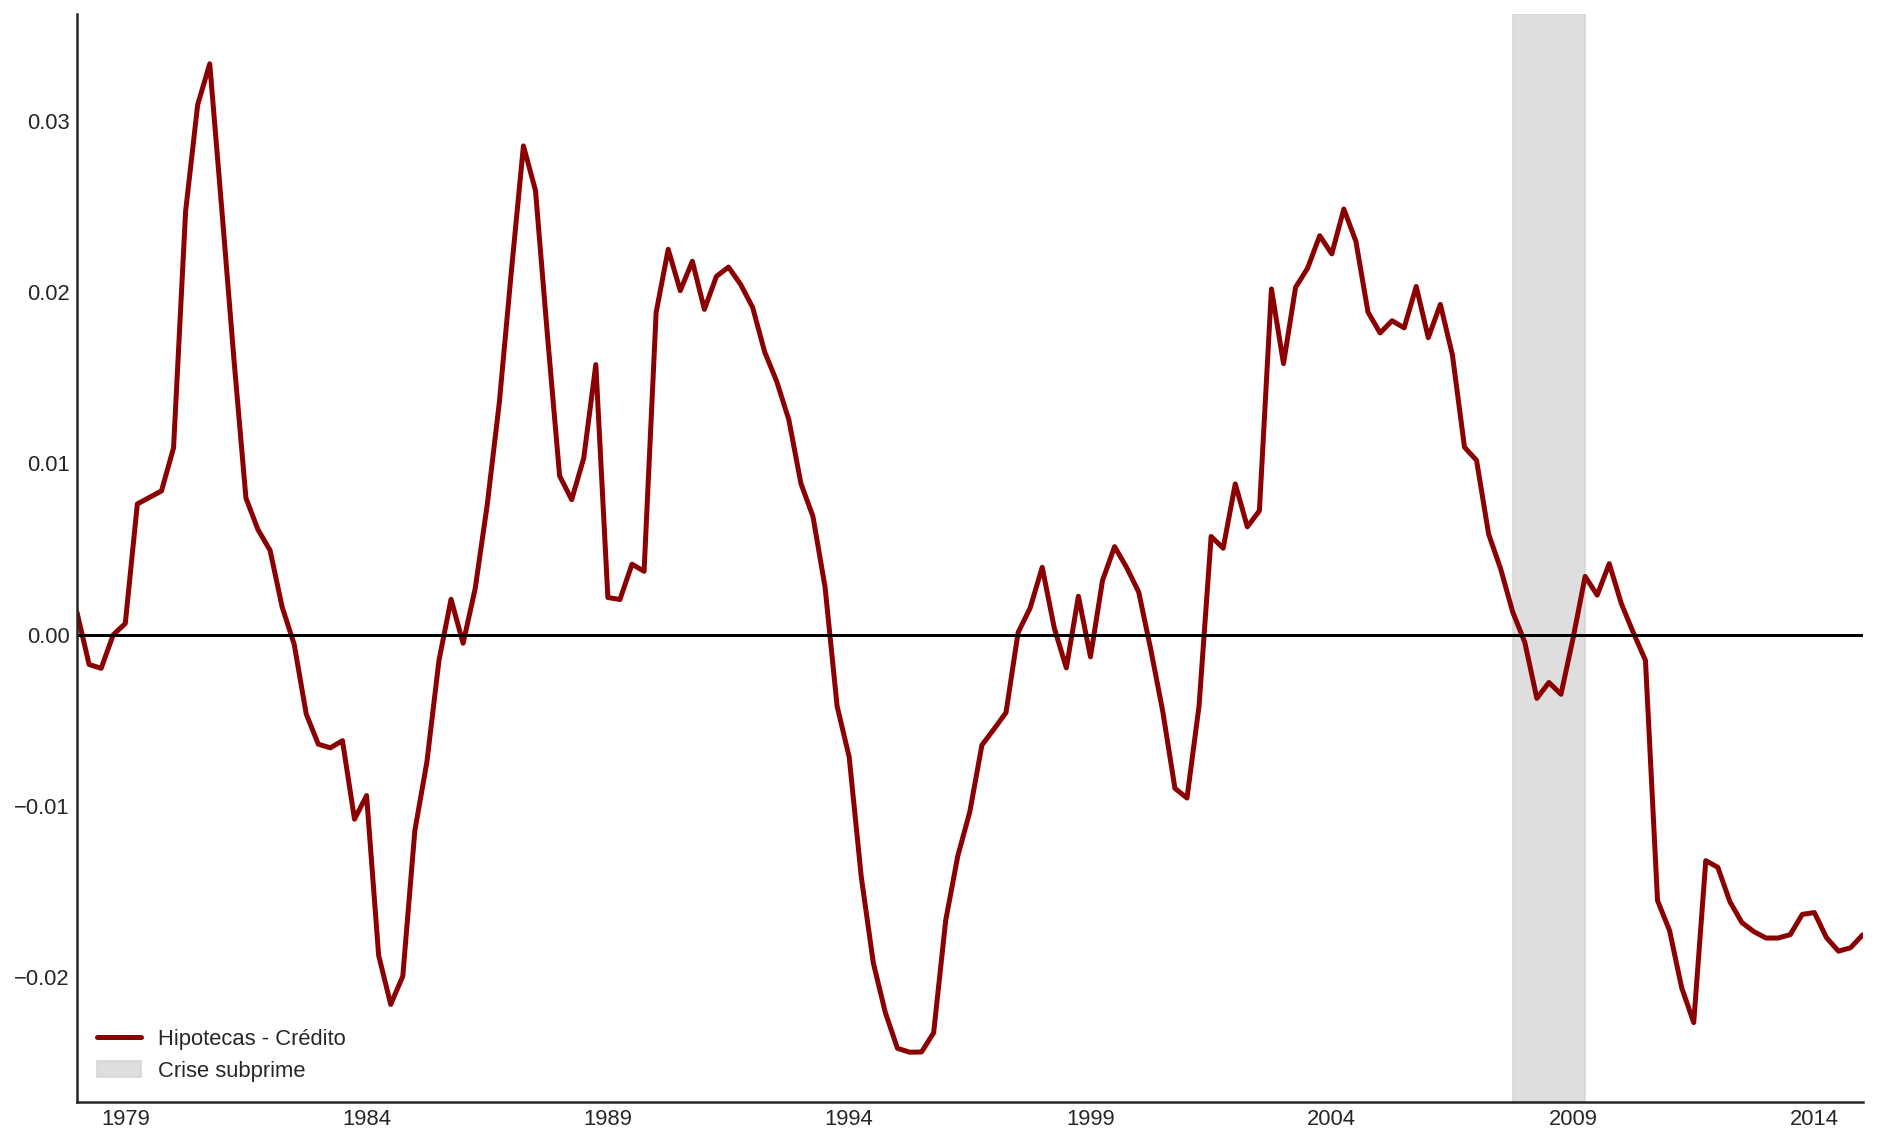

In [22]:
plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize=(16, 10))

(df["Hipotecas"] - df["Crédito para as famílias"])[df.index>='1978-01'].plot(
    ax=ax,
    linewidth=2.5,
    color=('darkred'),
    label="Hipotecas - Crédito"
)

ax.axvspan(
    xmin='2007-12-01', 
    xmax='2009-06-01',
    color='lightgray', 
    label='Crise subprime',
    alpha=.75,
    zorder=0,
)

ax.legend()
ax.axhline(y=0, color='black', ls='-')

sns.despine()
plt.show()

## Alavancagem

In [23]:
start = dt(1947, 1, 1)
end = dt(2015, 1, 1)

df = web.DataReader(
    [
        'TDSP', # Household Debt Service Payments as a Percent of Disposable Personal Income
        'FODSP', # Household Financial Obligations as a percent of Disposable Personal Income
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    'Serviço da dívida/Renda disponível',
    'Obrigações financeiras/Renda disponível',
]
df.index.name = ''

for i in df.columns:
    df[i] = df[i]/(df[i][0])

df.head()

Serviço da dívida/Renda disponível  \
                                                 
1980-01-01                            1.000000   
1980-04-01                            1.001993   
1980-07-01                            0.980279   
1980-10-01                            0.965815   
1981-01-01                            0.969081   

            Obrigações financeiras/Renda disponível  
                                                     
1980-01-01                                 1.000000  
1980-04-01                                 1.005614  
1980-07-01                                 0.989803  
1980-10-01                                 0.978507  
1981-01-01                                 0.981765

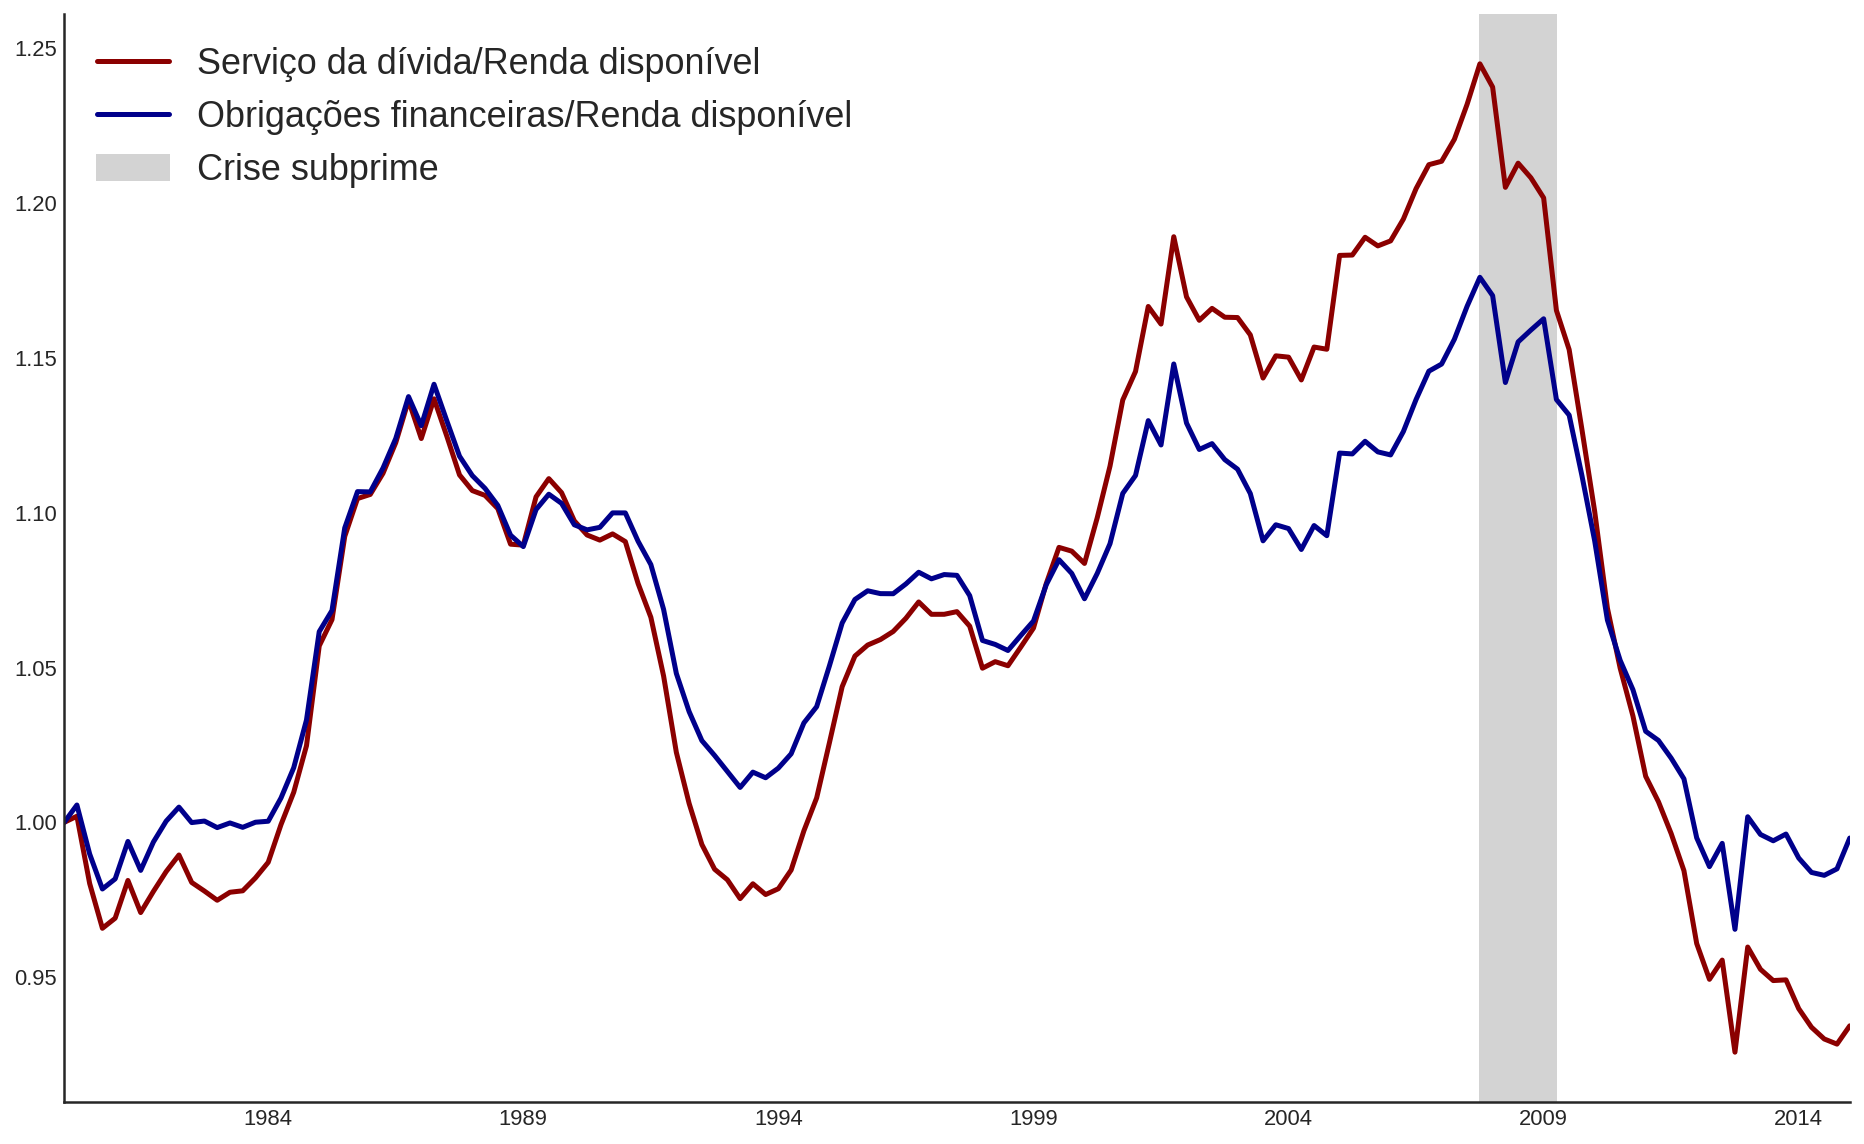

In [24]:
fig, ax = plt.subplots(figsize=(16, 10))

df.iloc[df.index>='1980-01',:].plot(
    ax=ax,
    color=('darkred', 'darkblue'),
    linewidth=2.5,
)

ax.axvspan(
    xmin='2007-12-01', 
    xmax='2009-06-01',
    color='lightgray', 
    label='Crise subprime',
    zorder=0
)
ax.legend(fontsize=18)

sns.despine()
plt.show()

In [25]:
start = dt(1947, 1, 1)
end = dt(2015, 1, 1)

df = web.DataReader(
    [
        'TLBSHNO', # Households and nonprofit organizations; total liabilities, Level
        'TNWBSHNO', # Households and nonprofit organizations; net worth, Level
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    'Passivos',
    'Patrimônio Líquido',
]
df.index.name = ''
df = df.dropna()

#for i in df.columns:
#    df[i] = df[i]/(df[i][0])
df = (df['Passivos']/df['Patrimônio Líquido'])
df.head()


1947-10-01    0.047210
1948-10-01    0.053138
1949-10-01    0.058416
1950-10-01    0.065553
1951-10-01    0.066812
dtype: float64

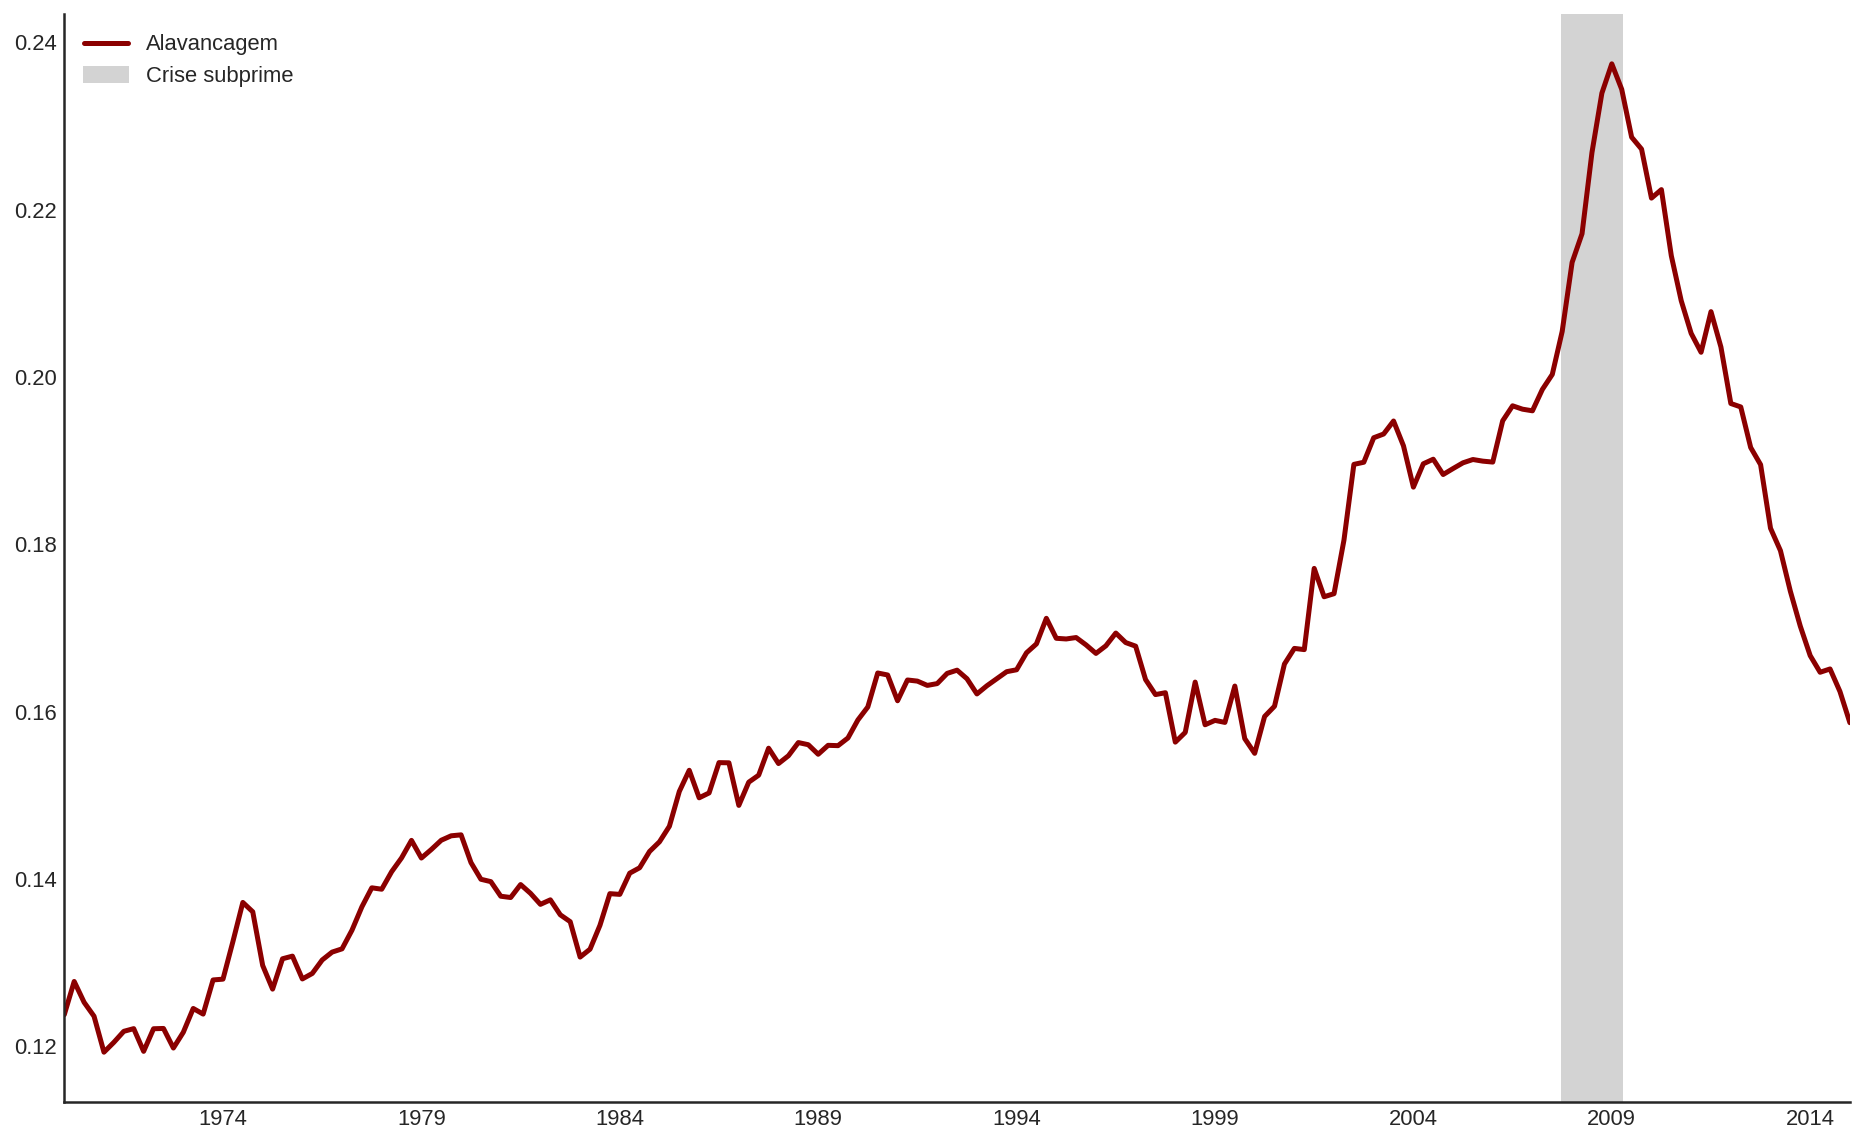

In [26]:
fig, ax = plt.subplots(figsize=(16, 10))

df[df.index>='1970-01'].plot(
    ax=ax,
    color=('darkred'),
    linewidth=2.5,
    label='Alavancagem'
)

ax.axvspan(
    xmin='2007-12-01', 
    xmax='2009-06-01',
    color='lightgray', 
    label='Crise subprime',
    zorder=0
)

ax.legend()
sns.despine()
plt.show()

## Consumo das famílias

In [27]:
start = dt(1947, 1, 1)
end = dt(2015, 1, 1)

df = web.DataReader(
    [
        'DPCERE1Q156NBEA', # Shares of gross domestic product: Personal consumption expenditures
        'LABSHPUSA156NRUG', # Share of Labour Compensation in GDP at Current National Prices for United States
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    'Consumo',
    'Salários',
]
df['Salários'] = df['Salários']*100

df.index.name = ''
df = df.resample("A").mean().dropna()
df.head()

Consumo   Salários
                              
1950-12-31    64.10  62.836289
1951-12-31    60.10  63.373178
1952-12-31    59.70  64.485157
1953-12-31    59.80  64.449602
1954-12-31    61.35  63.705200

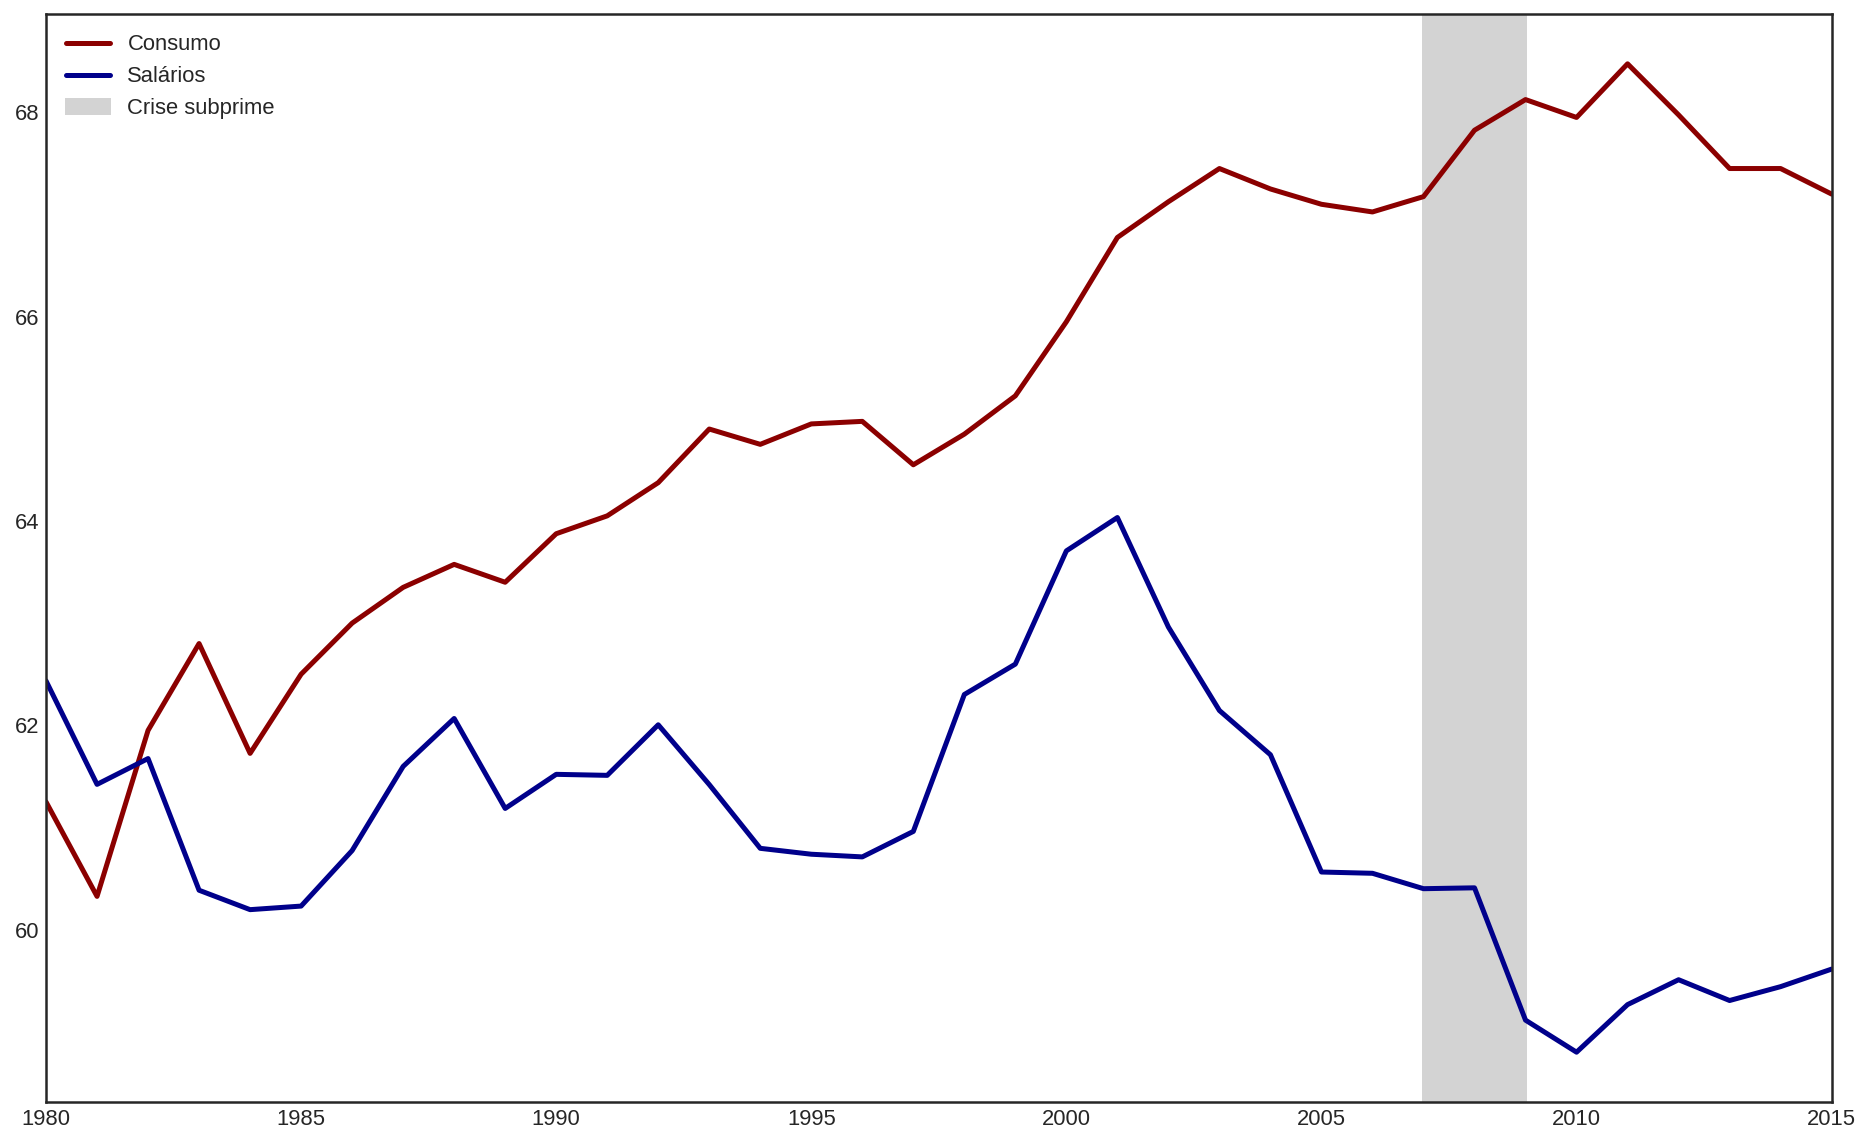

In [28]:
fig, ax = plt.subplots(figsize=(16, 10))

df.iloc[df.index>='1980-01',:].plot(
    ax=ax,
    color=('darkred', 'darkblue'),
    linewidth=2.5,
)

ax.axvspan(
    xmin='2007-12-01', 
    xmax='2009-06-01',
    color='lightgray', 
    label='Crise subprime',
    zorder=0
)
ax.legend()

plt.show()

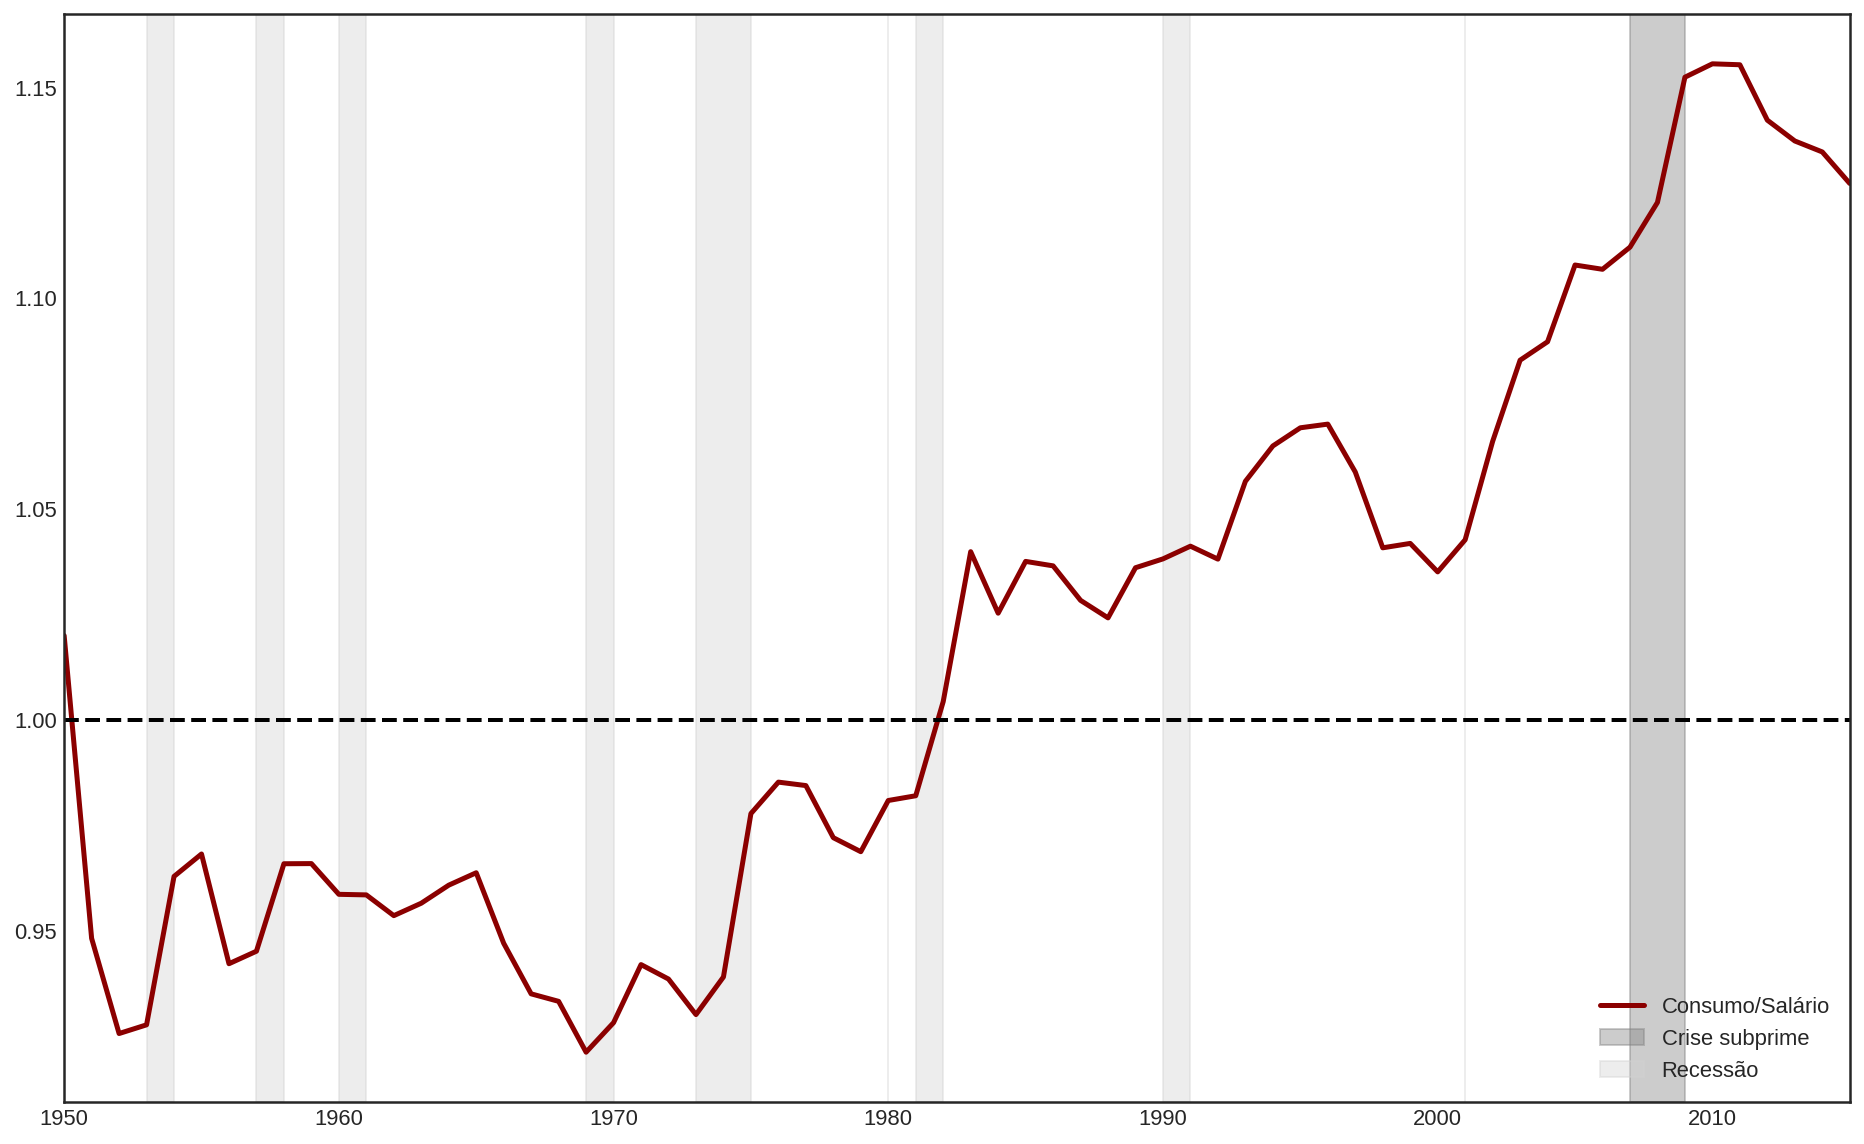

In [29]:
fig, ax = plt.subplots(figsize=(16, 10))

(df['Consumo']/df['Salários']).plot(
    ax=ax,
    color=('darkred'),
    linewidth=2.5,
    label='Consumo/Salário'
)

crise_subprime(ax)
crises(ax)
ax.axhline(y=1,ls='--', lw=2, color='black')
ax.legend()

plt.show()
salvar_grafico("Consumo_Salario")

# Distribuição e concentração

## Curva de concentração

In [30]:
df = pd.read_excel(
    'SCF_merged.xlsx', 
    sheet_name='Riqueza',
    index_col=[0]
)

imoveis = df.loc['Imóveis',:]
imoveis = imoveis.drop(['Percentil da riqueza'], axis='columns')
imoveis.index = [.249, .499, .749, .899, 1]
imoveis = imoveis/100

acoes = df.loc['Ações',:]
acoes = acoes.drop(['Percentil da riqueza'], axis='columns')
acoes.index = [.249, .499, .749, .899, 1]
acoes = acoes/100

secund = df.loc['Secundário',:]
secund = secund.drop(['Percentil da riqueza'], axis='columns')
secund.index = [.249, .499, .749, .899, 1]
secund = secund/100

# Suavizando curvas
def suavizacao(serie, n=1000, k=2):

    xnew = np.linspace(serie.min().min(), serie.max().max(), n) 
    suavizado = serie.apply(lambda x: make_interp_spline(x.index, x, k=k)(xnew))
    suavizado = suavizado[suavizado > 0].dropna()
    suavizado.index = suavizado.index/n
    return suavizado

imoveis = suavizacao(imoveis)
#acoes = suavizacao(acoes)
#secund = suavizacao(secund)


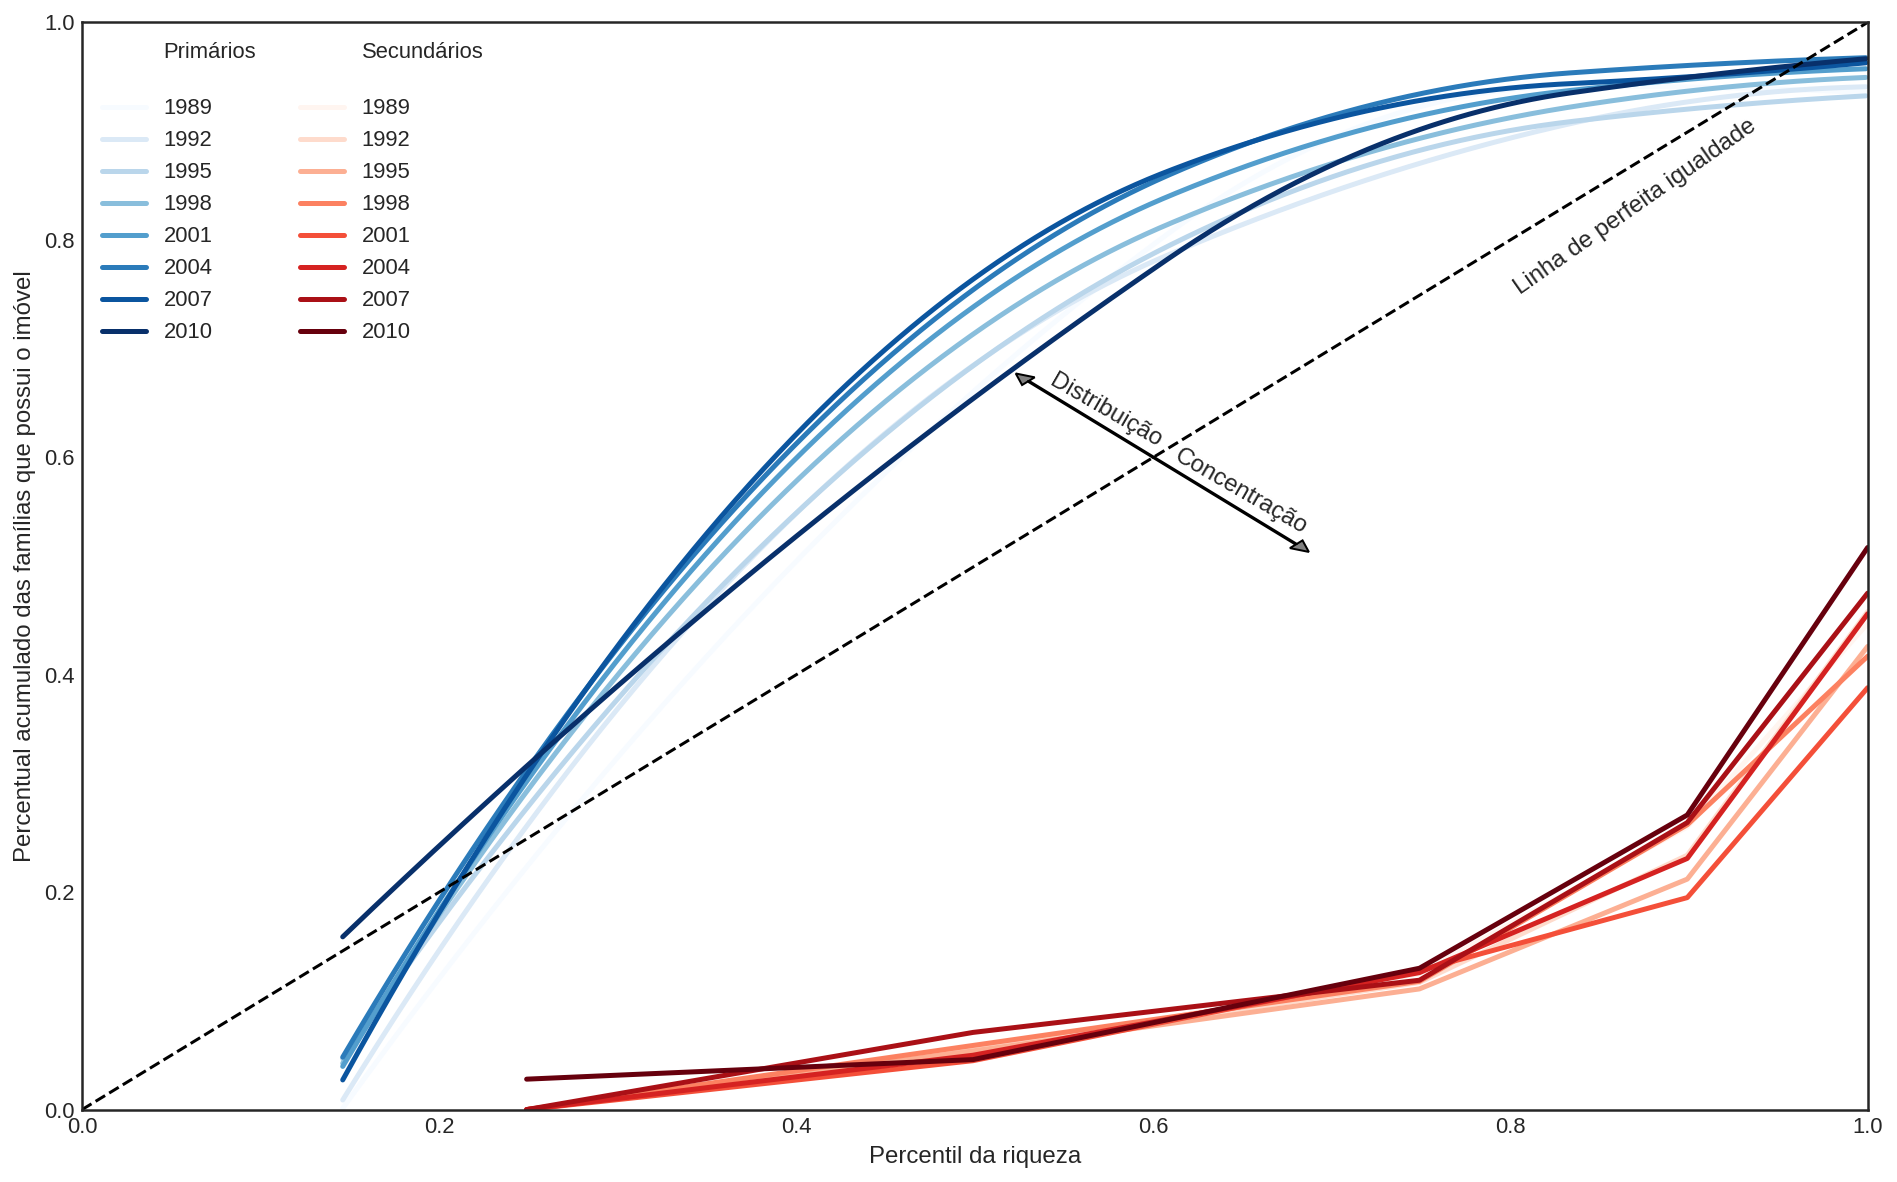

In [31]:
df1 = imoveis.loc[:, imoveis.columns <= 2010]
df2 = acoes.loc[:, acoes.columns <= 2010]
df3 = secund.loc[:, secund.columns <= 2010]

fig, ax = plt.subplots(figsize=(16, 10))

ax.plot(
    np.linspace(0,0), 
    np.linspace(0,0),
    color='white',
    ls='-',
    label='Primários\n'
)

df1.plot(
    ax=ax,
    cmap="Blues", 
    linewidth=2.5,
)

ax.plot(
    np.linspace(0,0), 
    np.linspace(0,0),
    color='white',
    ls='-',
    label='Secundários\n'
)

df3.plot(
    ax=ax,
    cmap="Reds", 
    linewidth=2.5,
)

ax.legend(ncol=2)

ax.plot(
    np.linspace(*ax.get_xlim()), 
    np.linspace(*ax.get_xlim()),
    color='black',
    ls='--',
)

ax.arrow(0.6, 0.6, +0.08, -0.08, head_width=0.01, head_length=0.01, fc='gray', ec='black')
ax.text(.61,.53, "Concentração", fontsize=12, rotation=-30)
ax.arrow(0.6, 0.6, -0.07, 0.07, head_width=0.01, head_length=0.01, fc='gray', ec='black')
ax.text(.54,.61, "Distribuição", fontsize=12, rotation=-30)
ax.text(.8,.75, "Linha de perfeita igualdade", fontsize=12, rotation=35)

ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax.set_xlabel('Percentil da riqueza')
ax.set_ylabel('Percentual acumulado das famílias que possui o imóvel')

plt.show()
salvar_grafico(file_name="Concentracao_Imoveis")

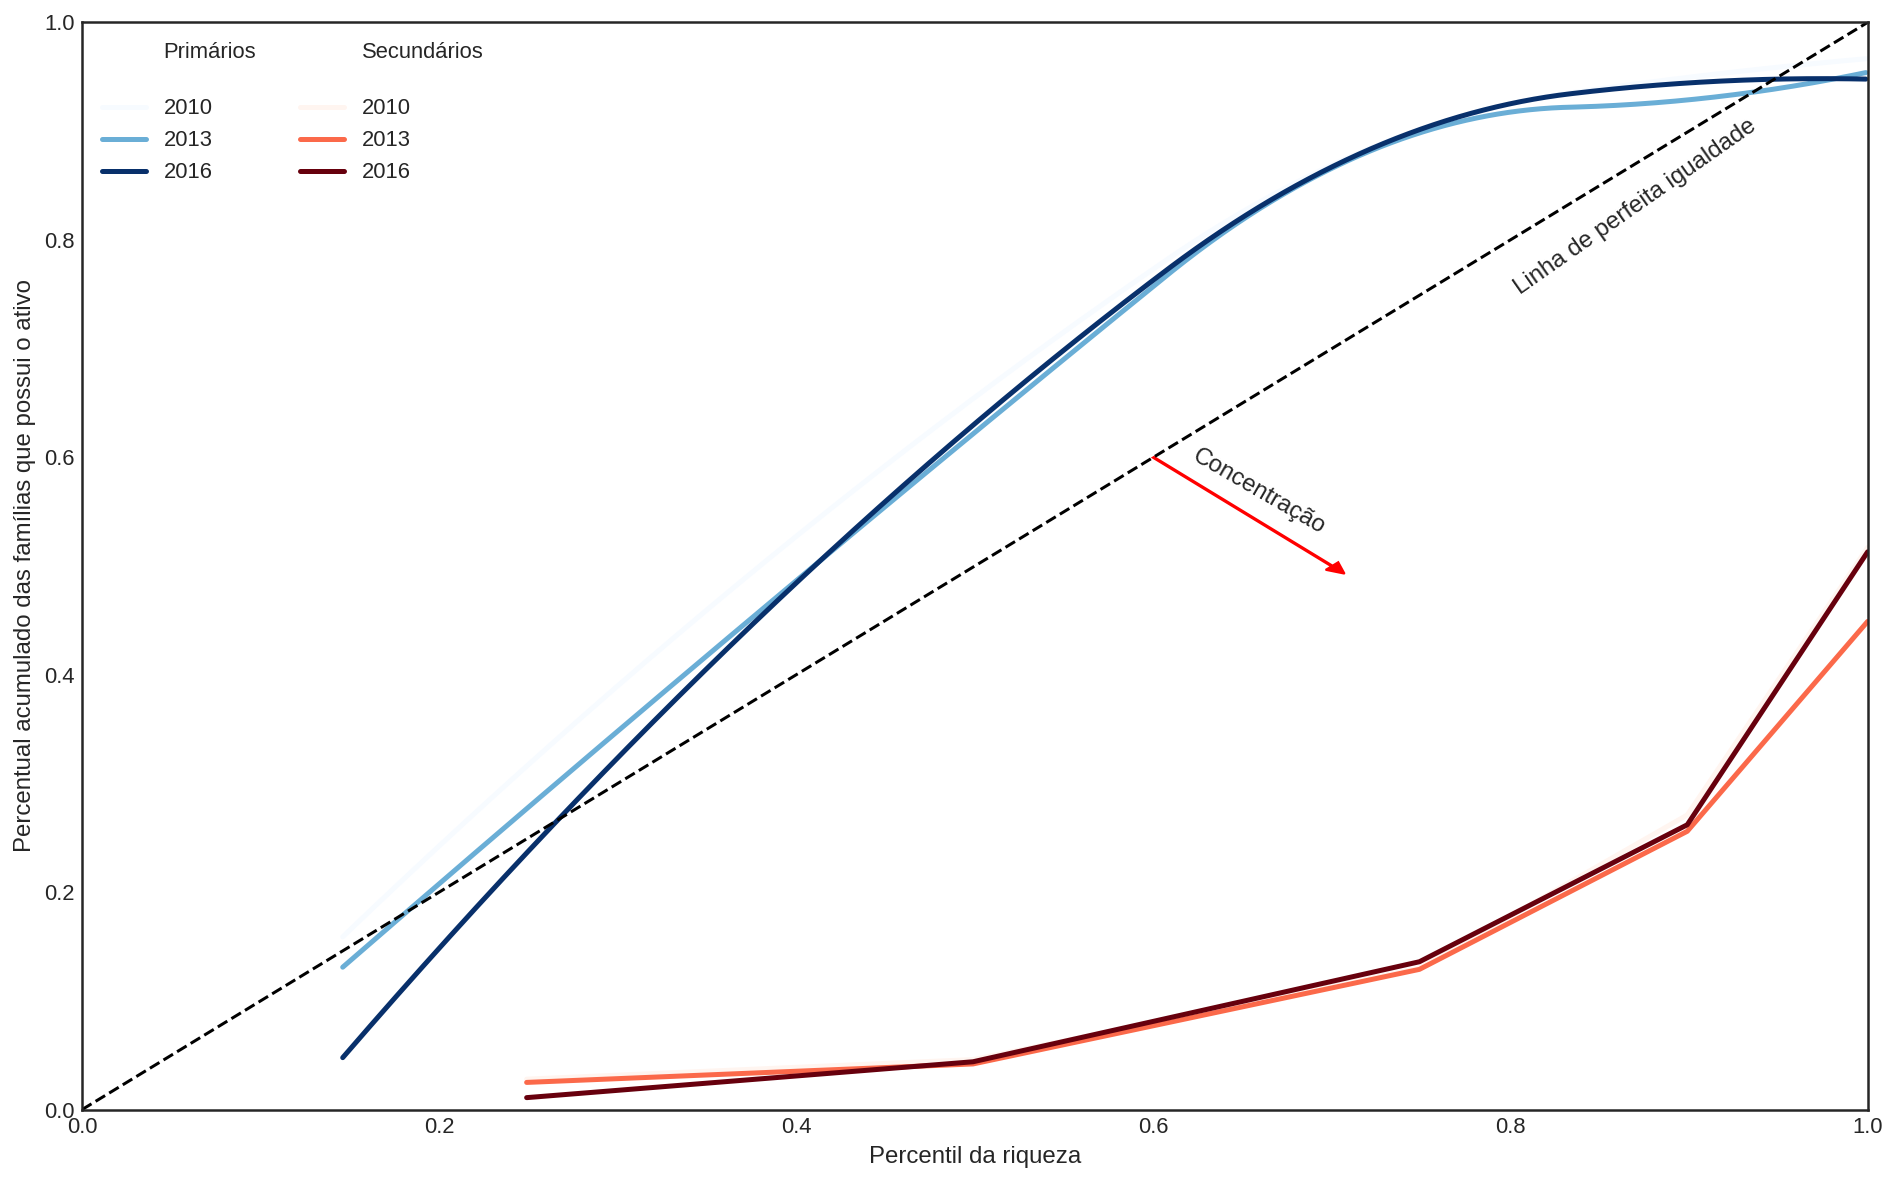

In [32]:
df1 = imoveis.loc[:, imoveis.columns > 2007]
df2 = acoes.loc[:, acoes.columns > 2007]
df3 = secund.loc[:, secund.columns > 2007]

fig, ax = plt.subplots(figsize=(16, 10))

ax.plot(
    np.linspace(0,0), 
    np.linspace(0,0),
    color='white',
    ls='-',
    label='Primários\n'
)

df1.plot(
    ax=ax,
    cmap="Blues", 
    linewidth=2.5,
)

ax.plot(
    np.linspace(0,0), 
    np.linspace(0,0),
    color='white',
    ls='-',
    label='Secundários\n'
)

df3.plot(
    ax=ax,
    cmap="Reds", 
    linewidth=2.5,
)

ax.legend(ncol=2)

ax.plot(
    np.linspace(*ax.get_xlim()), 
    np.linspace(*ax.get_xlim()),
    color='black',
    ls='--',
)

ax.arrow(0.6, 0.6, +0.1, -0.1, head_width=0.01, head_length=0.01, fc='red', ec='red')
ax.text(.62,.53, "Concentração", fontsize=12, rotation=-30)
ax.text(.8,.75, "Linha de perfeita igualdade", fontsize=12, rotation=35)

ax.set_xlim(0,1)
ax.set_ylim(0,1)

ax.set_xlabel('Percentil da riqueza')
ax.set_ylabel('Percentual acumulado das famílias que possui o ativo')

plt.show()

In [33]:
df = pd.read_excel(
    'SCF_merged.xlsx', 
    sheet_name='Porcentagem_Renda',
    index_col=[0]
)

imoveis = df.loc['Imóveis',:]
imoveis = imoveis.drop(['Percentil da renda'], axis='columns')
imoveis.index = [.2, .4, .6, .8, .9, .99]
imoveis = imoveis/100

total = df.loc['Total',:]
total = total.drop(['Percentil da renda'], axis='columns')
total.index = [.2, .4, .6, .8, .9, .99]
total = total/100

acoes = total - imoveis
acoes

1989   1992   1995   1998   2001   2004   2007   2010   2013   2016
0.20  0.061  0.068  0.068  0.053  0.019  0.071  0.121  0.088  0.102  0.074
0.40  0.070  0.049  0.045  0.035  0.037  0.062  0.035  0.041  0.029  0.038
0.60  0.088  0.077  0.052  0.070  0.040  0.035  0.064  0.039  0.030  0.041
0.80  0.075  0.073  0.053  0.086  0.070  0.045  0.055  0.037  0.049  0.054
0.90  0.068  0.095  0.056  0.094  0.096  0.052  0.097  0.047  0.061  0.071
0.99  0.179  0.203  0.200  0.236  0.202  0.181  0.246  0.177  0.200  0.203

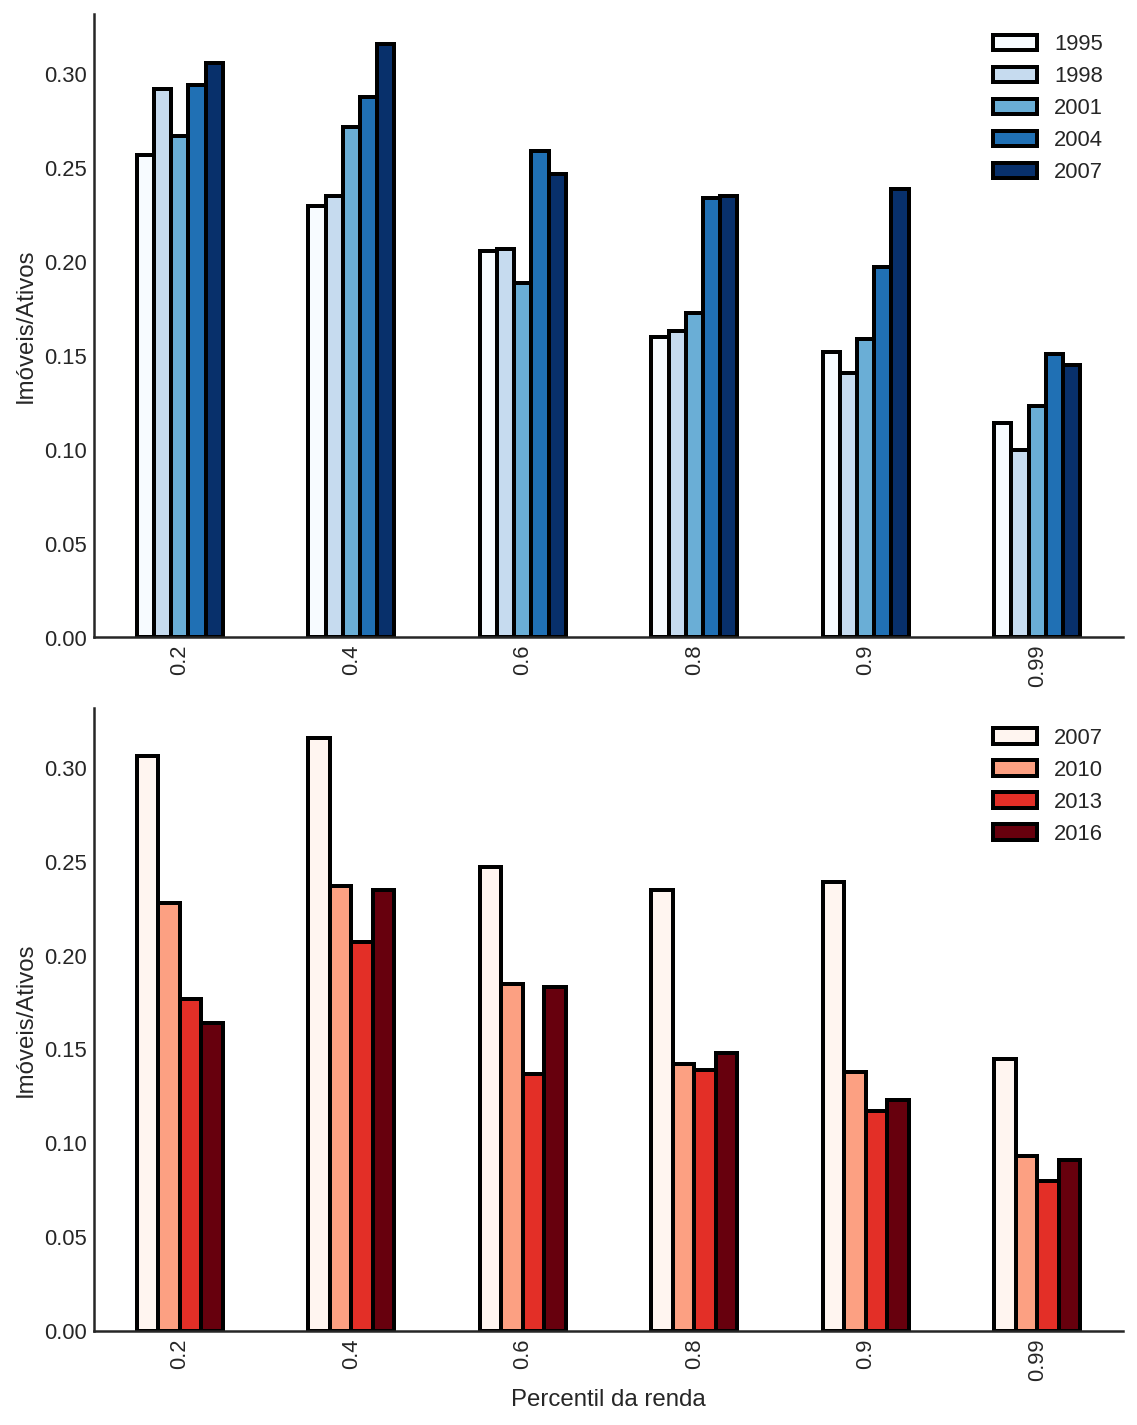

In [34]:
plt.style.use('seaborn-white')
fig, ax = plt.subplots(2, 1, figsize=(8, 10), sharey=True)

imoveis.loc[:, (imoveis.columns < 2010) & (imoveis.columns >= 1995)].plot(
    ax=ax[0],
    cmap="Blues", 
    linewidth=2,
    kind='bar',
    edgecolor='black'
)
ax[0].set_ylabel('Imóveis/Ativos')

imoveis.loc[:, imoveis.columns >= 2007].plot(
    ax=ax[1],
    cmap="Reds", 
    linewidth=2,
    kind='bar',
    edgecolor='black'
)

ax[1].set_xlabel('Percentil da renda')
ax[1].set_ylabel('Imóveis/Ativos')

sns.despine()
sns.set_context('paper')
plt.tight_layout()
plt.show()
salvar_grafico("Imoveis_Percentis")

In [35]:
def concentracao_df(df):
    colunas = ['Top 1%', 'Top 10%', 'Top 50-90%', '50% mais pobres']
    df.columns = colunas
    df = df/100
    df.index.name = ''
    df = df/df.iloc[0,:]
    return df

## Ativos

In [36]:
start = dt(1947, 1, 1)
end = dt(2015, 1, 1)

ativos = web.DataReader(
    [
        ######## Ativos totais ##########
        'WFRBST01108', # Share of Total Assets Held by the Top 1% (99th to 100th Wealth Percentiles)
        'WFRBSN09135', # Share of Total Assets Held by the 90th to 99th Wealth Percentiles
        'WFRBSN40162', # Share of Total Assets Held by the 50th to 90th Wealth Percentiles
        'WFRBSB50189', # Share of Total Assets Held by the Bottom 50% (1st to 50th Wealth Percentiles)
    ], 
    'fred', 
    start, 
    end
)
ativos = concentracao_df(ativos)

financeiros = web.DataReader(
    [
        'WFRBST01112', # Share of Financial Assets Held by the Top 1% (99th to 100th Wealth Percentiles)
        'WFRBSN09139', # Share of Financial Assets Held by the 90th to 99th Wealth Percentiles
        'WFRBSN40166', # Share of Financial Assets Held by the 50th to 90th Wealth Percentiles
        'WFRBSB50193', # Share of Financial Assets Held by the Bottom 50% (1st to 50th Wealth Percentiles)
    ], 
    'fred', 
    start, 
    end
)
financeiros = concentracao_df(financeiros)

imoveis = web.DataReader(
    [
        'WFRBST01110', # Share of Real Estate Held by the Top 1% (99th to 100th Wealth Percentiles)
        'WFRBSN09137', # Share of Real Estate Held by the 90th to 99th Wealth Percentiles
        'WFRBSN40164', # Share of Real Estate Held by the 50th to 90th Wealth Percentiles
        'WFRBSB50191', # Share of Real Estate Held by the Bottom 50% (1st to 50th Wealth Percentiles)
    ], 
    'fred', 
    start, 
    end
)
imoveis = concentracao_df(imoveis)

duraveis = web.DataReader(
    [
        'WFRBST01111', # Share of Consumer Durables Held by the Top 1% (99th to 100th Wealth Percentiles)
        'WFRBSN09138', # Share of Consumer Durables Held by the 90th to 99th Wealth Percentiles
        'WFRBSN40165', # Share of Consumer Durables Held by the 50th to 90th Wealth Percentiles
        'WFRBSB50192', # Share of Consumer Durables Held by the Bottom 50% (1st to 50th Wealth Percentiles)
    ], 
    'fred', 
    start, 
    end
)
duraveis = concentracao_df(duraveis)

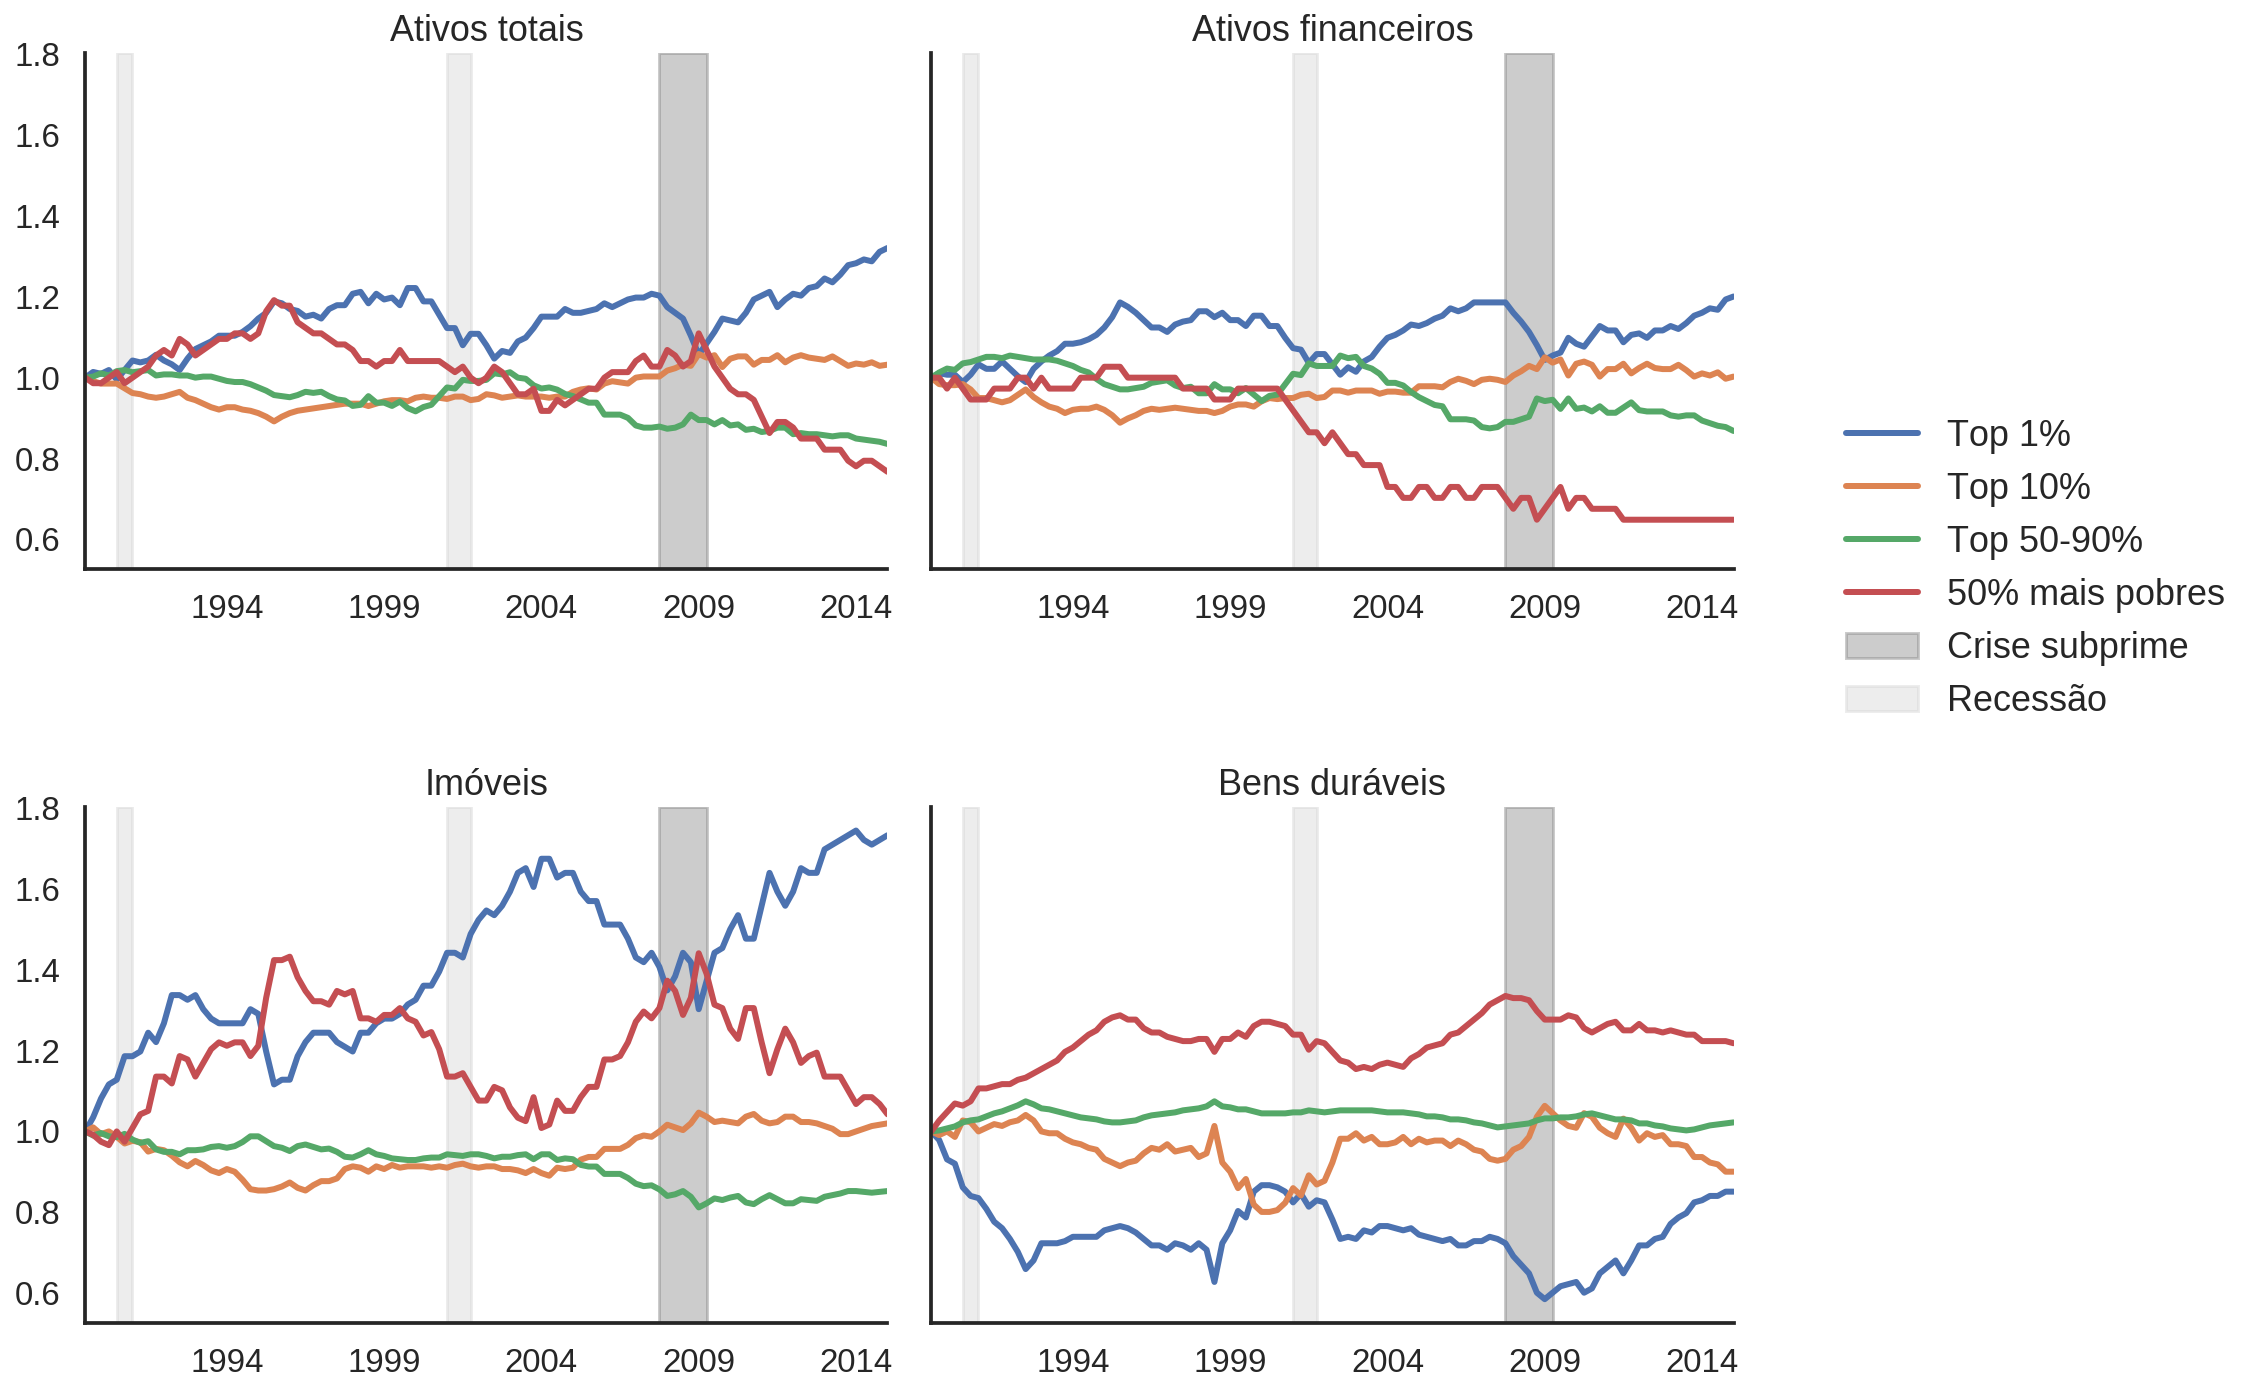

In [37]:
plt.style.use('seaborn-white')
sns.set_context('talk')
fig, ax = plt.subplots(2, 2, figsize=(16, 10), sharey=True)

ativos.plot(title='Ativos totais', ax=ax[0,0], legend=False, lw=3)
financeiros.plot(title='Ativos financeiros', ax=ax[0,1], legend=False, lw=3)
imoveis.plot(title='Imóveis', ax=ax[1,0], legend=False, lw=3)
duraveis.plot(title='Bens duráveis', ax=ax[1,1], legend=False, lw=3)

crise_subprime(axes=ax[0,1])
crises(axes=ax[0,1])
ax[0,1].legend(loc='center left', bbox_to_anchor=(1.1, 0.), fontsize=18)

crise_subprime(axes=ax[0,0])
crise_subprime(axes=ax[1,0])
crise_subprime(axes=ax[1,1])
crises(axes=ax[0,0])
crises(axes=ax[1,0])
crises(axes=ax[1,1])

sns.despine()
plt.tight_layout()
plt.show()
salvar_grafico(file_name="Distribuicao_Ativos")

## Passivos

In [38]:
start = dt(1947, 1, 1)
end = dt(2015, 1, 1)
url = 'https://fred.stlouisfed.org/release/tables?rid=453&eid=813804#snid=813936'

passivos = web.DataReader(
    [
        'WFRBST01127', # Share of Total Liabilities Held by the Top 1% (99th to 100th Wealth Percentiles)
        'WFRBSN09154', # Share of Total Liabilities Held by the 90th to 99th Wealth Percentiles
        'WFRBSN40181', # Share of Total Liabilities Held by the 50th to 90th Wealth Percentiles
        'WFRBSB50208', # Share of Total Liabilities Held by the Bottom 50% (1st to 50th Wealth Percentiles)
    ], 
    'fred', 
    start, 
    end
)
passivos = concentracao_df(passivos)

emprestimo = web.DataReader(
    [
        'WFRBST01128', # Share of Loans (Liabilities) Held by the Top 1% (99th to 100th Wealth Percentiles)
        'WFRBSN09155', # Share of Loans (Liabilities) Held by the 90th to 99th Wealth Percentiles
        'WFRBSN40182', # Share of Loans (Liabilities) Held by the 50th to 90th Wealth Percentiles
        'WFRBSB50209', # Share of Loans (Liabilities) Held by the Bottom 50% (1st to 50th Wealth Percentiles)
    ], 
    'fred', 
    start, 
    end
)
emprestimo = concentracao_df(emprestimo)

hipotecas = web.DataReader(
    [
        'WFRBST01129', # Share of Home mortgages Held by the Top 1% (99th to 100th Wealth Percentiles)
        'WFRBSN09156', # Share of Home mortgages Held by the 90th to 99th Wealth Percentiles
        'WFRBSN40183', # Share of Home mortgages Held by the 50th to 90th Wealth Percentiles
        'WFRBSB50210', # Share of Home mortgages Held by the Bottom 50% (1st to 50th Wealth Percentiles)
    ], 
    'fred', 
    start, 
    end
)
hipotecas = concentracao_df(hipotecas)

patrimonio_liq = web.DataReader(
    [
        'WFRBST01134', # Share of Total Net Worth Held by the Top 1% (99th to 100th Wealth Percentiles)
        'WFRBSN09161', # Share of Total Net Worth Held by the 90th to 99th Wealth Percentiles
        'WFRBSN40188', # Share of Total Net Worth Held by the 50th to 90th Wealth Percentiles
        'WFRBSB50215', # Share of Total Net Worth Held by the Bottom 50% (1st to 50th Wealth Percentiles)
    ], 
    'fred', 
    start, 
    end
)
patrimonio_liq = concentracao_df(patrimonio_liq)

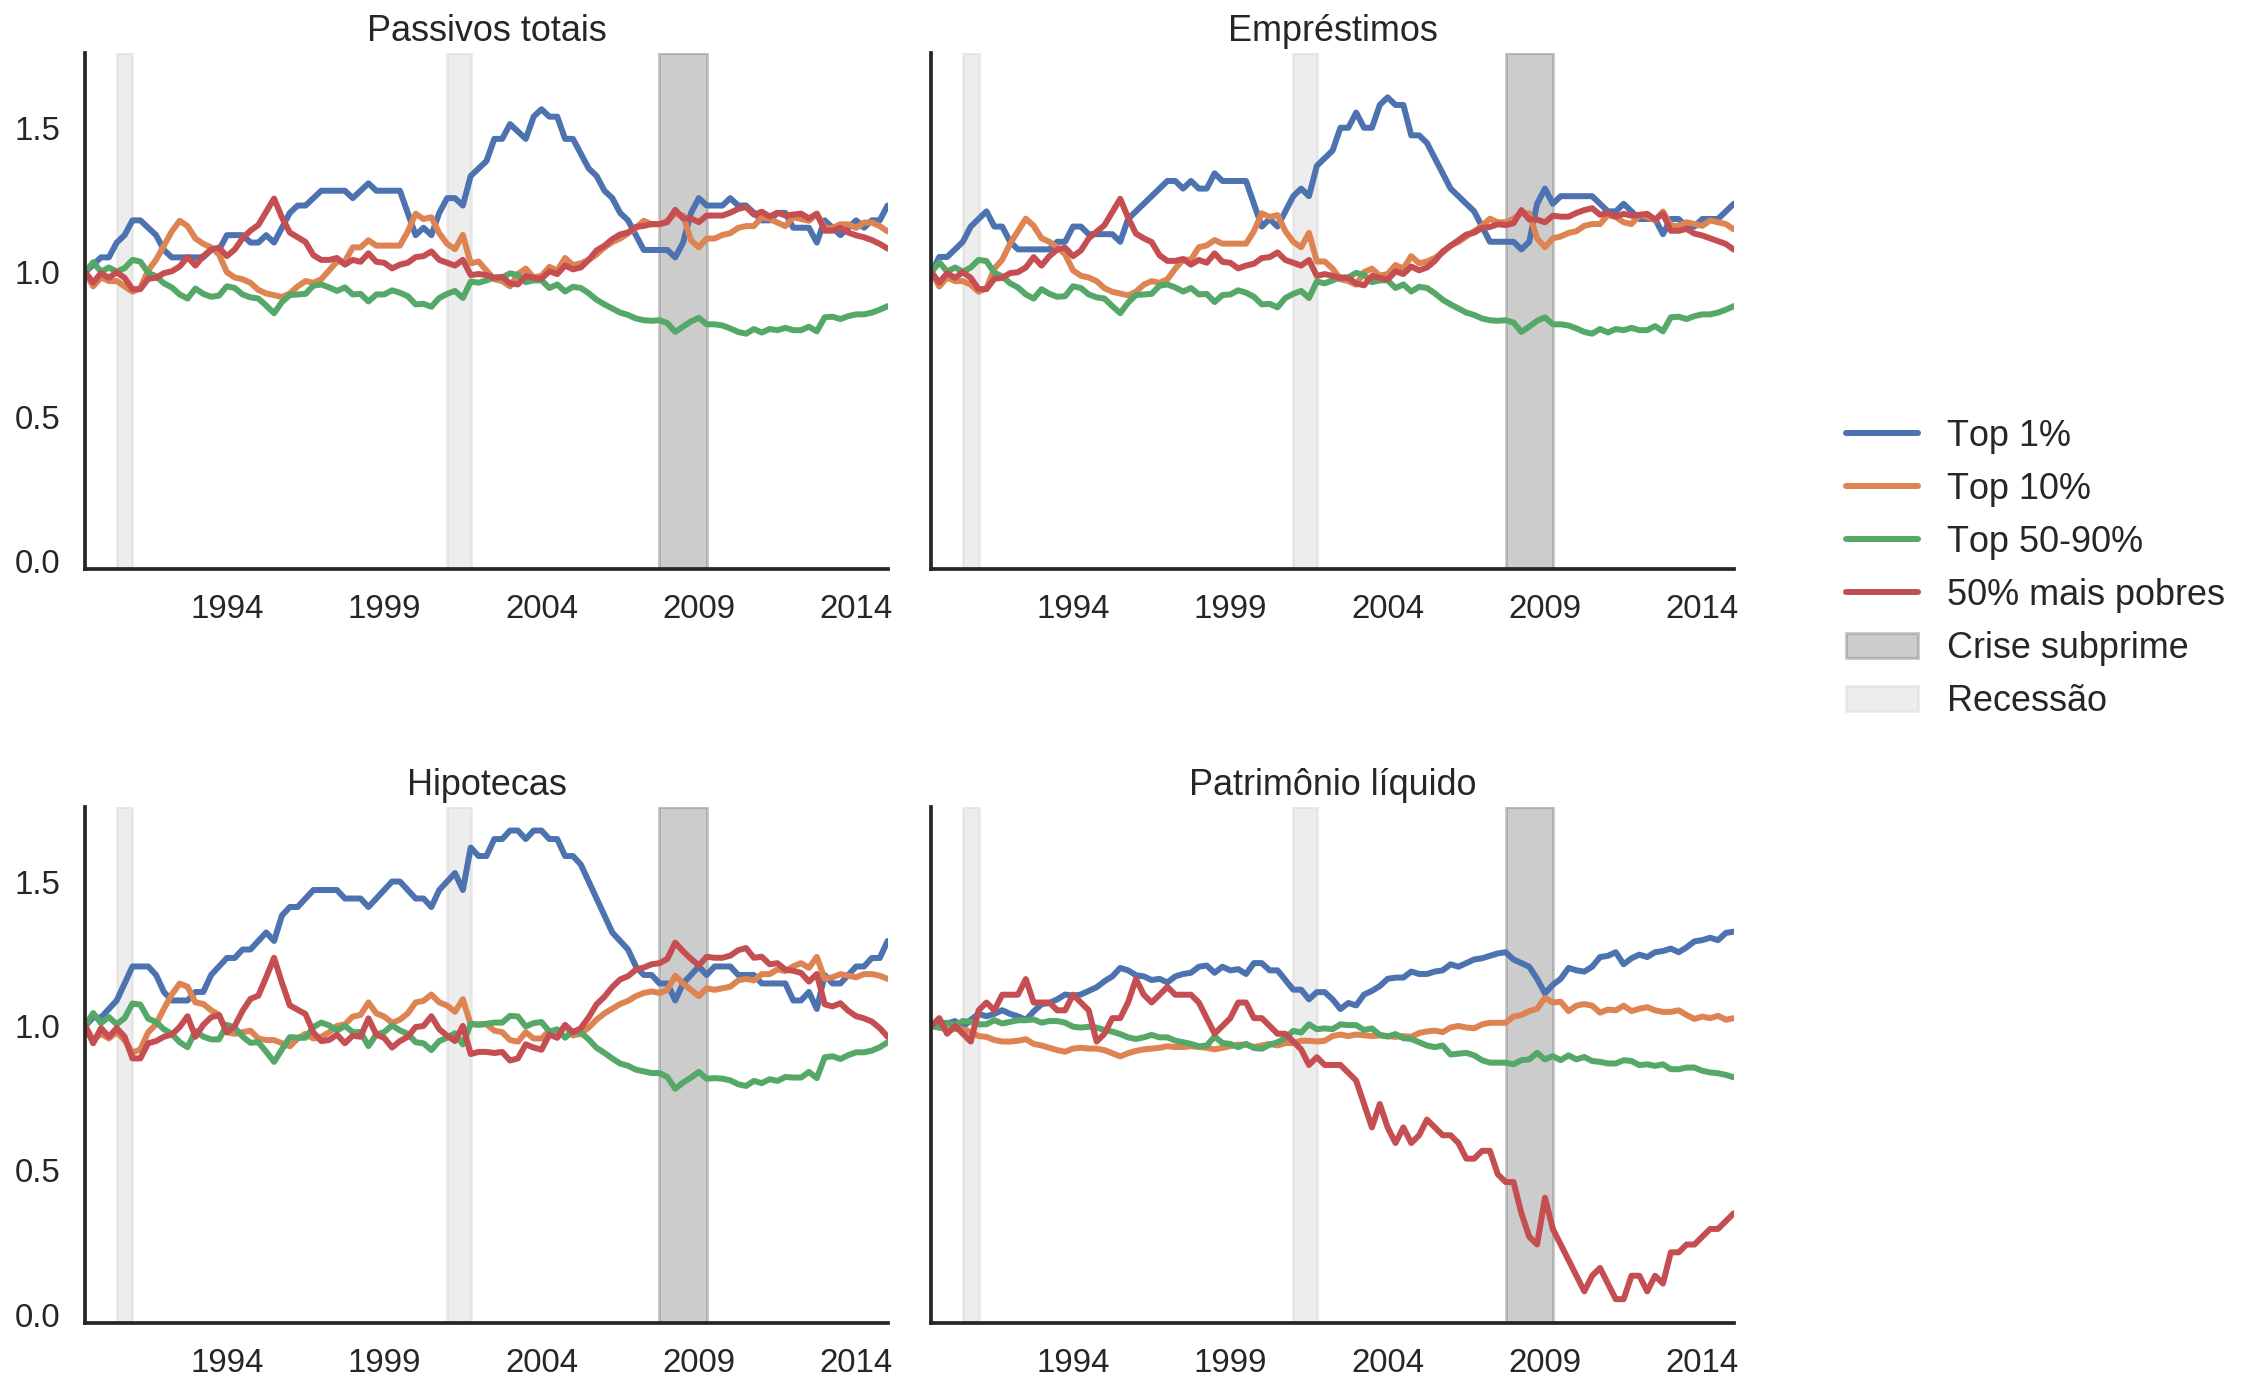

In [39]:
plt.style.use('seaborn-white')
sns.set_context('talk')
fig, ax = plt.subplots(2, 2, figsize=(16, 10), sharey=True)

passivos.plot(title='Passivos totais', ax=ax[0,0], legend=False, lw=3)
emprestimo.plot(title='Empréstimos', ax=ax[0,1], legend=False, lw=3)
hipotecas.plot(title='Hipotecas', ax=ax[1,0], legend=False, lw=3)
patrimonio_liq.plot(title='Patrimônio líquido', ax=ax[1,1], legend=False, lw=3)

crise_subprime(axes=ax[0,1])
crises(axes=ax[0,1])
ax[0,1].legend(loc='center left', bbox_to_anchor=(1.1, 0.), fontsize=18)

crise_subprime(axes=ax[0,0])
crise_subprime(axes=ax[1,0])
crise_subprime(axes=ax[1,1])
crises(axes=ax[0,0])
crises(axes=ax[1,0])
crises(axes=ax[1,1])

sns.despine()
plt.tight_layout()
plt.show()
salvar_grafico(file_name="Distribuicao_Passivos")

# Investimento residencial e não residencial

## Volatilidade

In [40]:
start = dt(1947, 1, 1)
end = dt(2015, 1, 1)

df = web.DataReader(
    [
        'PRFI', # Domestic business
        'PNFI', # Households and institutions
        'GDP', # Gross Domestic Product
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    'Residencial',
    'Não-Residencial',
    'PIB'
]
df.index.name = ''
df = df.pct_change(4).dropna()
df = df.dropna()

df.head()

Residencial  Não-Residencial       PIB
                                                  
1948-01-01     0.455744         0.137521  0.092851
1948-04-01     0.553674         0.114378  0.108140
1948-07-01     0.306193         0.146682  0.118641
1948-10-01    -0.005048         0.136398  0.079389
1949-01-01    -0.076637         0.012469  0.034966

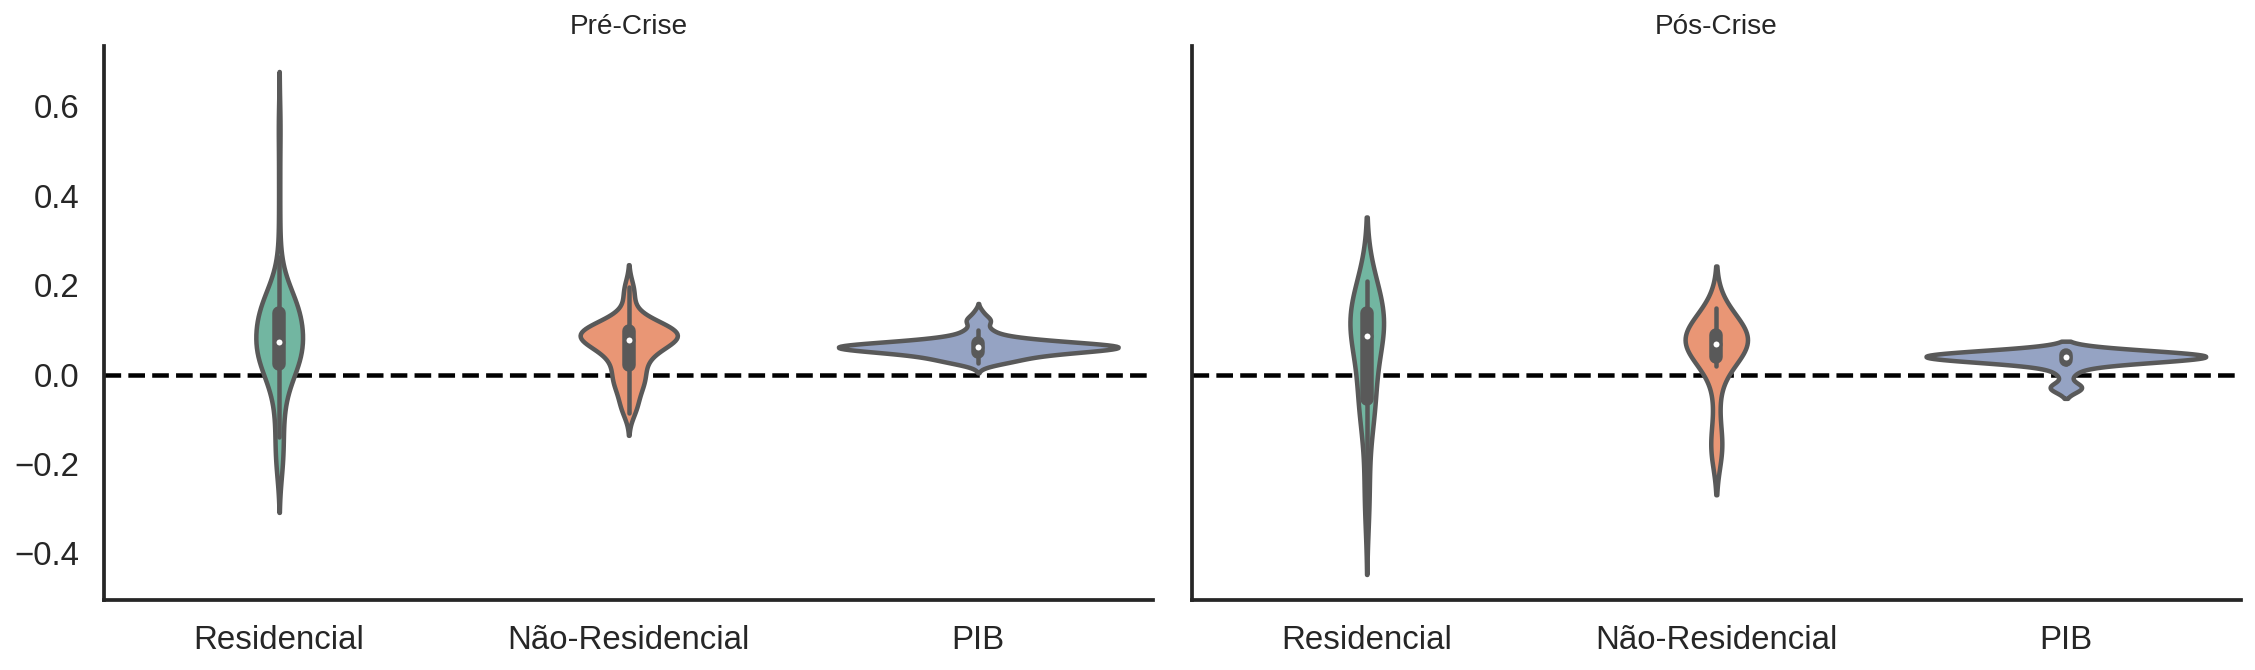

In [41]:
fig, ax = plt.subplots(1,2, figsize=(16,5), sharey=True, sharex=True)

sns.violinplot(
    data=df.loc[(df.index>'1980') & (df.index<'2007'),:], 
    ax = ax[0],
    palette="Set2",
    lw=2
)

sns.violinplot(
    data=df.loc[(df.index>'2009'),:], 
    ax = ax[1],
    palette="Set2",
)

ax[0].axhline(y=0,ls='--', color='black', zorder=0)
ax[1].axhline(y=0,ls='--', color='black', zorder=0)

ax[0].set_title('Pré-Crise', fontsize=14)
ax[1].set_title('Pós-Crise', fontsize=14)

sns.despine()
sns.set_context('talk')
plt.tight_layout()
plt.show()
salvar_grafico(file_name="Volatilidade")

## Preço dos imóveis

In [42]:
start = dt(1947, 1, 1)
end = dt(2015, 1, 1)

df = web.DataReader(
    [
        'B944RG3Q086SBEA', # Single family (chain-type price index)
        'B292RG3Q086SBEA', # Multifamily (chain-type price index)
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    'Unifamiliar',
    'Multifamiliar',
]
df.index.name = ''

df.head()

Unifamiliar  Multifamiliar
                                      
1958-01-01       12.081         10.160
1958-04-01       12.081         10.160
1958-07-01       12.082         10.162
1958-10-01       12.082         10.161
1959-01-01       12.081         10.162

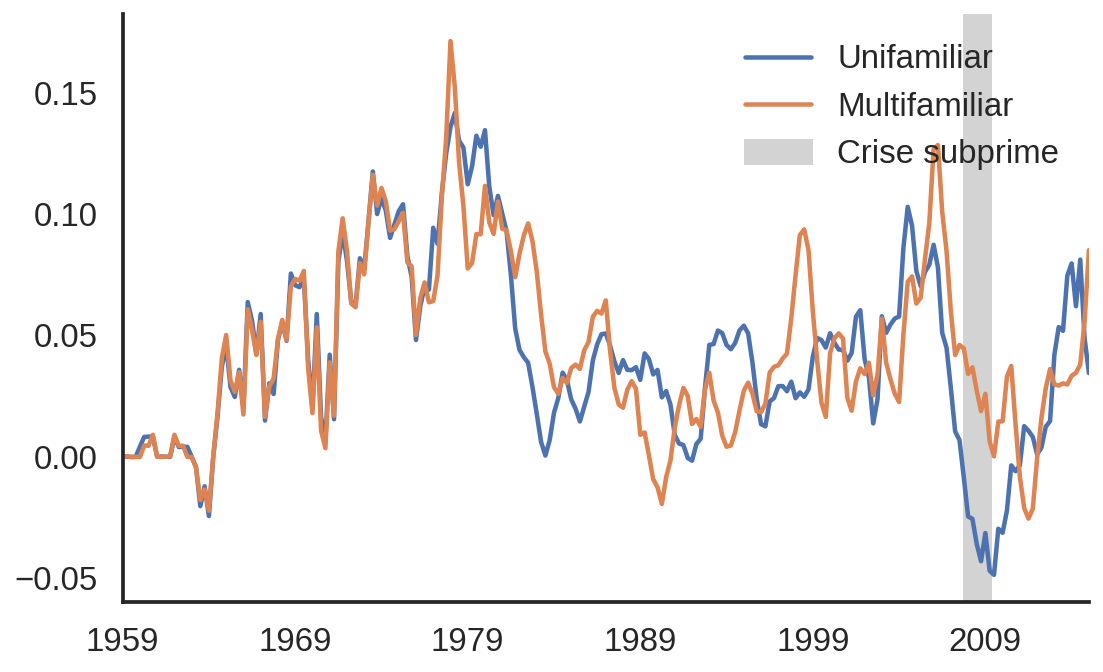

In [43]:
fig, ax = plt.subplots(figsize=(8,5))

df.pct_change(4).dropna().plot(ax=ax)

ax.axvspan(
    xmin='2007-12-01', 
    xmax='2009-06-01',
    color='lightgray', 
    label='Crise subprime'
)

ax.legend()


sns.despine()
sns.set_context('talk')
plt.tight_layout()
plt.show()

## Investimento residencial

In [44]:
start = dt(1947, 1, 1)
end = dt(2015, 1, 1)

df = web.DataReader(
    [
        'PRFI', # Private Residential Fixed Investment
        'GNP', # Gross National Product
        'PCEC', # Personal Consumption Expenditures
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    'Investimento residencial',
    'PNB',
    'Consumo'
]
df.index.name = ''

df['Ih/Renda'] = (df['Investimento residencial']/df['PNB'])*100
df['Ih/Consumo'] = (df['Investimento residencial']/df['Consumo'])*100
df['Ih/Consumo'] = df['Ih/Consumo']/(df['Ih/Consumo']["2000-01-01"])

cycle, trend = sm.tsa.filters.hpfilter(df['Ih/Consumo'], 1600)
df["Tendência"] = trend
df["Ciclo"] = cycle
df.head()

Investimento residencial      PNB  Consumo  Ih/Renda  Ih/Consumo  \
                                                                               
1947-01-01                    10.541  244.142  156.161  4.317569    0.921900   
1947-04-01                    10.573  247.063  160.031  4.279475    0.902336   
1947-07-01                    12.466  250.716  163.543  4.972160    1.041045   
1947-10-01                    15.254  260.981  167.672  5.844870    1.242503   
1948-01-01                    15.345  267.133  170.372  5.744330    1.230107   

            Tendência     Ciclo  
                                 
1947-01-01   1.077204 -0.155304  
1947-04-01   1.094870 -0.192534  
1947-07-01   1.112440 -0.071395  
1947-10-01   1.129695  0.112808  
1948-01-01   1.146373  0.083734

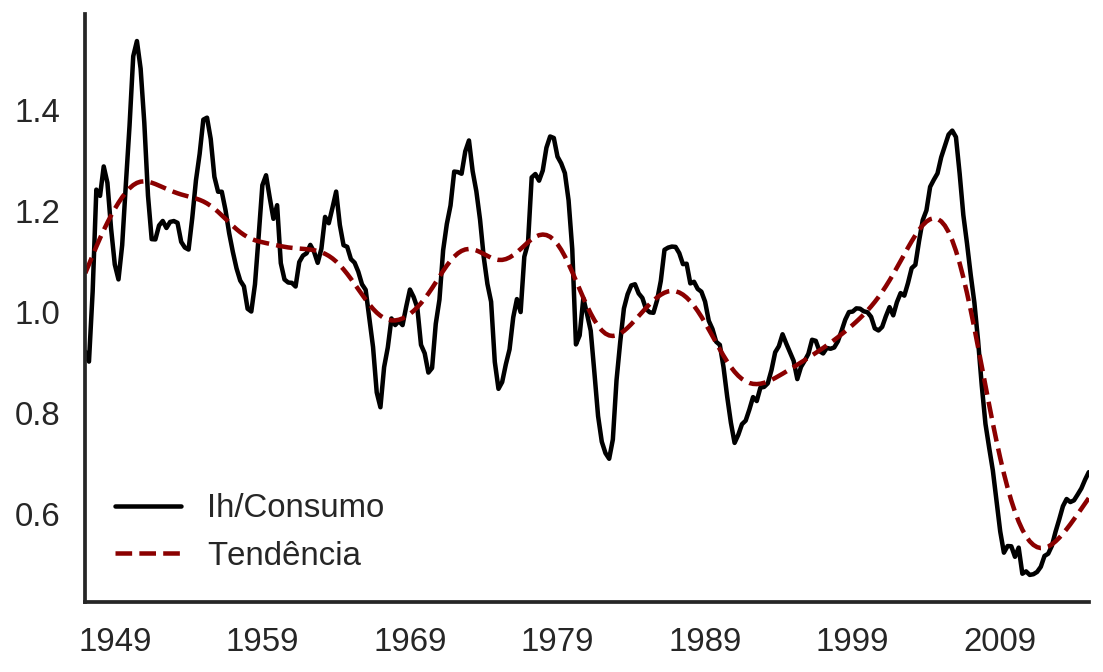

In [45]:
fig, ax = plt.subplots(figsize=(8,5))

df[['Ih/Consumo']].plot(
    ax=ax,
    color=('black'),
    ls='-'
)

df[['Tendência']].plot(
    ax=ax,
    color=('darkred'),
    ls='--'
)


ax.legend()


sns.despine()
sns.set_context('talk')
plt.tight_layout()
plt.show()

In [46]:
start = dt(1947, 1, 1)
end = dt(2019, 1, 1)

df = web.DataReader(
    [
        'PRFI', # 
        'PBRESCONS', # Total Public Construction Spending: Residential 
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    'Privado',
    'Público',
]
df.index.name = ''
df['Público'] = df['Público']/1000

df=df.dropna()
df.head()

Privado  Público
                            
2002-01-01  538.339    5.348
2002-04-01  554.846    5.266
2002-07-01  558.880    5.539
2002-10-01  578.313    5.014
2003-01-01  601.444    5.261

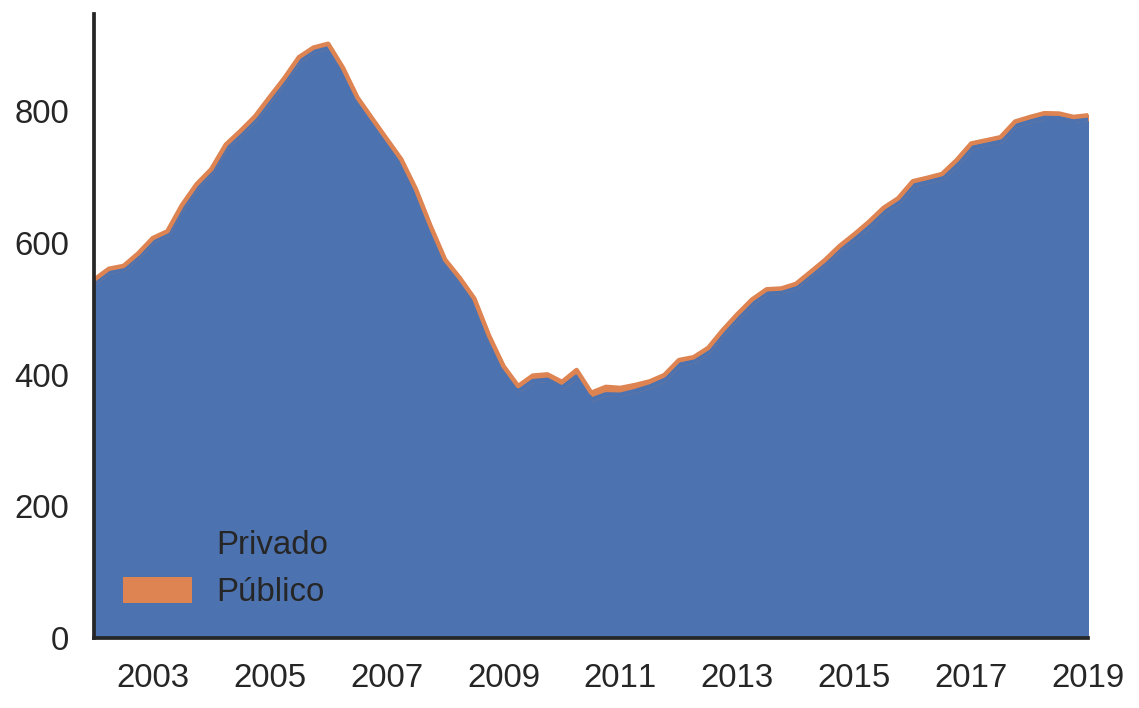

In [47]:
fig, ax = plt.subplots(figsize=(8,5))

df.plot(kind='area', stacked=True, ax=ax)

sns.despine()
sns.set_context('paper')
plt.tight_layout()
plt.show()
salvar_grafico("Imoveis_Publico_Privado")

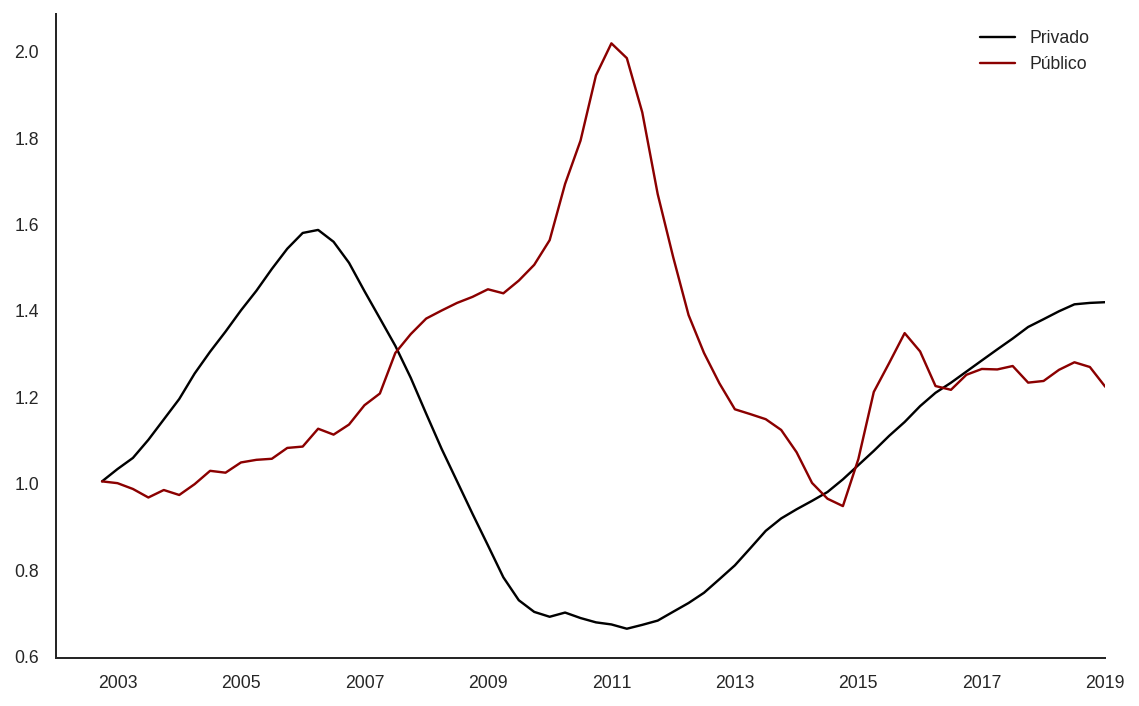

In [48]:
for i in df.columns:
    df[i] = df[i]/(df[i]['2002-04-01'])

df = df.dropna()

fig, ax = plt.subplots(figsize=(8,5))

df.rolling(4).mean().plot(
    ax=ax,
    color=('black', 'darkred'),
    ls='-'
)


ax.legend()


sns.despine()
sns.set_context('paper')
plt.tight_layout()
plt.show()

# Ciclos

## Clock-wise

In [49]:
start = dt(1951, 12, 1)
end = dt(2019, 1, 1)
df = web.DataReader(
    [
        'GDP',
        'PRFI',
        'PNFI',
        'TCU',
        'PCDG',
    ], 
    'fred', 
    start, end
)

df.columns = [
    "PIB",
    "Investimento residencial",
    "Investimento não-residencial",
    "Grau de utilização",
    "Duráveis"
]

df['Grau de utilização'] = df['Grau de utilização']/100
df['Ih/PIB'] = df['Investimento residencial']/df['PIB']
df['If/PIB'] = df['Investimento não-residencial']/df['PIB']
df['Duráveis/PIB'] = df['Duráveis']/df['PIB']
df['Ano'] = df.index.year
df = df.resample('Q').last()
df['gY'] = df['PIB'].pct_change(4)

df.index.name = ''
df = df.dropna()
df.head()

PIB  Investimento residencial  Investimento não-residencial  \
                                                                              
1967-03-31  844.170                    29.389                        97.999   
1967-06-30  848.983                    32.857                        98.297   
1967-09-30  865.233                    34.786                        98.785   
1967-12-31  881.439                    37.476                       101.744   
1968-03-31  909.387                    38.268                       105.582   

            Grau de utilização  Duráveis    Ih/PIB    If/PIB  Duráveis/PIB  \
                                                                             
1967-03-31            0.870835    71.102  0.034814  0.116089      0.084227   
1967-06-30            0.859603    74.483  0.038702  0.115782      0.087732   
1967-09-30            0.861122    74.699  0.040204  0.114172      0.086334   
1967-12-31            0.878417    75.642  0.042517  0.115429      0.085816   
1968-03-31            0.872750    80.859  0.042081  0.116102      0.088916   

             Ano        gY  
                            
1967-03-31  1967  0.060870  
1967-06-30  1967  0.054662  
1967-09-30  1967  0.055628  
1967-12-31  1967  0.057767  
1968-03-31  1968  0.077256

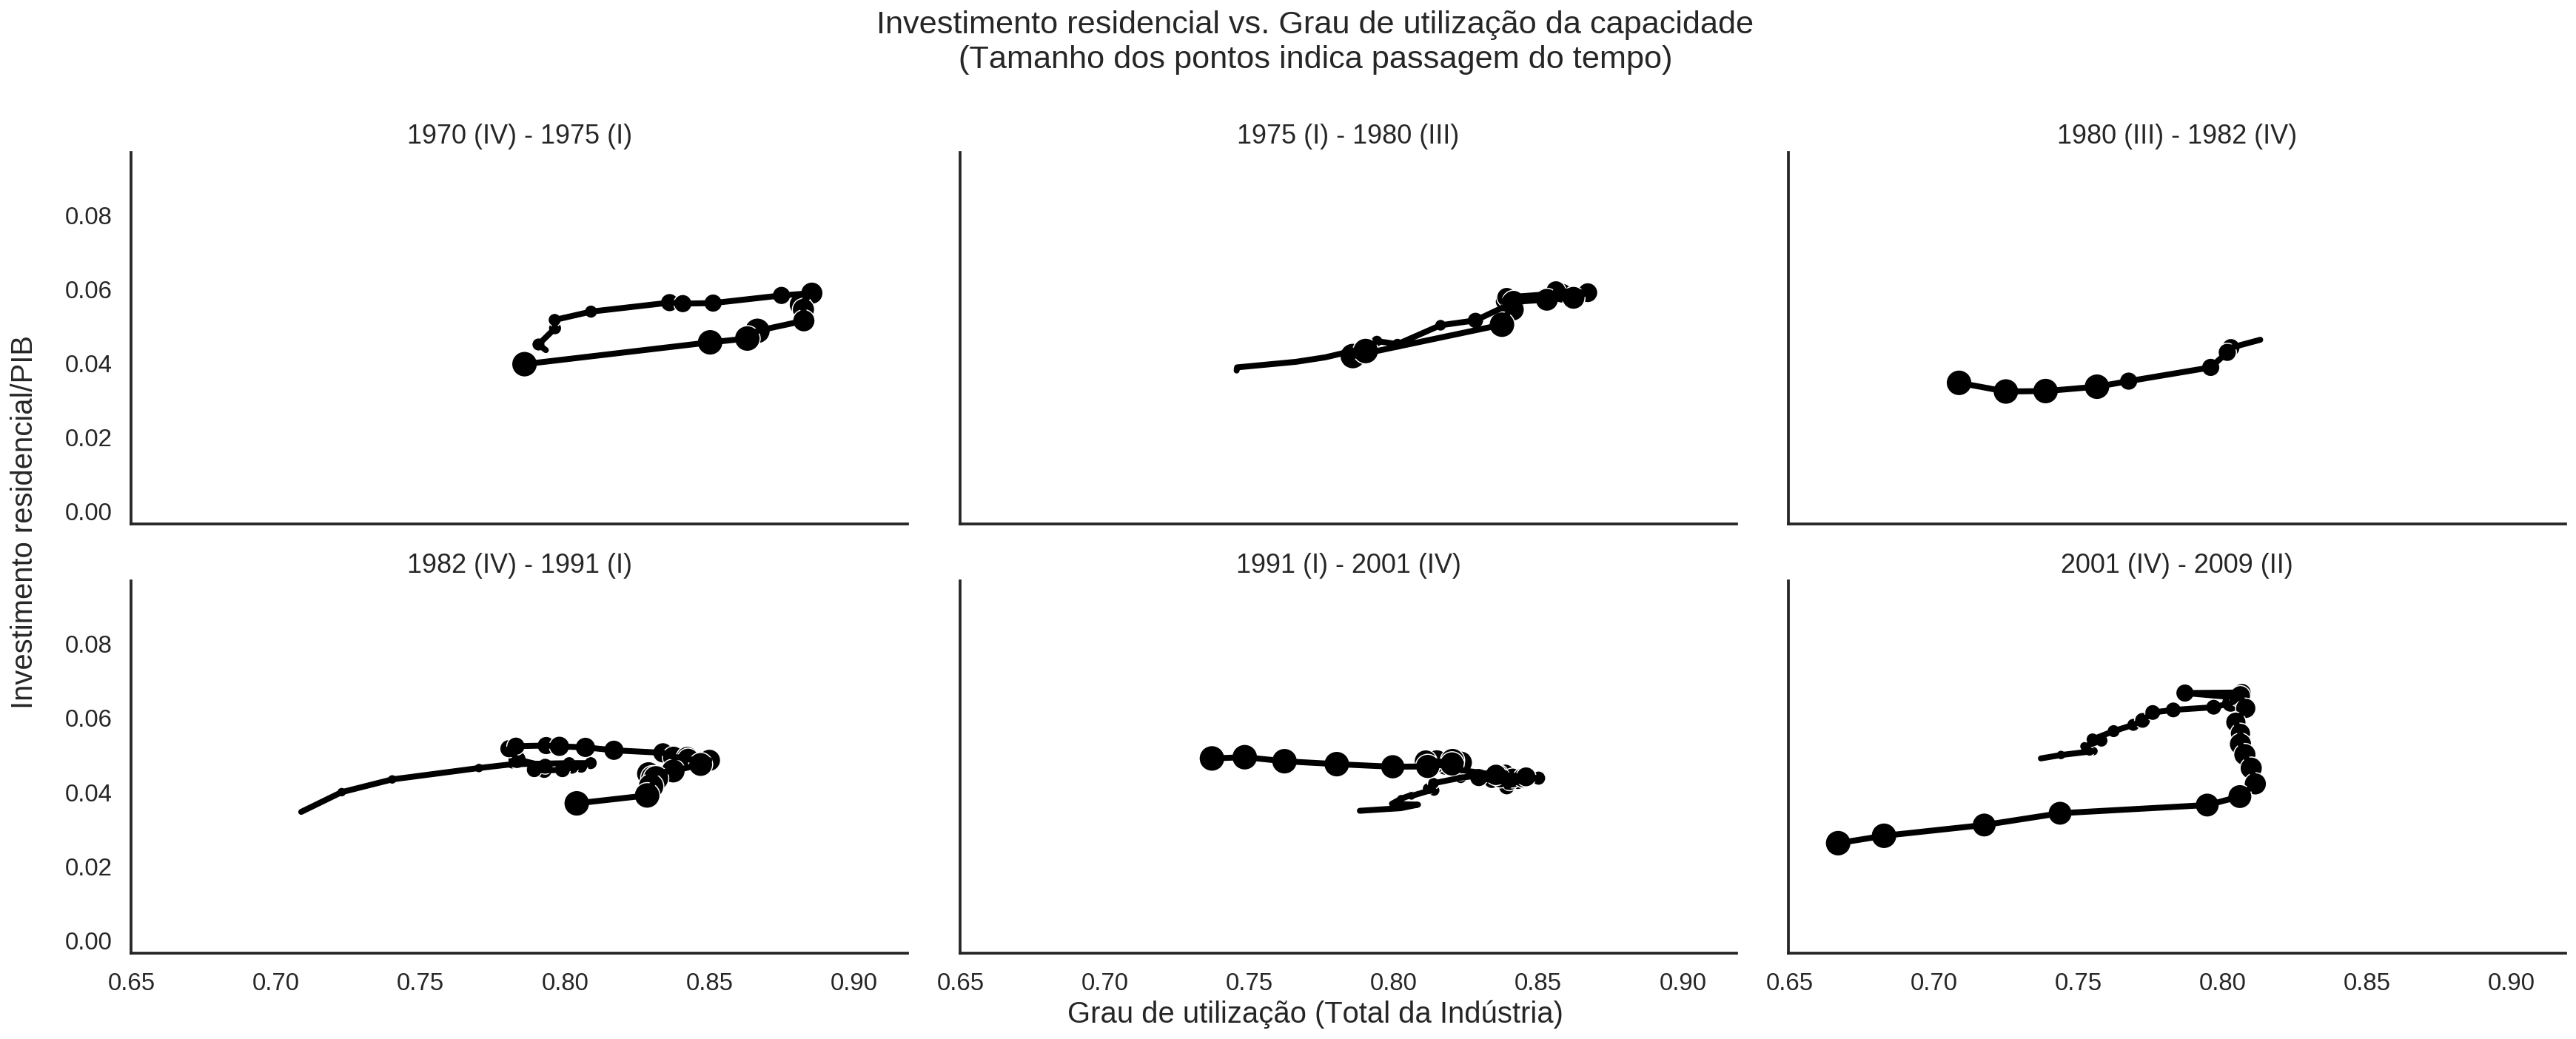

In [50]:
sns.set_context('talk')
fig, ax = plt.subplots(2,
                       3,
                       sharex=True,
                       sharey=True,
                       squeeze=False,
                       figsize=(24, 10))

sns.scatterplot(y='Ih/PIB',
                x='Grau de utilização',
                data=df["1970-12":"1975-01"],
                ax=ax[0, 0],
                size='Ano',
                sizes=(5, 300),
                color='black',
                legend=False)
sns.lineplot(y='Ih/PIB',
             x='Grau de utilização',
             data=df["1970-12":"1975-01"],
             ax=ax[0, 0],
             sort=False,
             color='black',
             lw=4,
            )
ax[0, 0].set_title("1970 (IV) - 1975 (I)", fontsize=18)

sns.scatterplot(y='Ih/PIB',
                x='Grau de utilização',
                data=df["1975-01":"1980-10"],
                ax=ax[0, 1],
                size='Ano',
                sizes=(5, 300),
                color='black',
                legend=False)
sns.lineplot(y='Ih/PIB',
             x='Grau de utilização',
             data=df["1975-01":"1980-10"],
             ax=ax[0, 1],
             sort=False,
             color='black',
             lw=4,)
ax[0, 1].set_title("1975 (I) - 1980 (III)", fontsize=18)

sns.scatterplot(y='Ih/PIB',
                x='Grau de utilização',
                data=df["1980-10":"1982-12"],
                ax=ax[0, 2],
                size='Ano',
                sizes=(5, 300),
                color='black',
                legend=False)
sns.lineplot(y='Ih/PIB',
             x='Grau de utilização',
             data=df["1980-10":"1982-12"],
             ax=ax[0, 2],
             sort=False,
             color='black',
             lw=4,)
ax[0, 2].set_title("1980 (III) - 1982 (IV)", fontsize=18)

sns.scatterplot(y='Ih/PIB',
                x='Grau de utilização',
                data=df["1982-12":"1991-01"],
                ax=ax[1, 0],
                size='Ano',
                sizes=(5, 300),
                color='black',
                legend=False)
sns.lineplot(y='Ih/PIB',
             x='Grau de utilização',
             data=df["1982-12":"1991-01"],
             ax=ax[1, 0],
             sort=False,
             color='black',
             lw=4,)
ax[1, 0].set_title("1982 (IV) - 1991 (I)")

sns.scatterplot(y='Ih/PIB',
                x='Grau de utilização',
                data=df["1991-01":"2001-12"],
                ax=ax[1, 1],
                size='Ano',
                sizes=(5, 300),
                color='black',
                legend=False)
sns.lineplot(y='Ih/PIB',
             x='Grau de utilização',
             data=df["1991-01":"2001-12"],
             ax=ax[1, 1],
             sort=False,
             color='black',
             lw=4,)
ax[1, 1].set_title("1991 (I) - 2001 (IV)", fontsize=18)

sns.scatterplot(y='Ih/PIB',
                x='Grau de utilização',
                data=df["2001-12":"2009-07"],
                ax=ax[1, 2],
                size='Ano',
                sizes=(5, 300),
                color='black',
                legend=False)
sns.lineplot(y='Ih/PIB',
             x='Grau de utilização',
             data=df["2001-12":"2009-07"],
             ax=ax[1, 2],
             sort=False,
             color='black',
             lw=4,)
ax[1, 2].set_title("2001 (IV) - 2009 (II)", fontsize=18)

sns.despine()
ax[0, 0].set_ylabel("")
ax[1, 0].set_xlabel('')
ax[1, 0].set_ylabel("")
ax[1, 1].set_xlabel('')
ax[1, 2].set_xlabel('')

fig.tight_layout(rect=[0, 0.03, 1, 0.90])
fig.text(0.5,
         0.03,
         'Grau de utilização (Total da Indústria)',
         ha='center',
         fontsize=20)
fig.text(-0.01,
         0.5,
         'Investimento residencial/PIB',
         va='center',
         rotation='vertical',
         fontsize=20)
plt.suptitle(
    "Investimento residencial vs. Grau de utilização da capacidade\n(Tamanho dos pontos indica passagem do tempo)"
)

plt.show()
salvar_grafico(file_name="Ciclo_Ih_u")

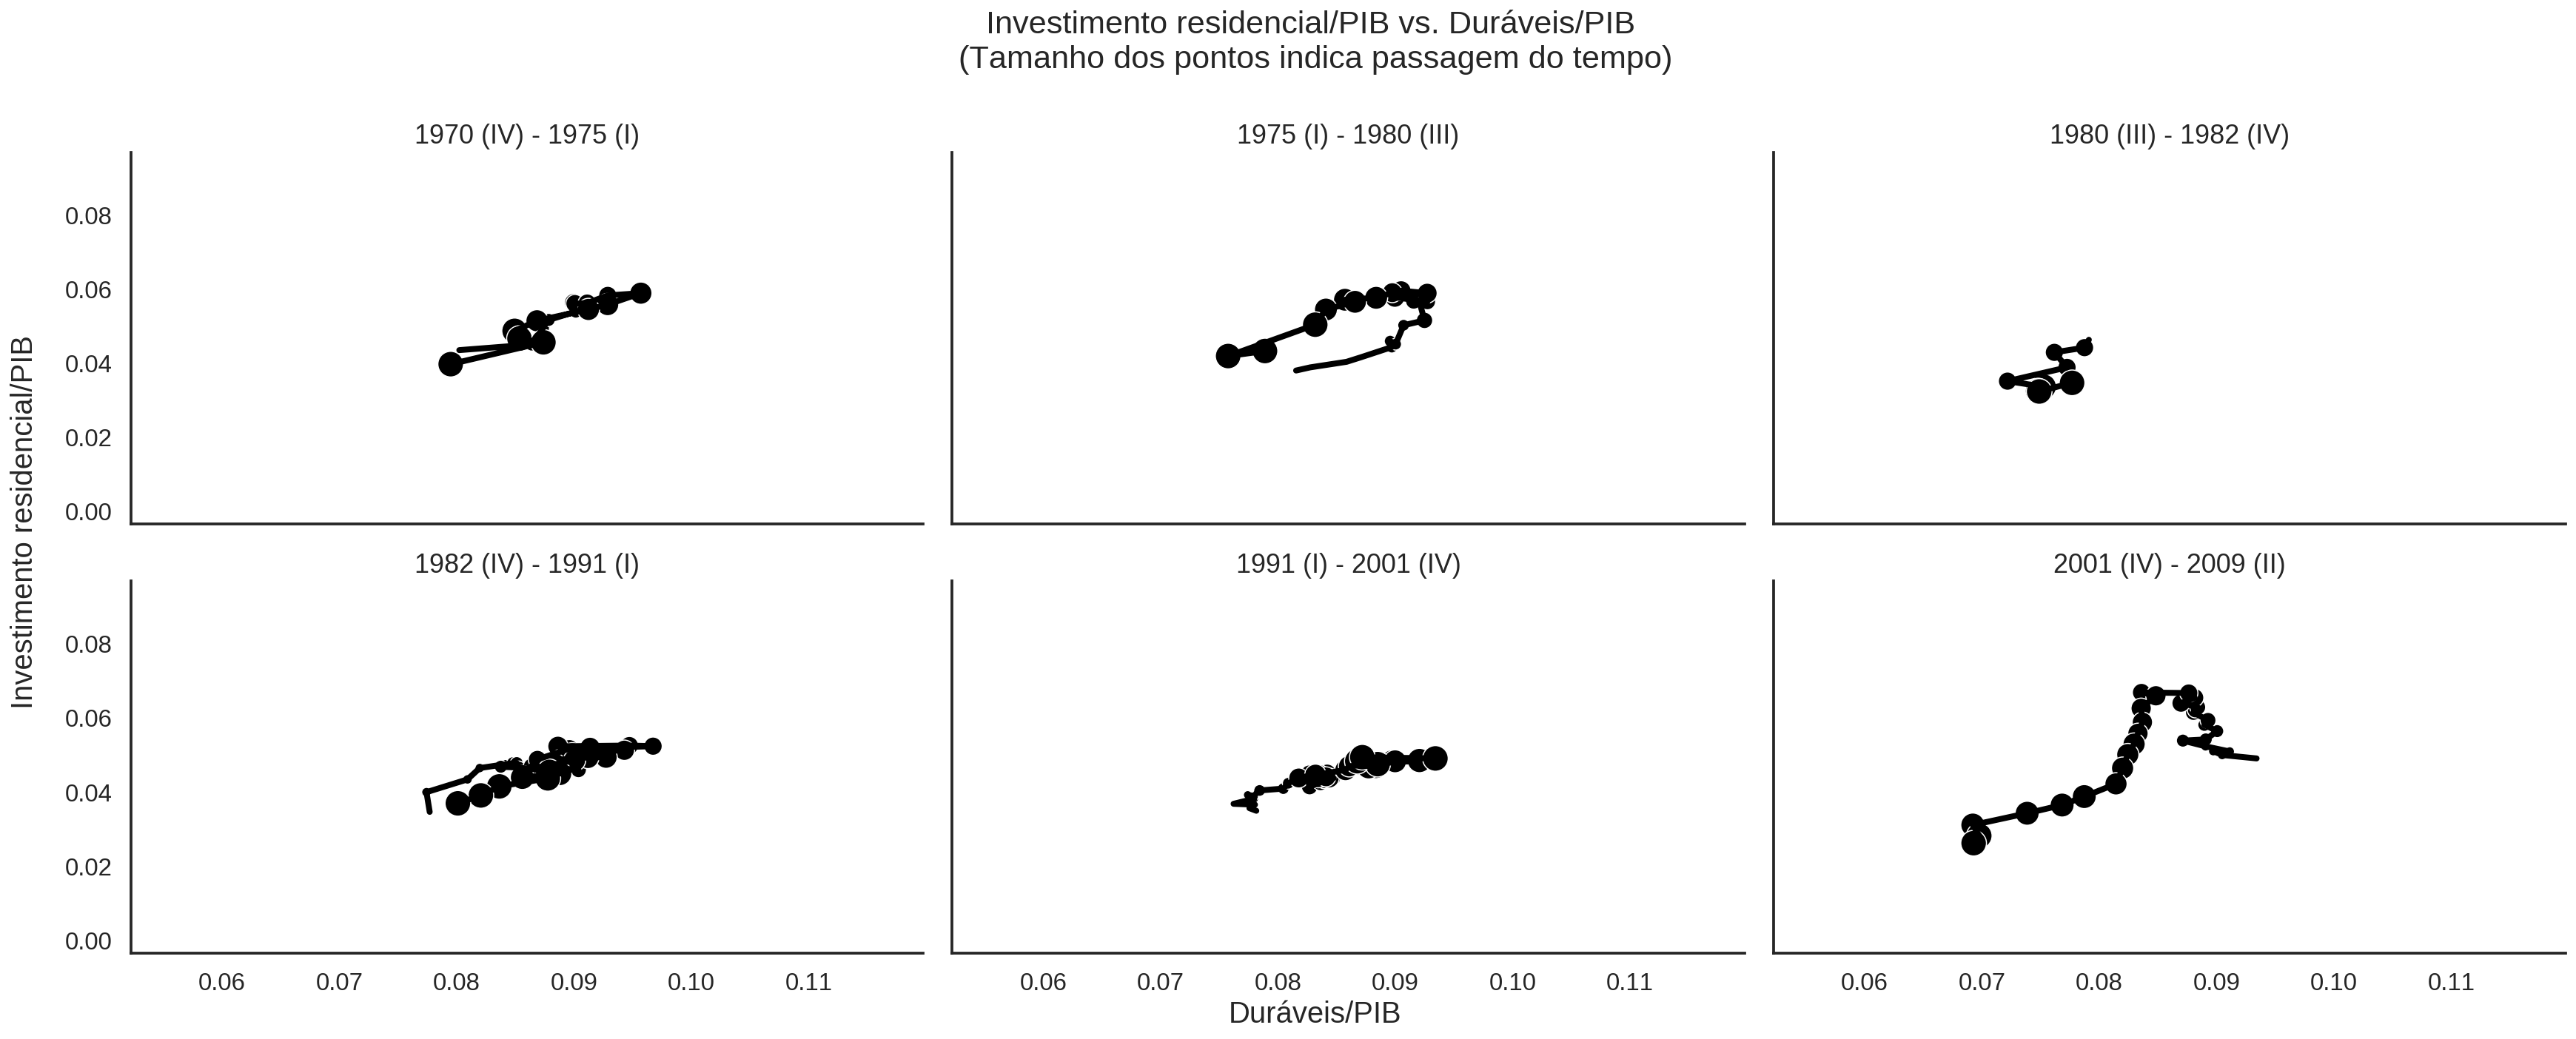

In [51]:
sns.set_context('talk')
fig, ax = plt.subplots(2,
                       3,
                       sharex=True,
                       sharey=True,
                       squeeze=False,
                       figsize=(24, 10))

sns.scatterplot(y='Ih/PIB',
                x='Duráveis/PIB',
                data=df["1970-12":"1975-01"],
                ax=ax[0, 0],
                size='Ano',
                sizes=(5, 300),
                color='black',
                legend=False)
sns.lineplot(y='Ih/PIB',
             x='Duráveis/PIB',
             data=df["1970-12":"1975-01"],
             ax=ax[0, 0],
             sort=False,
             color='black',
             lw=4,
            )
ax[0, 0].set_title("1970 (IV) - 1975 (I)", fontsize=18)

sns.scatterplot(y='Ih/PIB',
                x='Duráveis/PIB',
                data=df["1975-01":"1980-10"],
                ax=ax[0, 1],
                size='Ano',
                sizes=(5, 300),
                color='black',
                legend=False)
sns.lineplot(y='Ih/PIB',
             x='Duráveis/PIB',
             data=df["1975-01":"1980-10"],
             ax=ax[0, 1],
             sort=False,
             color='black',
             lw=4,)
ax[0, 1].set_title("1975 (I) - 1980 (III)", fontsize=18)

sns.scatterplot(y='Ih/PIB',
                x='Duráveis/PIB',
                data=df["1980-10":"1982-12"],
                ax=ax[0, 2],
                size='Ano',
                sizes=(5, 300),
                color='black',
                legend=False)
sns.lineplot(y='Ih/PIB',
             x='Duráveis/PIB',
             data=df["1980-10":"1982-12"],
             ax=ax[0, 2],
             sort=False,
             color='black',
             lw=4,)
ax[0, 2].set_title("1980 (III) - 1982 (IV)", fontsize=18)

sns.scatterplot(y='Ih/PIB',
                x='Duráveis/PIB',
                data=df["1982-12":"1991-01"],
                ax=ax[1, 0],
                size='Ano',
                sizes=(5, 300),
                color='black',
                legend=False)
sns.lineplot(y='Ih/PIB',
             x='Duráveis/PIB',
             data=df["1982-12":"1991-01"],
             ax=ax[1, 0],
             sort=False,
             color='black',
             lw=4,)
ax[1, 0].set_title("1982 (IV) - 1991 (I)")

sns.scatterplot(y='Ih/PIB',
                x='Duráveis/PIB',
                data=df["1991-01":"2001-12"],
                ax=ax[1, 1],
                size='Ano',
                sizes=(5, 300),
                color='black',
                legend=False)
sns.lineplot(y='Ih/PIB',
             x='Duráveis/PIB',
             data=df["1991-01":"2001-12"],
             ax=ax[1, 1],
             sort=False,
             color='black',
             lw=4,)
ax[1, 1].set_title("1991 (I) - 2001 (IV)", fontsize=18)

sns.scatterplot(y='Ih/PIB',
                x='Duráveis/PIB',
                data=df["2001-12":"2009-07"],
                ax=ax[1, 2],
                size='Ano',
                sizes=(5, 300),
                color='black',
                legend=False)
sns.lineplot(y='Ih/PIB',
             x='Duráveis/PIB',
             data=df["2001-12":"2009-07"],
             ax=ax[1, 2],
             sort=False,
             color='black',
             lw=4,)
ax[1, 2].set_title("2001 (IV) - 2009 (II)", fontsize=18)

sns.despine()
ax[0, 0].set_ylabel("")
ax[1, 0].set_xlabel('')
ax[1, 0].set_ylabel("")
ax[1, 1].set_xlabel('')
ax[1, 2].set_xlabel('')

fig.tight_layout(rect=[0, 0.03, 1, 0.90])
fig.text(0.5,
         0.03,
         'Duráveis/PIB',
         ha='center',
         fontsize=20)
fig.text(-0.01,
         0.5,
         'Investimento residencial/PIB',
         va='center',
         rotation='vertical',
         fontsize=20)
plt.suptitle(
    "Investimento residencial/PIB vs. Duráveis/PIB \n(Tamanho dos pontos indica passagem do tempo)"
)

plt.show()
salvar_grafico(file_name="Ciclo_Ih_Duraveis")

## Centrados

In [52]:
x = [int(i) for i in range(9)]
xaxis = np.linspace(-4,4,9, dtype = 'int')
peak = recessions['xmin'][recessions['xmin'] == True].index
centered = [[(peak[i] - pd.to_timedelta(12, unit='M')).strftime('%Y-%m'), peak[i].strftime('%Y-%m'),(peak[i] + pd.to_timedelta(12, unit='M')).strftime('%Y-%m')] for i in range(len(peak))]
centered = centered[5:]

trough = recessions['xmax'][recessions['xmax'] == True].index
centeredT = [[(trough[i] - pd.to_timedelta(12, unit='M')).strftime('%Y-%m'), trough[i].strftime('%Y-%m'),(trough[i] + pd.to_timedelta(12, unit='M')).strftime('%Y-%m')] for i in range(len(trough))]
centeredT = centeredT[6:]

/home/gpetrini/.local/lib/python3.6/site-packages/pandas/util/_decorators.py:208: FutureWarning: M and Y units are deprecated and will be removed in a future version.
  return func(*args, **kwargs)
/home/gpetrini/.local/lib/python3.6/site-packages/pandas/core/tools/timedeltas.py:134: FutureWarning: M and Y units are deprecated and will be removed in a future version.
  result = Timedelta(r, unit)


In [53]:
df = web.get_data_fred(
    [
     'GDP',
     'PRFI',
     'PNFI',
     'HCCSDODNS',
    ],
    start,
    end
)

df.columns = [
    'PIB',
    'Investimento residencial',
    'Investimento não-residencial',
    'Crédito ao consumidor',
]

#df = df.resample('QS').mean()
df.index.name = ''
df = df.dropna()
df.head()

PIB  Investimento residencial  Investimento não-residencial  \
                                                                              
1952-01-01  359.820                    18.269                        35.131   
1952-04-01  361.030                    18.763                        35.765   
1952-07-01  367.701                    18.754                        32.892   
1952-10-01  380.812                    19.647                        35.816   
1953-01-01  387.980                    19.982                        37.791   

            Crédito ao consumidor  
                                   
1952-01-01                 25.947  
1952-04-01                 27.542  
1952-07-01                 28.678  
1952-10-01                 30.522  
1953-01-01                 32.496

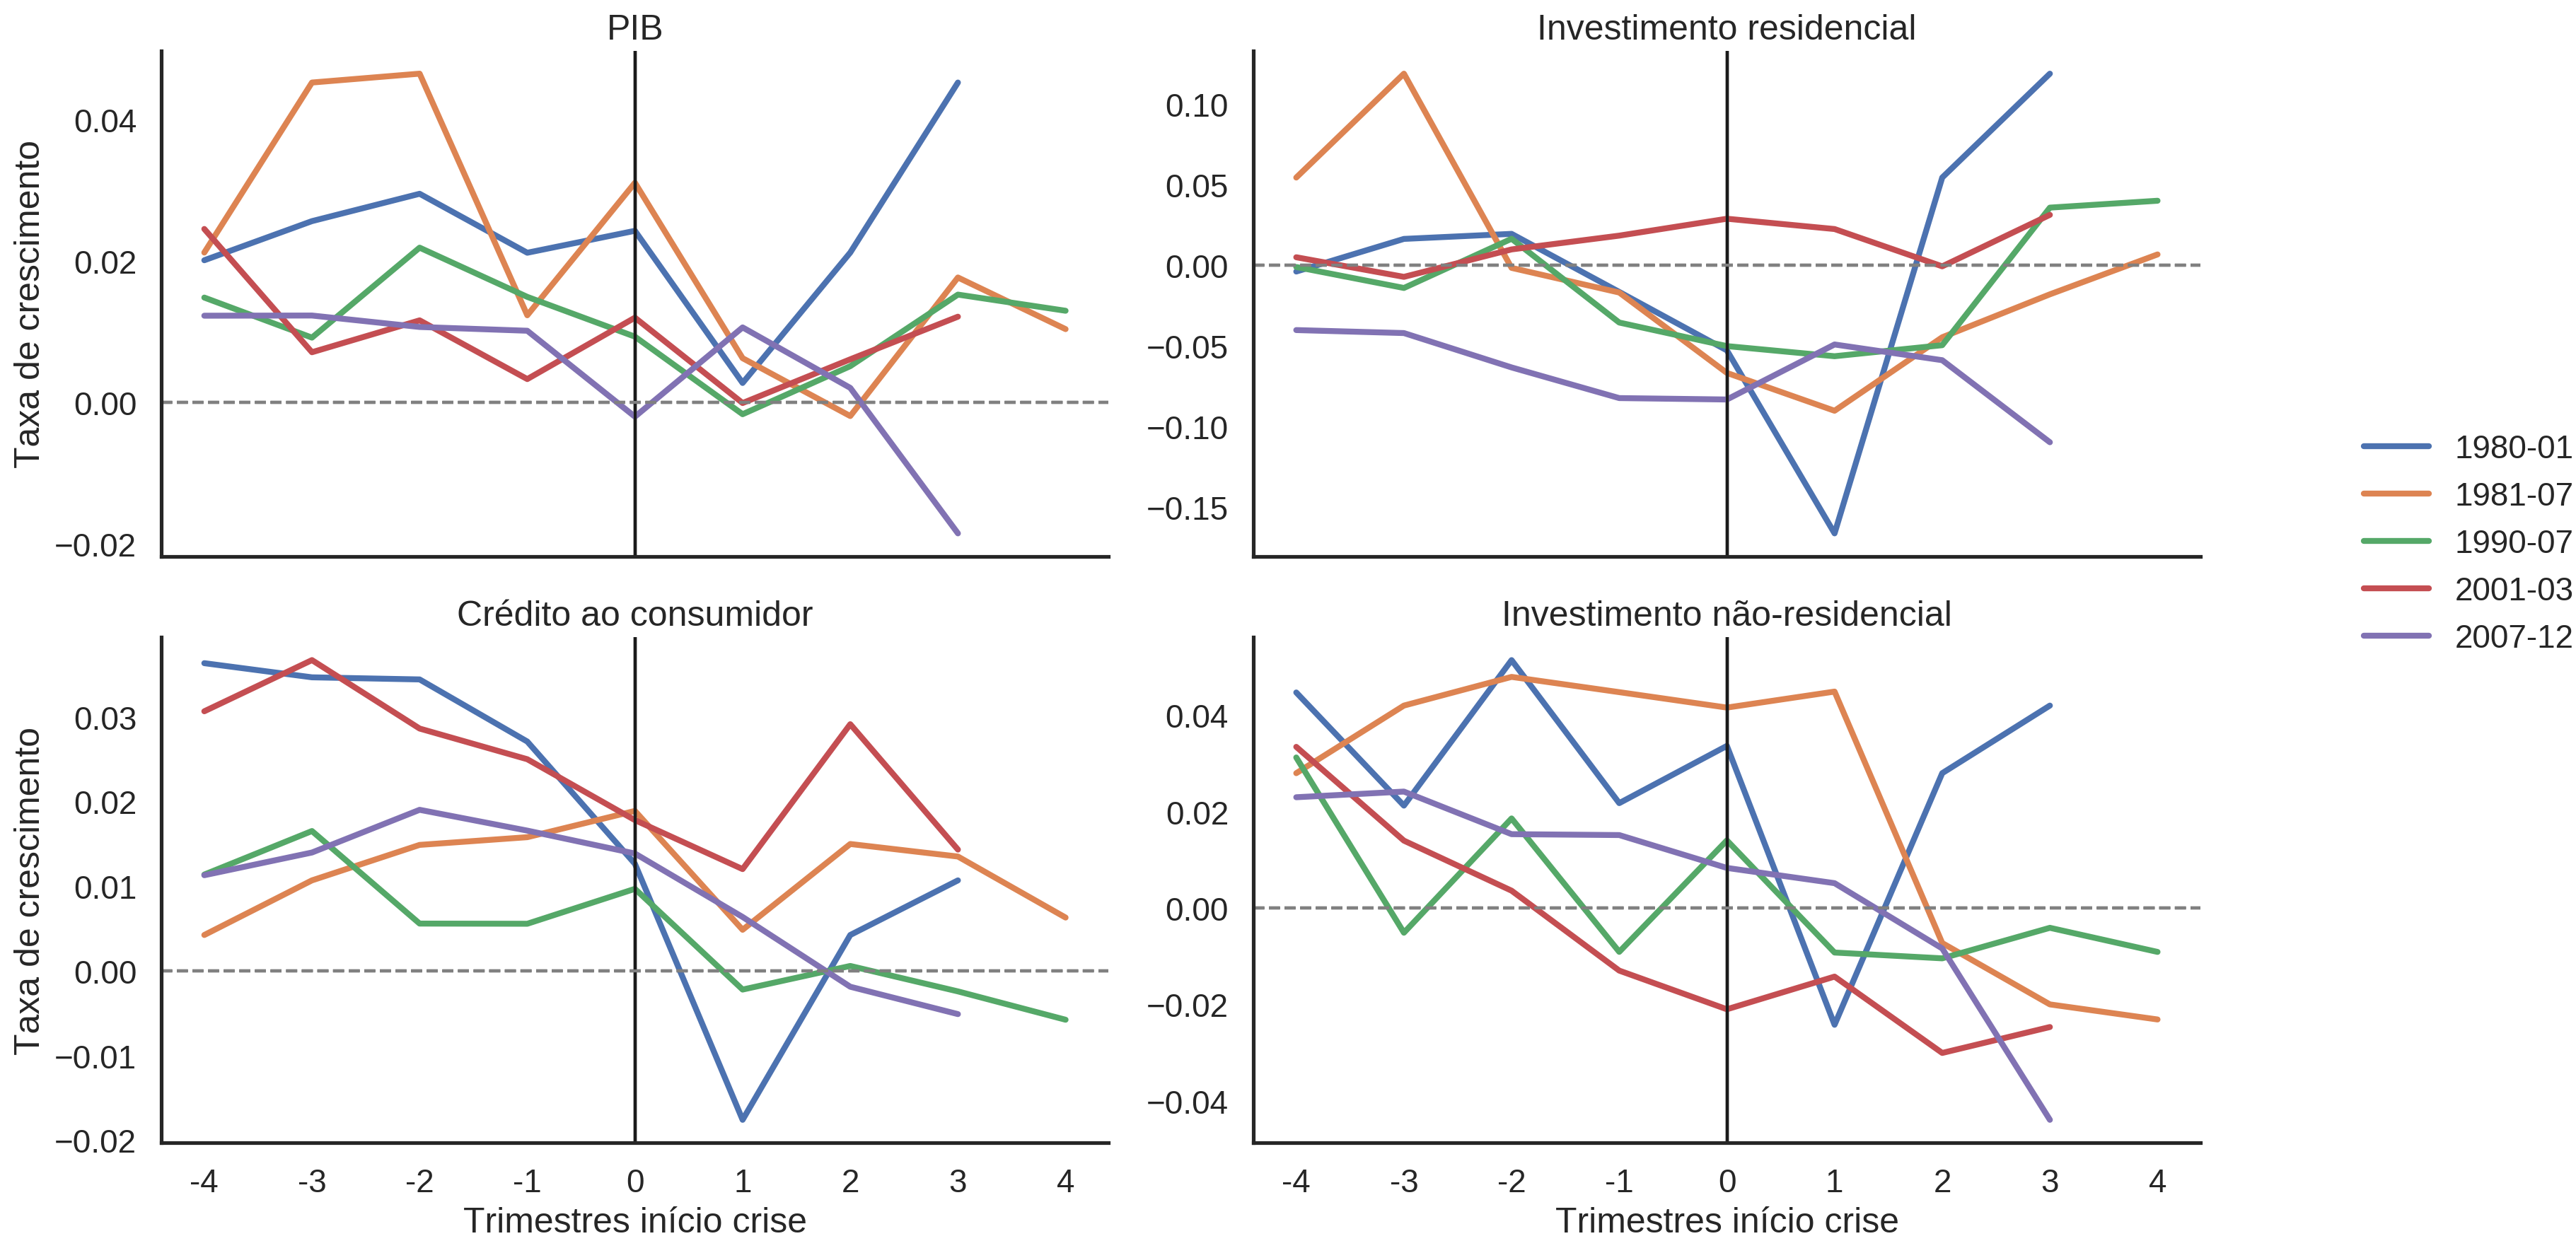

In [54]:
sns.set_context('talk')
fig, ax = plt.subplots(2,2, sharex=True, figsize=(16,10))

for i in range(len(centered)):
  ax[0,0].plot(df['PIB'].pct_change()[centered[i][0]:centered[i][2]].values, label=centered[i][1], lw=3, ls='-')
  handles, labels = ax[0,0].get_legend_handles_labels()
  ax[0,0].axvline(x=4, color='k', ls='-', lw=1.5)
  ax[0,0].axhline(y=0, color='gray', ls='--', lw=1.5)
  ax[0,0].set_title('PIB')
  ax[0,0].set_ylabel('Taxa de crescimento')

for i in range(len(centered)):
  ax[0,1].plot(df['Investimento residencial'].pct_change()[centered[i][0]:centered[i][2]].values, label=centered[i][1], lw=3, ls='-')
  ax[0,1].set_title('Investimento residencial')
  ax[0,1].axvline(x=4, color='k', ls='-', lw=1.5)
  ax[0,1].axhline(y=0, color='gray', ls='--', lw=1.5)
  


for i in range(len(centered)):
  ax[1,0].plot(df['Crédito ao consumidor'].pct_change()[centered[i][0]:centered[i][2]].values, label=centered[i][1], lw=3, ls='-')
  ax[1,0].set_title('Crédito ao consumidor')
  ax[1,0].axvline(x=4, color='k', ls='-', lw=1.5)
  ax[1,0].axhline(y=0, color='gray', ls='--', lw=1.5)
  ax[1,0].set_xlabel('Trimestres início crise')
  ax[1,0].set_ylabel('Investimento não-residencial')
  ax[1,0].set_ylabel('Taxa de crescimento')

for i in range(len(centered)):
  ax[1,1].plot(df['Investimento não-residencial'].pct_change()[centered[i][0]:centered[i][2]].values, label=centered[i][1], lw=3, ls='-')
  ax[1,1].set_title('Investimento não-residencial')
  ax[1,1].axvline(x=4, color='k', ls='-', lw=1.5)
  ax[1,1].axhline(y=0, color='gray', ls='--', lw=1.5)
  ax[1,1].set_xlabel('Trimestres início crise')
  
  

plt.xticks(x, xaxis)
sns.despine()
fig.legend(handles, labels, bbox_to_anchor=(1.15, 0.6))
#fig.suptitle('Selected Taxa de crescimentos (4 quarters before and after the recession peak)')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.set_dpi(100)
plt.show()
salvar_grafico(file_name="Centrado_Inicio")

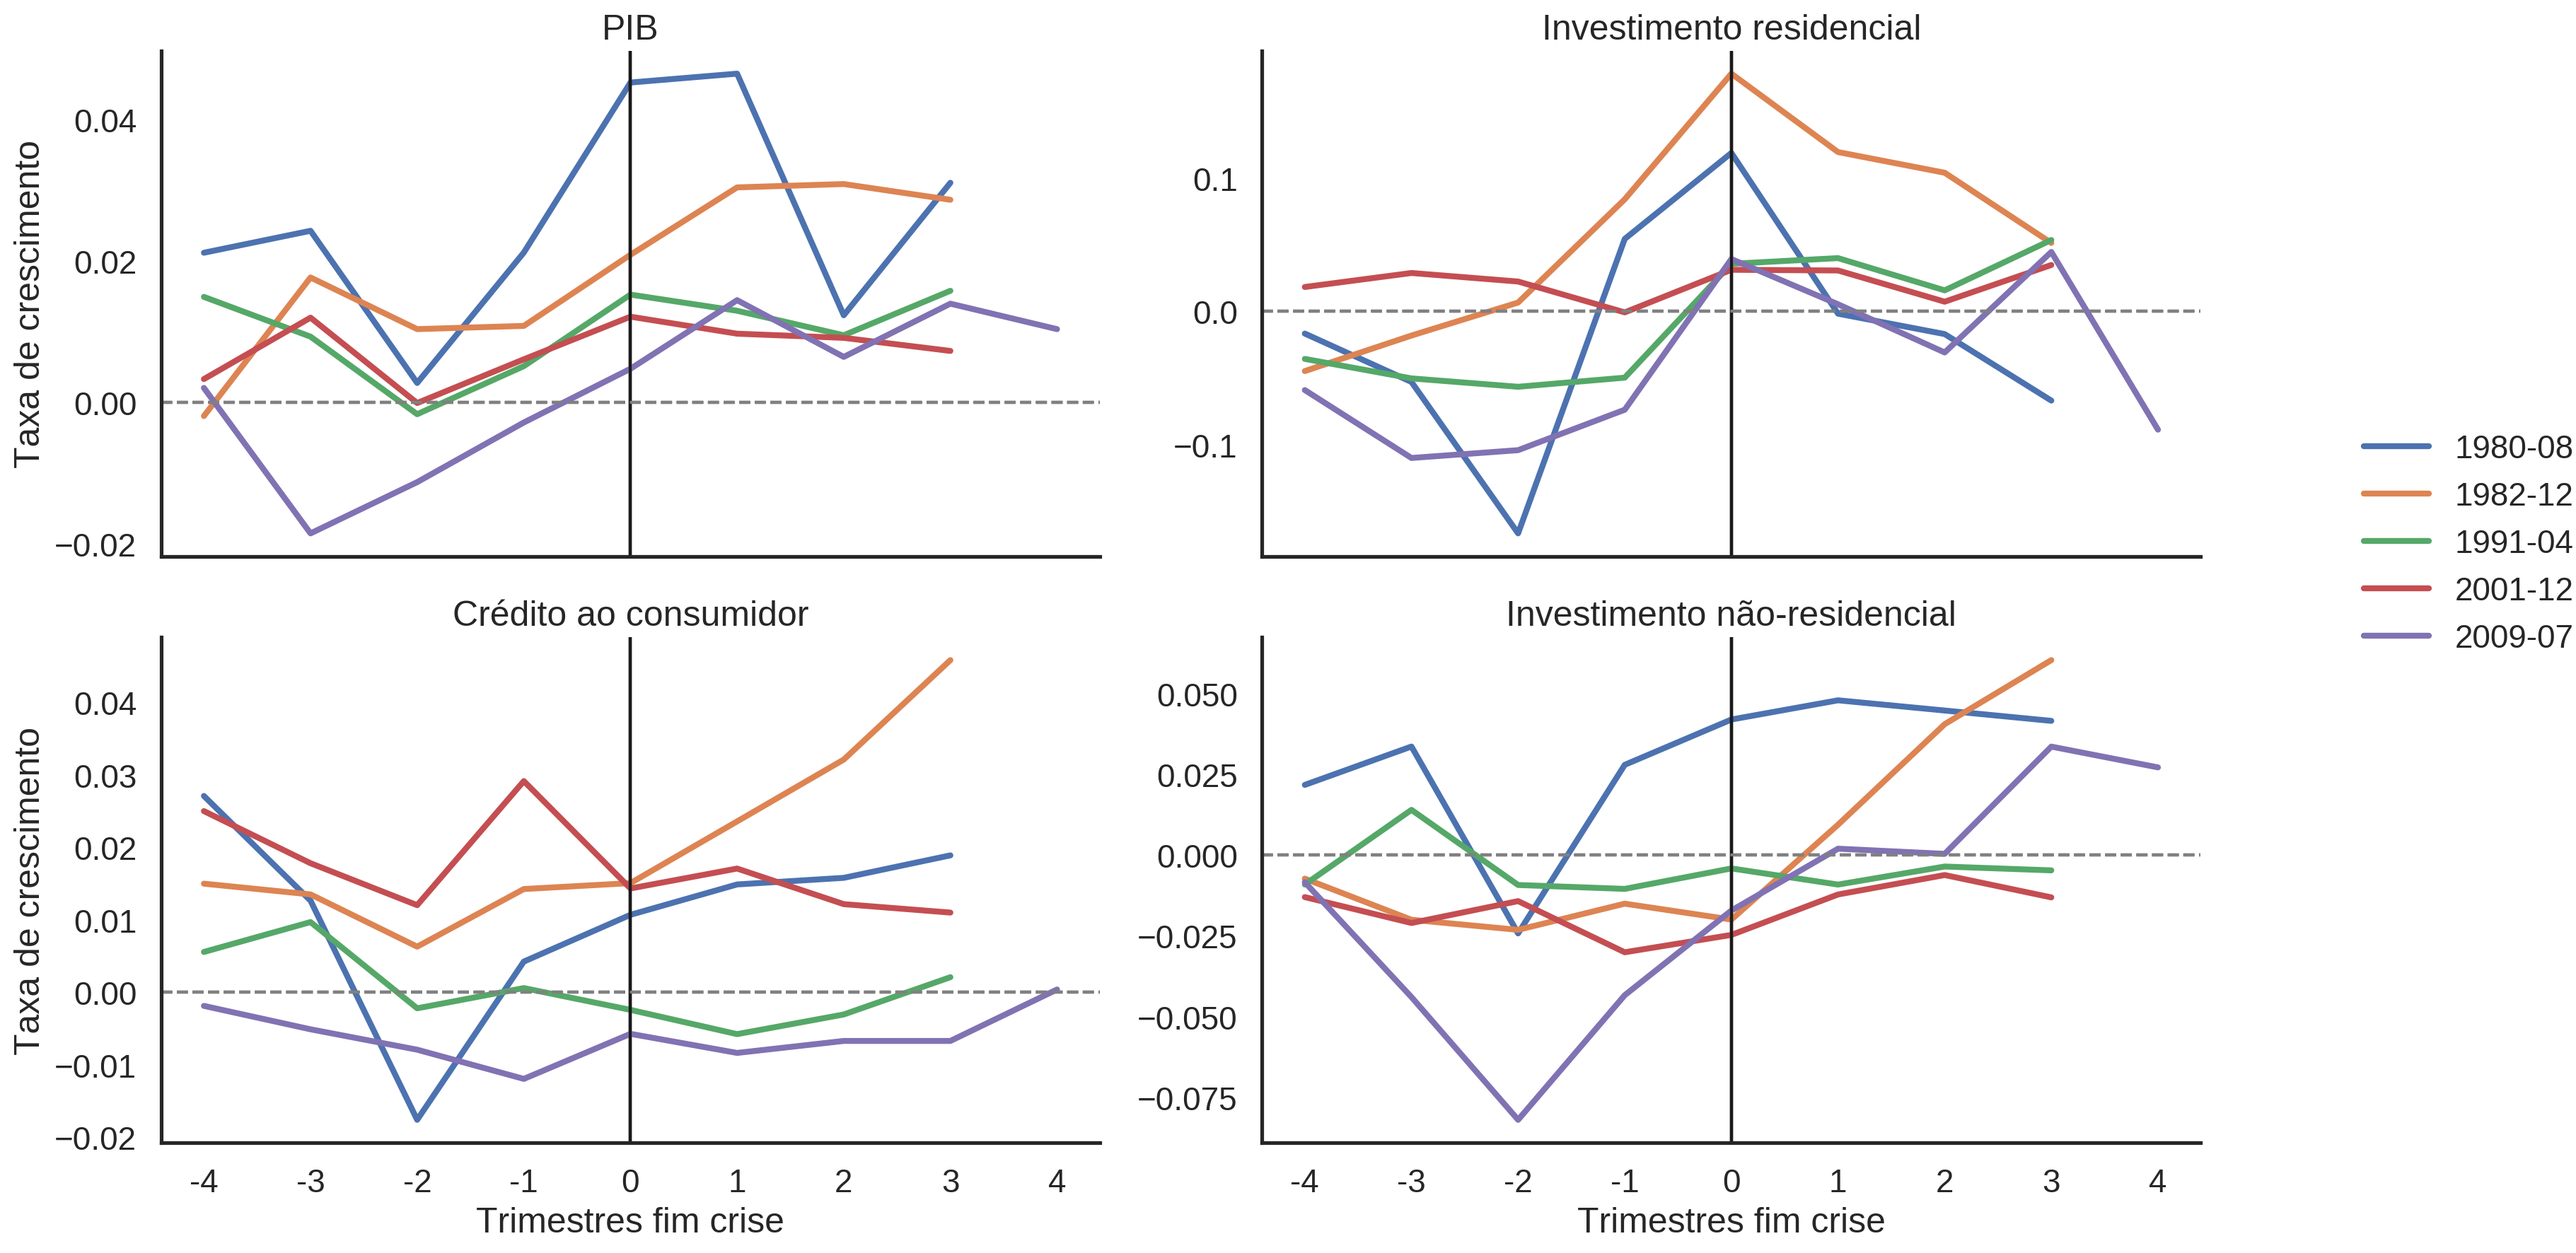

In [55]:
sns.set_context('talk')
fig, ax = plt.subplots(2,2, sharex=True, figsize=(16,10))

for i in range(len(centered)):
  ax[0,0].plot(df['PIB'].pct_change()[centeredT[i][0]:centeredT[i][2]].values, label=centeredT[i][1], lw=3, ls='-')
  handles, labels = ax[0,0].get_legend_handles_labels()
  ax[0,0].axvline(x=4, color='k', ls='-', lw=1.5)
  ax[0,0].axhline(y=0, color='gray', ls='--', lw=1.5)
  ax[0,0].set_title('PIB')
  ax[0,0].set_ylabel('Taxa de crescimento')

for i in range(len(centered)):
  ax[0,1].plot(df['Investimento residencial'].pct_change()[centeredT[i][0]:centeredT[i][2]].values, label=centeredT[i][1], lw=3, ls='-')
  ax[0,1].set_title('Investimento residencial')
  ax[0,1].axvline(x=4, color='k', ls='-', lw=1.5)
  ax[0,1].axhline(y=0, color='gray', ls='--', lw=1.5)
  


for i in range(len(centered)):
  ax[1,0].plot(df['Crédito ao consumidor'].pct_change()[centeredT[i][0]:centeredT[i][2]].values, label=centeredT[i][1], lw=3, ls='-')
  ax[1,0].set_title('Crédito ao consumidor')
  ax[1,0].axvline(x=4, color='k', ls='-', lw=1.5)
  ax[1,0].axhline(y=0, color='gray', ls='--', lw=1.5)
  ax[1,0].set_xlabel('Trimestres fim crise')
  ax[1,0].set_ylabel('Investimento não-residencial')
  ax[1,0].set_ylabel('Taxa de crescimento')

for i in range(len(centered)):
  ax[1,1].plot(df['Investimento não-residencial'].pct_change()[centeredT[i][0]:centeredT[i][2]].values, label=centeredT[i][1], lw=3, ls='-')
  ax[1,1].set_title('Investimento não-residencial')
  ax[1,1].axvline(x=4, color='k', ls='-', lw=1.5)
  ax[1,1].axhline(y=0, color='gray', ls='--', lw=1.5)
  ax[1,1].set_xlabel('Trimestres fim crise')
  
  

plt.xticks(x, xaxis)
sns.despine()
fig.legend(handles, labels, bbox_to_anchor=(1.15, 0.6))
#fig.suptitle('Selected Taxa de crescimentos (4 quarters before and after the recession peak)')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.set_dpi(100)
plt.show()
salvar_grafico(file_name="Centrado_Fim")

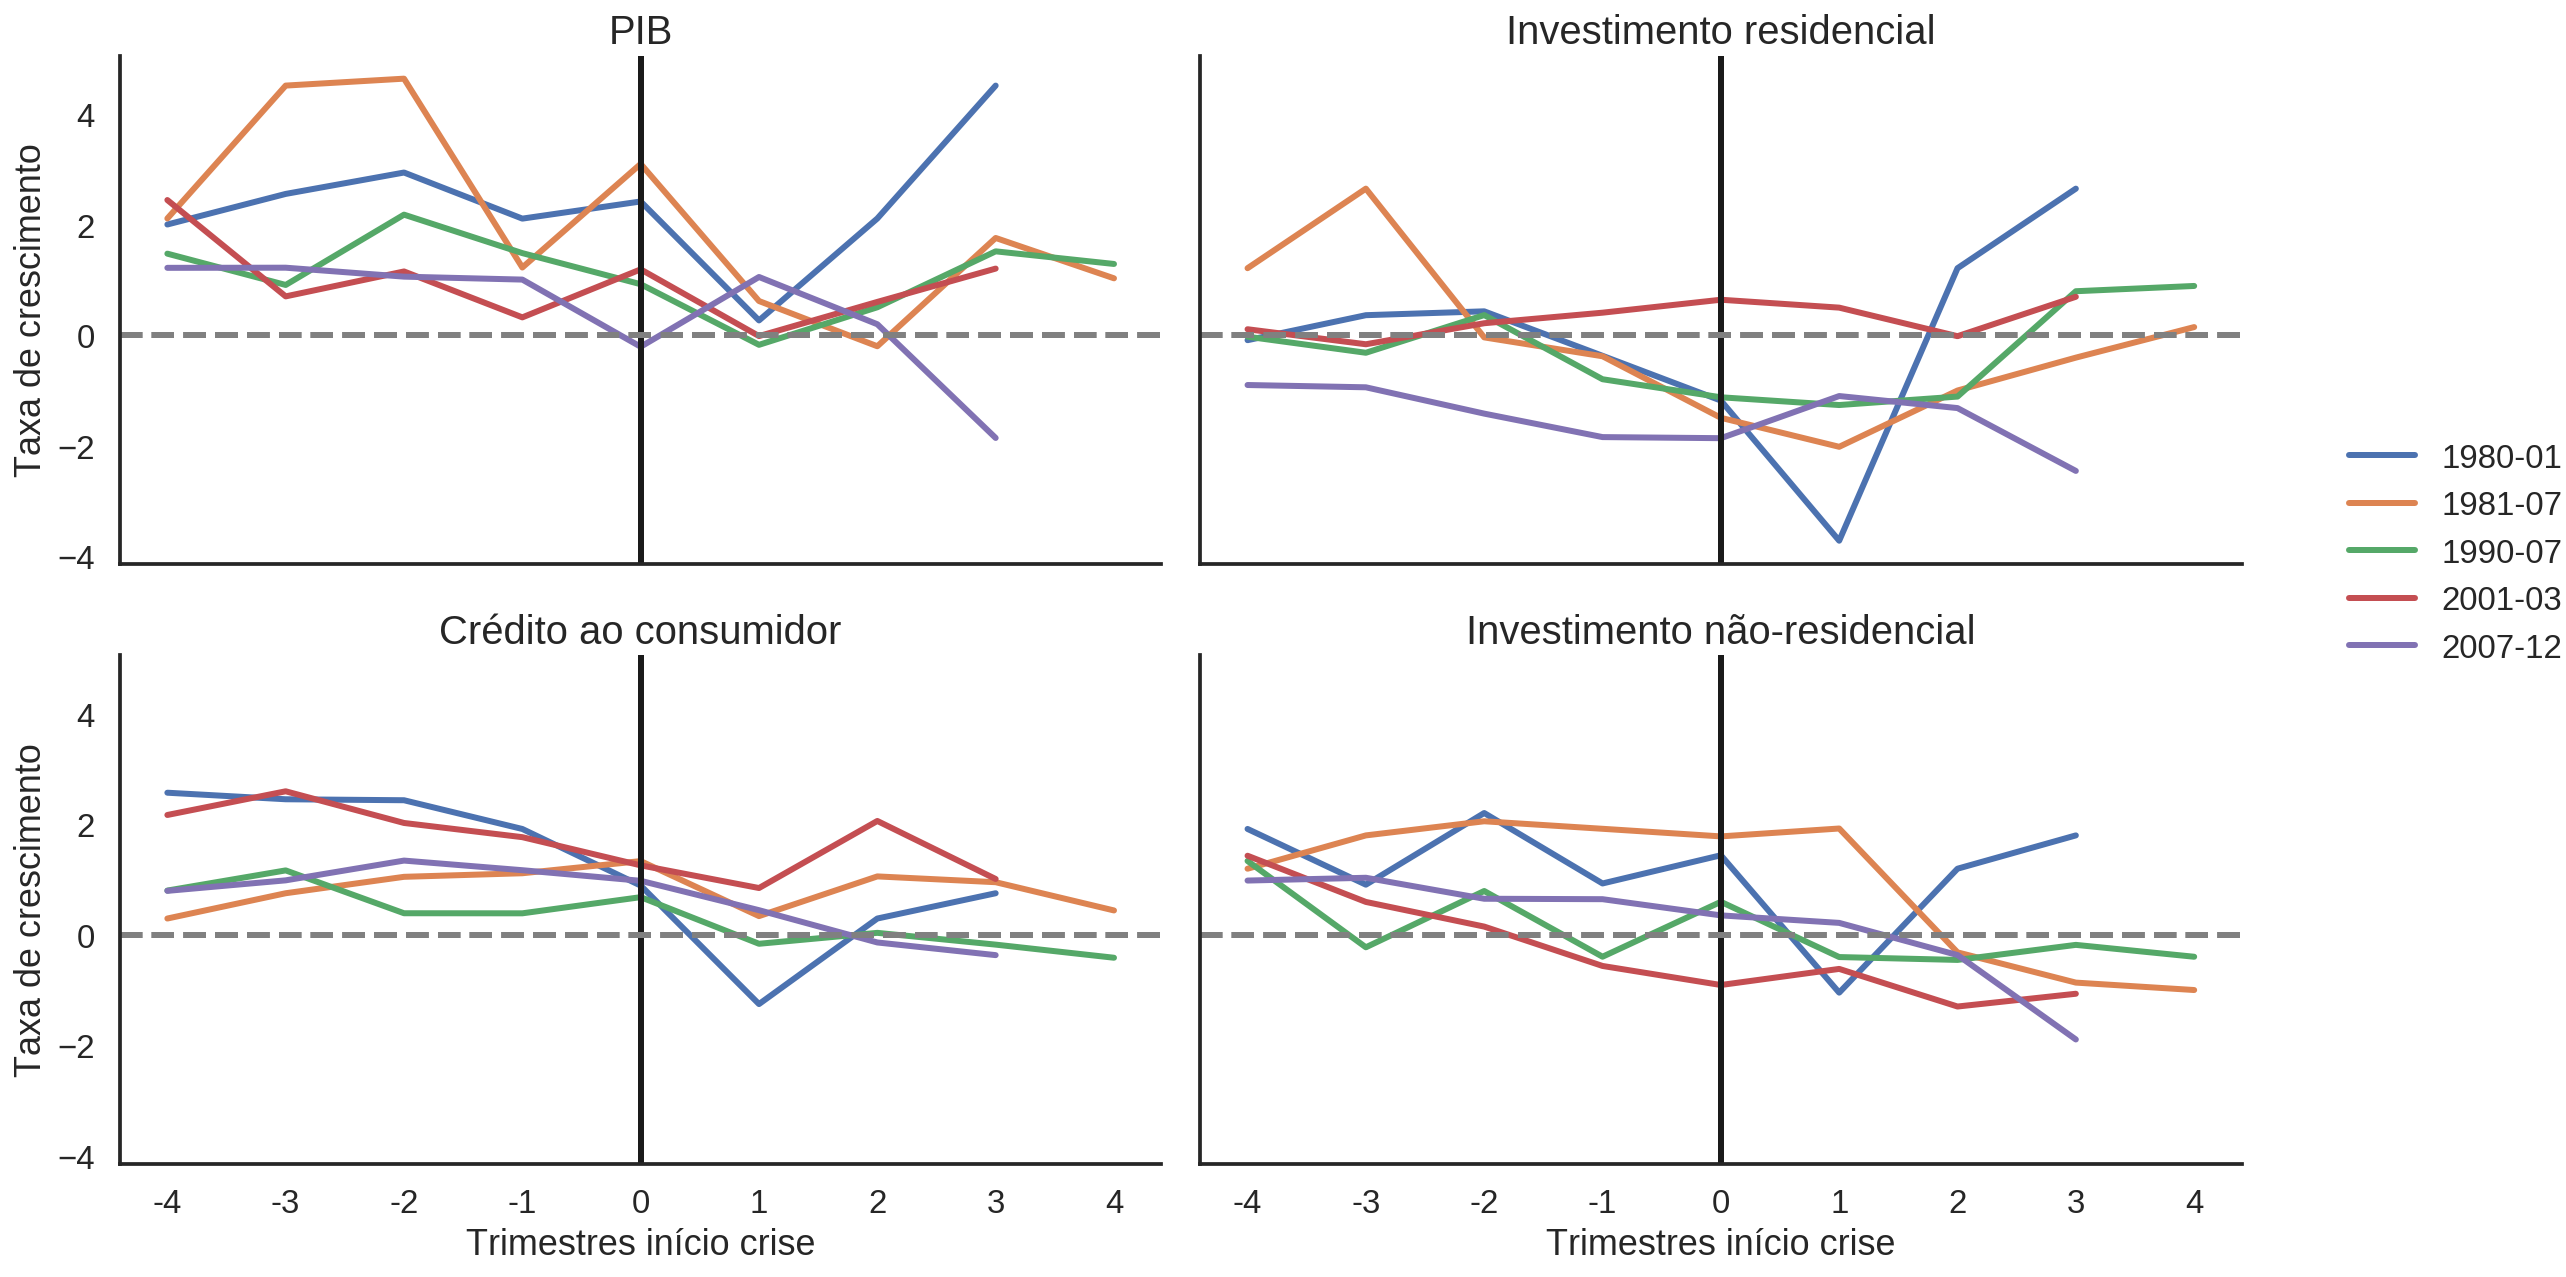

In [56]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(16,10))


for i in range(len(centered)):
  ax[0,0].plot(df['PIB'].pct_change().apply(lambda x: x/np.std(df['PIB'].pct_change()))[centered[i][0]:centered[i][2]].values, label=centered[i][1], lw=3, ls='-')
  handles, labels = ax[0,0].get_legend_handles_labels()
  ax[0,0].axvline(x=4, color='k', ls='-', lw=3)
  ax[0,0].set_title('PIB', fontsize=20)
  ax[0,0].set_ylabel('Taxa de crescimento', fontsize=18)
  ax[0,0].axhline(y=0, color='gray', ls='--', lw=3)

for i in range(len(centered)):
  ax[0,1].plot(df['Investimento residencial'].pct_change().apply(lambda x: x/np.std(df['Investimento residencial'].pct_change()))[centered[i][0]:centered[i][2]].values, label=centered[i][1], lw=3, ls='-')
  ax[0,1].set_title('Investimento residencial', fontsize=20)
  ax[0,1].axvline(x=4, color='k', ls='-', lw=3)
  ax[0,1].axhline(y=0, color='gray', ls='--', lw=3)
  


for i in range(len(centered)):
  ax[1,0].plot(df['Crédito ao consumidor'].pct_change().apply(lambda x: x/np.std(df['Crédito ao consumidor'].pct_change()))[centered[i][0]:centered[i][2]].values, label=centered[i][1], lw=3, ls='-')
  ax[1,0].set_title('Crédito ao consumidor', fontsize=20)
  ax[1,0].axvline(x=4, color='k', ls='-', lw=3)
  ax[1,0].axhline(y=0, color='gray', ls='--', lw=3)
  ax[1,0].set_xlabel('Trimestres início crise', fontsize=18)
  ax[1,0].set_ylabel('Investimento não-residencial', fontsize=20)
  ax[1,0].set_ylabel('Taxa de crescimento', fontsize=18)

for i in range(len(centered)):
  ax[1,1].plot(df['Investimento não-residencial'].pct_change().apply(lambda x: x/np.std(df['Investimento não-residencial'].pct_change()))[centered[i][0]:centered[i][2]].values, label=centered[i][1], lw=3, ls='-')
  ax[1,1].set_title('Investimento não-residencial', fontsize=20)
  ax[1,1].axvline(x=4, color='k', ls='-', lw=3)
  ax[1,1].axhline(y=0, color='gray', ls='--', lw=3)
  ax[1,1].set_xlabel('Trimestres início crise', fontsize=18)

plt.xticks(x, xaxis)
sns.despine()
fig.legend(handles, labels, bbox_to_anchor=(1.125, 0.6))
#fig.suptitle('Taxas de crescimento normalizadas (4 trimestres antes e depois do começo da crise)')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
salvar_grafico(file_name="Centrado_Inicio_Norm")

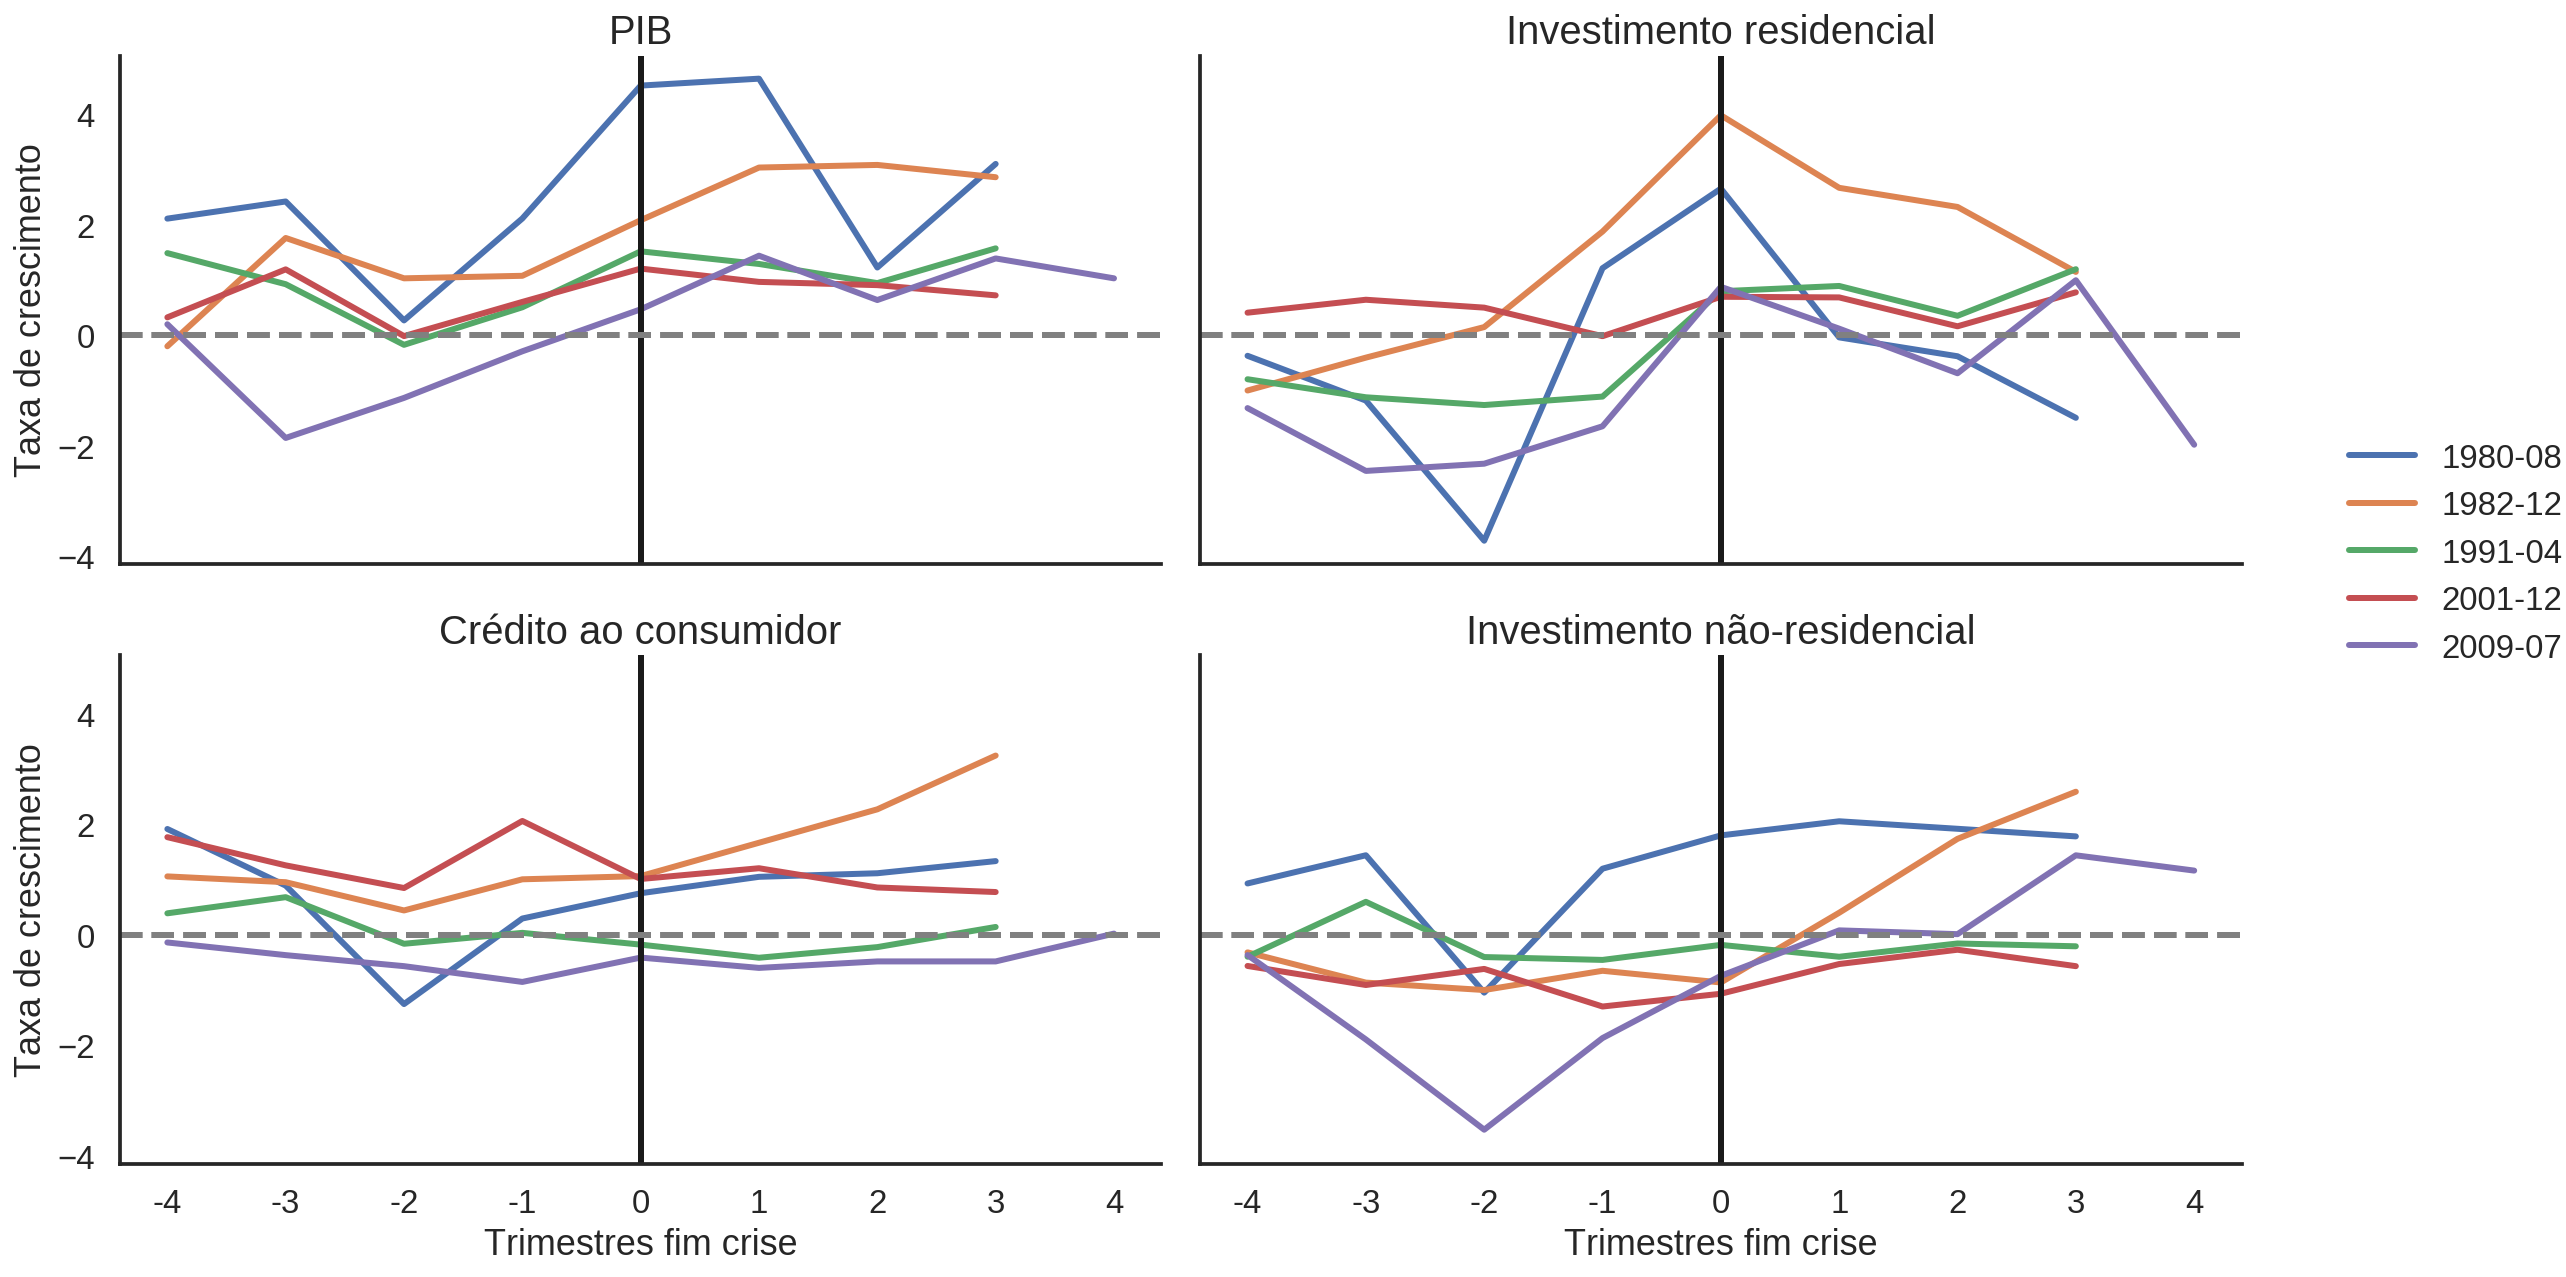

In [57]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(16,10))


for i in range(len(centered)):
  ax[0,0].plot(df['PIB'].pct_change().apply(lambda x: x/np.std(df['PIB'].pct_change()))[centeredT[i][0]:centeredT[i][2]].values, label=centeredT[i][1], lw=3, ls='-')
  handles, labels = ax[0,0].get_legend_handles_labels()
  ax[0,0].axvline(x=4, color='k', ls='-', lw=3)
  ax[0,0].set_title('PIB', fontsize=20)
  ax[0,0].set_ylabel('Taxa de crescimento', fontsize=18)
  ax[0,0].axhline(y=0, color='gray', ls='--', lw=3)

for i in range(len(centered)):
  ax[0,1].plot(df['Investimento residencial'].pct_change().apply(lambda x: x/np.std(df['Investimento residencial'].pct_change()))[centeredT[i][0]:centeredT[i][2]].values, label=centeredT[i][1], lw=3, ls='-')
  ax[0,1].set_title('Investimento residencial', fontsize=20)
  ax[0,1].axvline(x=4, color='k', ls='-', lw=3)
  ax[0,1].axhline(y=0, color='gray', ls='--', lw=3)
  


for i in range(len(centered)):
  ax[1,0].plot(df['Crédito ao consumidor'].pct_change().apply(lambda x: x/np.std(df['Crédito ao consumidor'].pct_change()))[centeredT[i][0]:centeredT[i][2]].values, label=centeredT[i][1], lw=3, ls='-')
  ax[1,0].set_title('Crédito ao consumidor', fontsize=20)
  ax[1,0].axvline(x=4, color='k', ls='-', lw=3)
  ax[1,0].axhline(y=0, color='gray', ls='--', lw=3)
  ax[1,0].set_xlabel('Trimestres fim crise', fontsize=18)
  ax[1,0].set_ylabel('Investimento não-residencial', fontsize=20)
  ax[1,0].set_ylabel('Taxa de crescimento', fontsize=18)

for i in range(len(centered)):
  ax[1,1].plot(df['Investimento não-residencial'].pct_change().apply(lambda x: x/np.std(df['Investimento não-residencial'].pct_change()))[centeredT[i][0]:centeredT[i][2]].values, label=centeredT[i][1], lw=3, ls='-')
  ax[1,1].set_title('Investimento não-residencial', fontsize=20)
  ax[1,1].axvline(x=4, color='k', ls='-', lw=3)
  ax[1,1].axhline(y=0, color='gray', ls='--', lw=3)
  ax[1,1].set_xlabel('Trimestres fim crise', fontsize=18)

plt.xticks(x, xaxis)
sns.despine()
fig.legend(handles, labels, bbox_to_anchor=(1.125, 0.6))
#fig.suptitle('Taxas de crescimento normalizadas (4 trimestres antes e depois do começo da crise)')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
salvar_grafico(file_name="Centrado_Fim_Norm")

In [58]:
peakbase = [[centered[i][1], (peak[i+5] + pd.to_timedelta(0, unit='M')).strftime('%Y-%m'), centeredT[i][1]] for i in range(len(centered))]
peakbase

[['1980-01', '1980-01', '1980-08'],
 ['1981-07', '1981-07', '1982-12'],
 ['1990-07', '1990-07', '1991-04'],
 ['2001-03', '2001-03', '2001-12'],
 ['2007-12', '2007-12', '2009-07']]

In [59]:
def plot_centrado(serie="PIB", ax=ax):
    for i in range(len(peakbase)):
        ax.plot(df[serie][peakbase[i][1]:peakbase[i][2]].divide(df[serie][peakbase[i][1]:peakbase[i][2]][0]).apply(lambda x: x*100).values, label=peakbase[i][1][:4], lw=3, ls='-')
        handles, labels = ax.get_legend_handles_labels()
        ax.set_title(serie, fontsize=20)
        ax.set_ylabel('Taxa de crescimento', fontsize=18)
        ax.axhline(y=100, color='gray', ls='--', lw=2)
        ax.grid(False)


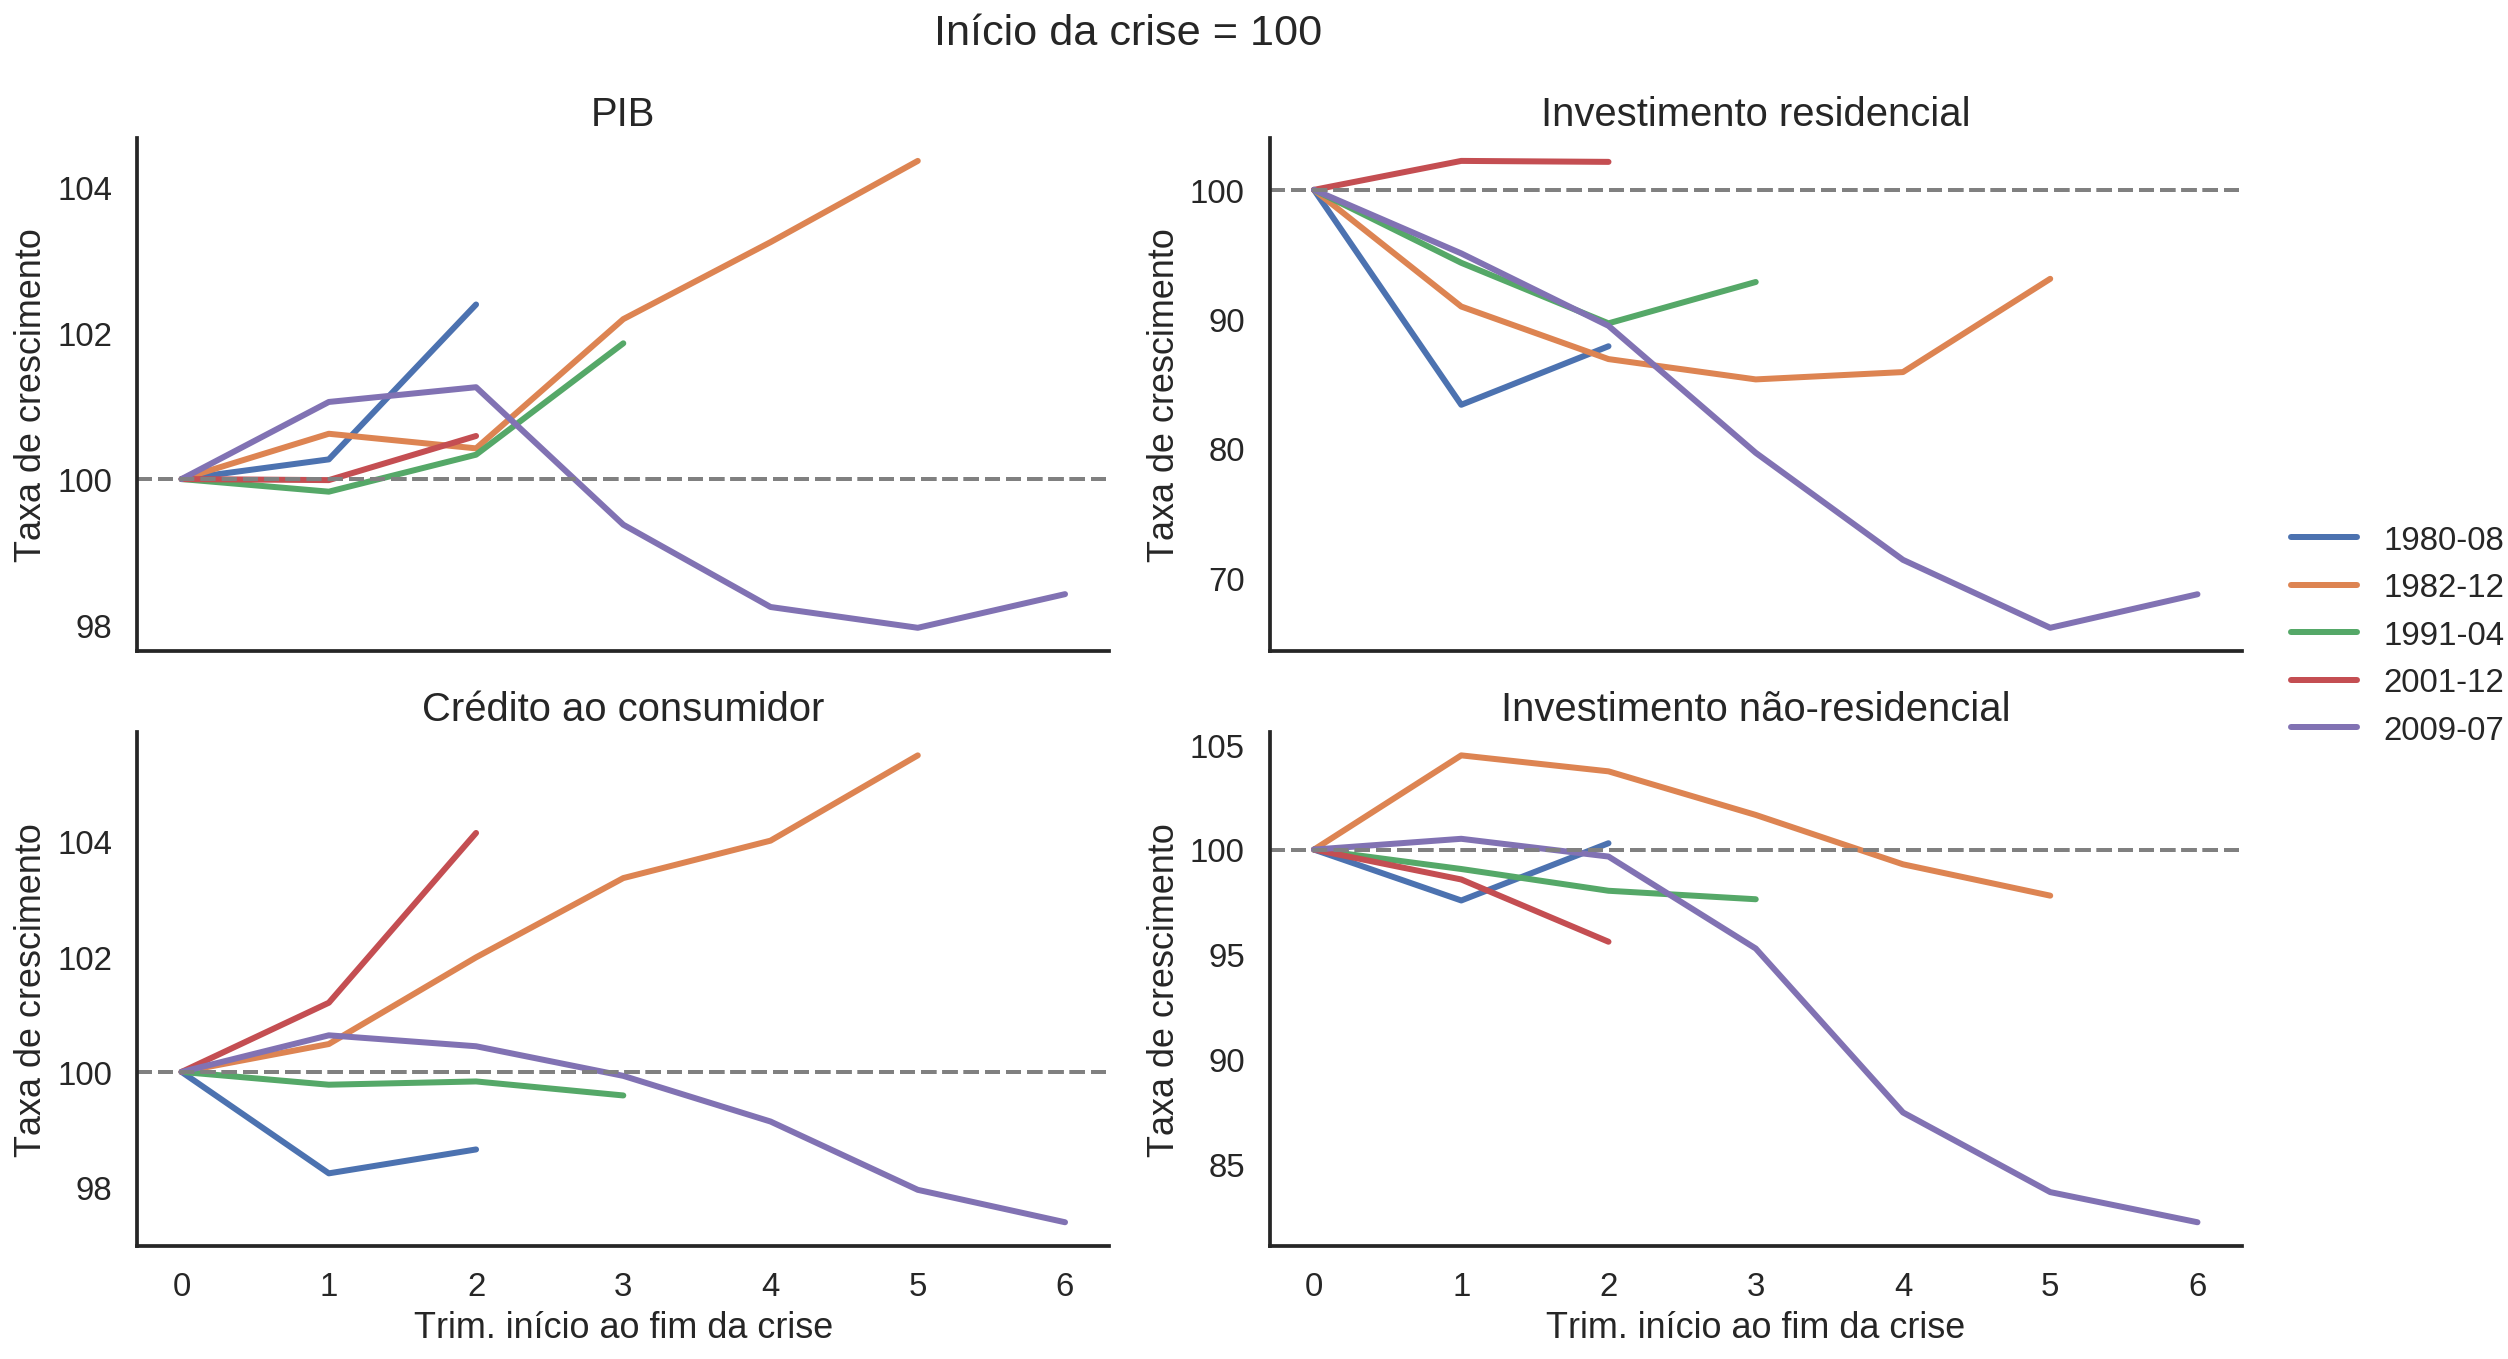

In [60]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=False, figsize=(16,10))

plot_centrado('PIB', ax=ax[0,0])
plot_centrado('Investimento residencial', ax=ax[0,1])
plot_centrado('Crédito ao consumidor', ax=ax[1,0])
plot_centrado('Investimento não-residencial', ax=ax[1,1])

ax[1,0].set_xlabel('Trim. início ao fim da crise', fontsize=18)
ax[1,1].set_xlabel('Trim. início ao fim da crise', fontsize=18)

sns.despine(left=False, bottom=False)
fig.legend(handles, labels, bbox_to_anchor=(1.1, 0.6))
fig.suptitle('Início da crise = 100')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
salvar_grafico(file_name="Crise_inicios")

# Gastos autônomos

In [61]:
df = web.get_data_fred(
    [
     'GDP',
     'EXPGS',
     'GCE',
     'PRFI',
     'HCCSDODNS', #'TOTALSL',
     'PRFI',
     'PCEC',
     'IMPGS'
    ],
    start,
    end
)

df.columns = [
    'PIB',
    'Exportações', 
    'Gastos do governo',
    'Investimento residencial',
    'Crédito ao consumo',
    'Investimento não-residencial',
    'Consumo',
    'Importações'
]

Z = [
    'Exportações',
    'Gastos do governo',
    'Investimento residencial',
    'Crédito ao consumo'
]

df['Autonomos'] = df[Z].sum(axis = 1)

df = df.resample('QS').mean()
df = df["1979":]
df.index.name= ''
df.tail()

PIB  Exportações  Gastos do governo  \
                                                        
2018-01-01  20163.159     2476.586           3521.356   
2018-04-01  20510.177     2543.602           3577.148   
2018-07-01  20749.752     2510.294           3622.564   
2018-10-01  20897.804     2510.517           3644.797   
2019-01-01  21098.827     2520.278           3683.061   

            Investimento residencial  Crédito ao consumo  \
                                                           
2018-01-01                   783.689            3862.270   
2018-04-01                   789.525            3895.225   
2018-07-01                   788.984            3956.035   
2018-10-01                   784.439            4009.718   
2019-01-01                   787.350            4052.517   

            Investimento não-residencial    Consumo  Importações  Autonomos  
                                                                             
2018-01-01                       783.689  13728.357     3105.552  10643.901  
2018-04-01                       789.525  13939.828     3111.993  10805.500  
2018-07-01                       788.984  14114.559     3181.647  10877.877  
2018-10-01                       784.439  14211.920     3194.665  10949.471  
2019-01-01                       787.350  14266.250     3154.126  11043.206

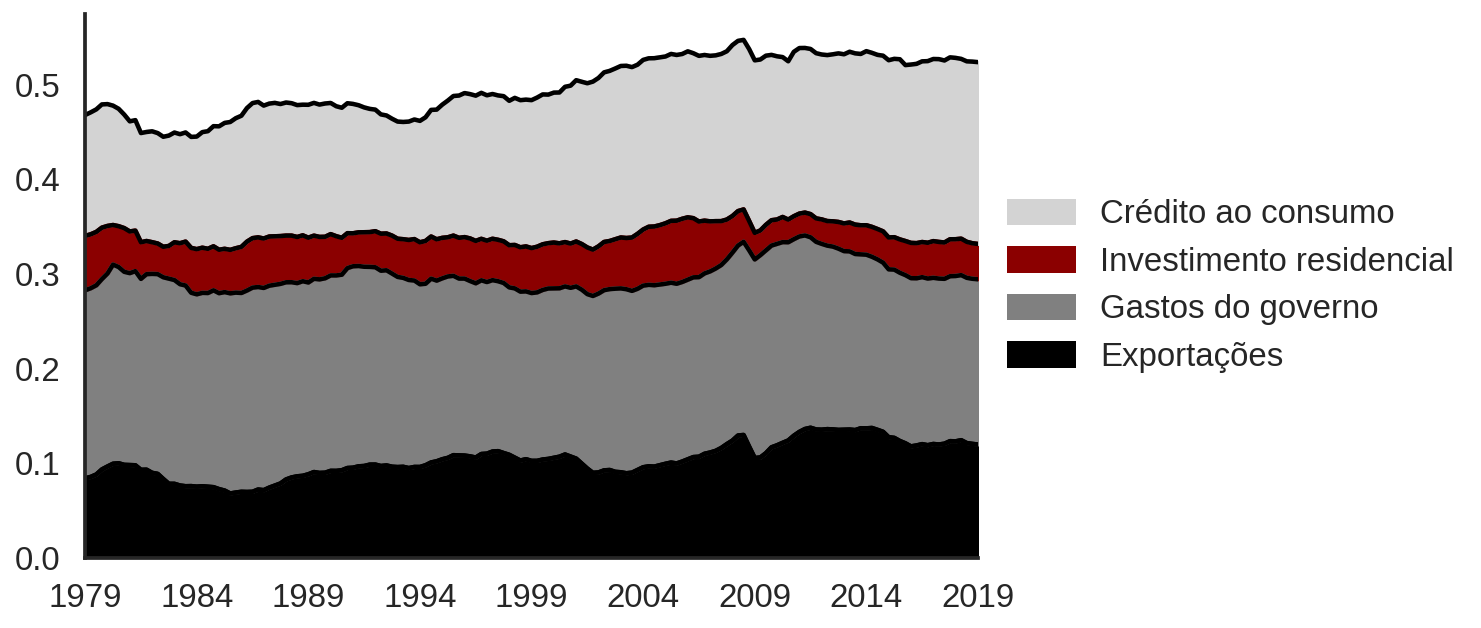

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

df[Z].apply(lambda x: x / df['PIB']).plot(kind='area',
                                          stacked=True,
                                          ax=ax,
                                          legend=False,
                                          color=(
                                              'black',
                                              'grey',
                                              'darkred',
                                              'lightgrey',
                                          ))

df[Z].apply(lambda x: x / df['PIB']).plot(kind='line',
                                          stacked=True,
                                          ax=ax,
                                          legend=False,
                                          color='black',
                                          label=None)

#ax.set_title('Gastos autônomos\n% do PIB')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:3:-1], labels[:3:-1], loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_xlabel('')
sns.despine()
plt.show()
salvar_grafico(file_name="Gastos_autonomos")

# Política econômica

## Política monetária

In [63]:
start = dt(1947, 1, 1)
end = dt(2019, 1, 1)

df = web.DataReader(
    [
        'MORTGAGE30US', # 30-Year Fixed Rate Mortgage Average in the United States
        'FEDFUNDS', # Effective Federal Funds Rate
        'DGS10', # 10-Year Treasury Constant Maturity Rate
        'DGS30', # 30-Year Treasury Constant Maturity Rate
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    'Hipotecas (30 anos)',
    'Fed funds rate',
    'Título de LP (10 anos)',
    'Título de LP (30 anos)',
]
df=((df.resample("M").mean())/100).dropna()
df.index.name = ''
df = df.rolling(12).mean().iloc[df.index>='1979-01',:]
df.head()

Hipotecas (30 anos)  Fed funds rate  Título de LP (10 anos)  \
                                                                          
1979-01-31             0.097470        0.082117                0.085043   
1979-02-28             0.098523        0.084850                0.085931   
1979-03-31             0.099543        0.087600                0.086832   
1979-04-30             0.100495        0.090200                0.087689   
1979-05-31             0.101426        0.092600                0.088444   

            Título de LP (30 anos)  
                                    
1979-01-31                0.085501  
1979-02-28                0.086123  
1979-03-31                0.086787  
1979-04-30                0.087407  
1979-05-31                0.088039

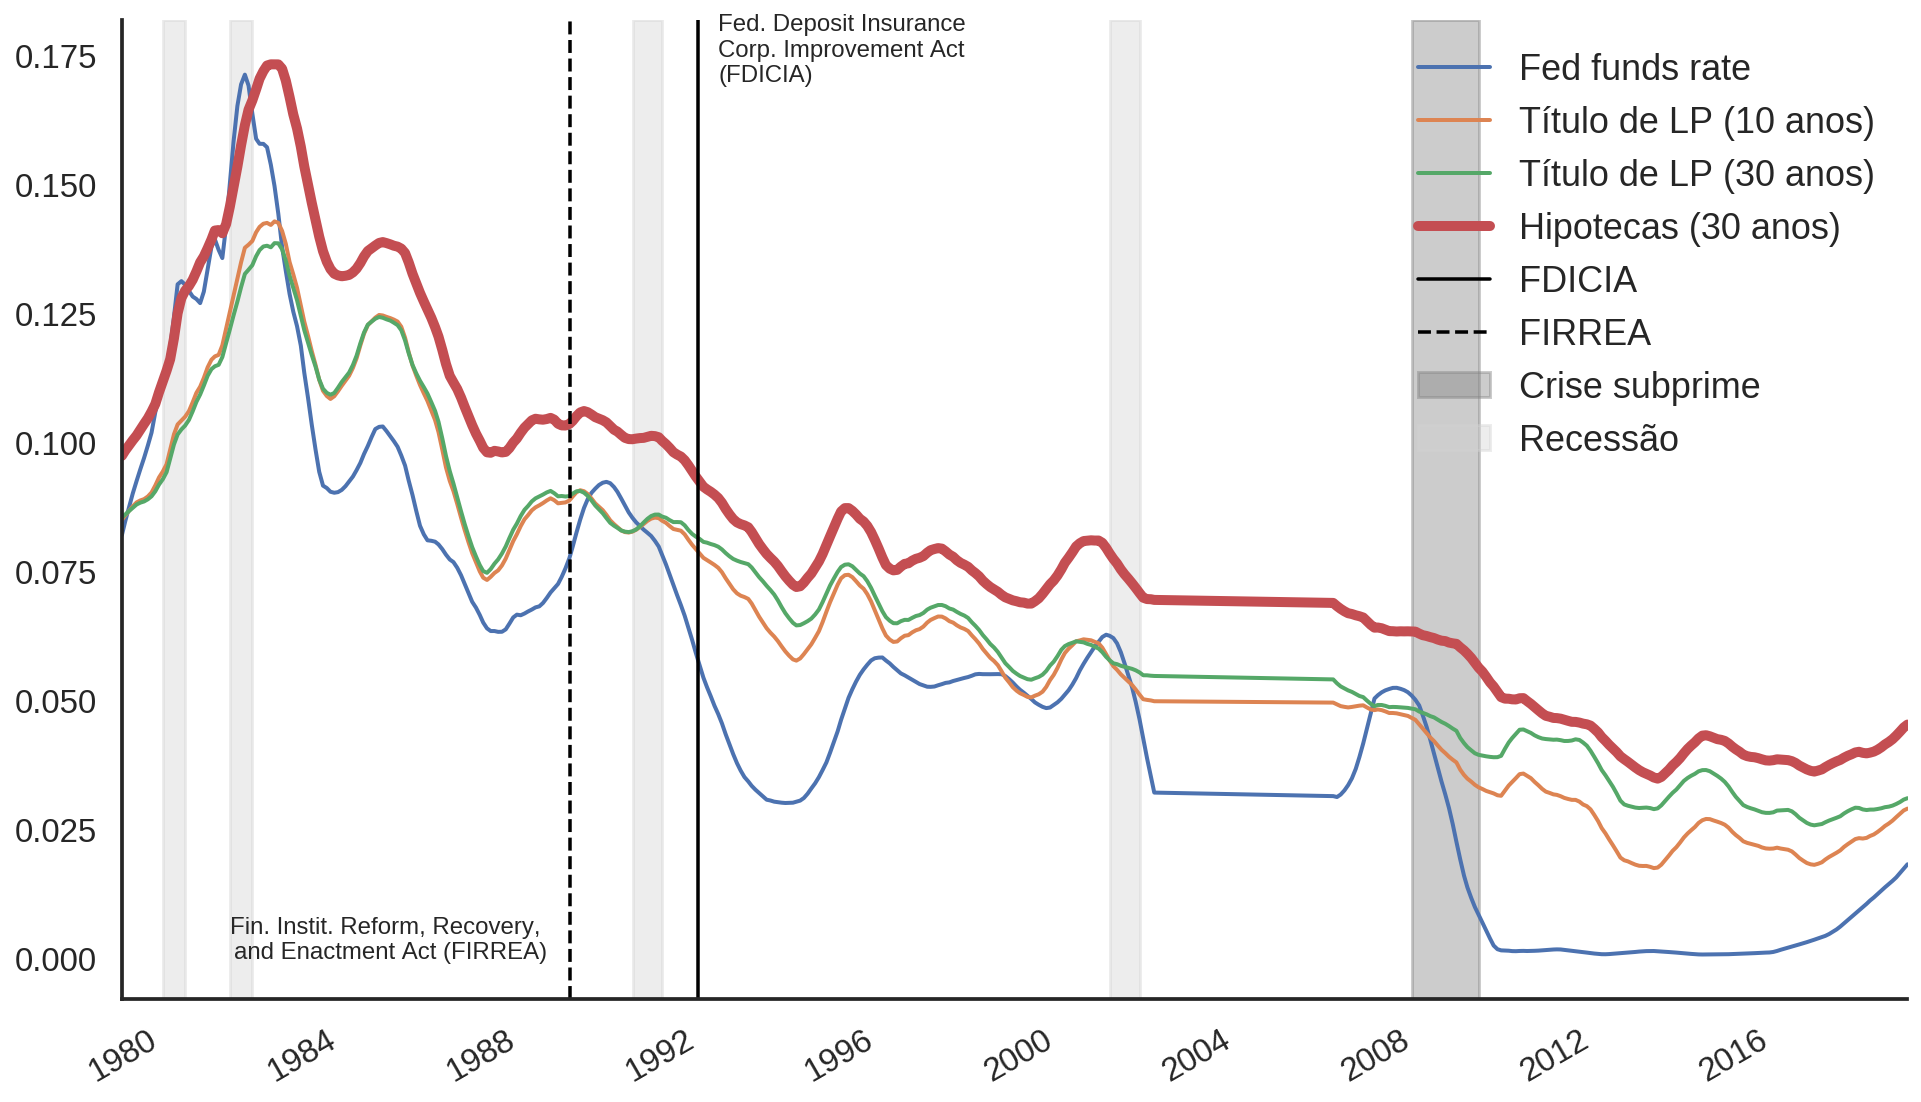

In [64]:
fig, ax = plt.subplots(figsize=(16, 10))

df.drop("Hipotecas (30 anos)", axis='columns').plot(
    ax=ax,
    linewidth=2.,
)

df["Hipotecas (30 anos)"].plot(
    ax=ax,
    linewidth=5,
)

crise_subprime(ax)
crises(ax)
ax.axvline(
    x="1991-12-19", 
    label='FDICIA', 
    color='black', 
    ls='-', 
    linewidth=1.75
)
ax.axvline(
    x="1989-02-06", 
    label='FIRREA', 
    color='black', 
    ls='--', 
    linewidth=1.75
)


ax.text(
    s = "Fed. Deposit Insurance \nCorp. Improvement Act \n(FDICIA)",
    y = 0.17,
    x="1992-06-01", 
    fontsize=12,
       )

ax.text(
    s = "Fin. Instit. Reform, Recovery, \nand Enactment Act (FIRREA)",
    y = 0.,
    x="1988-08-01", 
    fontsize=12,
    horizontalalignment='right'
       )
ax.legend(fontsize=18)

sns.despine()
plt.show()
salvar_grafico(file_name="Juros")

## Regulação bancária

In [65]:
pdf = 'https://www.fdic.gov/bank/historical/history/167_188.pdf'
df = pd.DataFrame(
    data = {
        "Ativos": [3993, 3751, 3287, 3146, 3136, 3246, 3220, 3147, 2949, 2878],
        "Falências": [11, 34, 73, 51, 26, 54, 65, 59, 190, np.NAN],
        "Fusões supervisionadas": [21, 54, 184, 34, 14, 10, 5, 5, 6, np.NAN],
        "Fusões voluntárias": [63, 215, 215, 83, 31, 47, 45, 74, 25, np.NAN],
        "S&L insolventes": [43, 112, 415, 515, 695, 705, 672, 672, 508, 516],
    },
    index=[1980 + i for i in range(10)]
)

df

Ativos  Falências  Fusões supervisionadas  Fusões voluntárias  \
1980    3993       11.0                    21.0                63.0   
1981    3751       34.0                    54.0               215.0   
1982    3287       73.0                   184.0               215.0   
1983    3146       51.0                    34.0                83.0   
1984    3136       26.0                    14.0                31.0   
1985    3246       54.0                    10.0                47.0   
1986    3220       65.0                     5.0                45.0   
1987    3147       59.0                     5.0                74.0   
1988    2949      190.0                     6.0                25.0   
1989    2878        NaN                     NaN                 NaN   

      S&L insolventes  
1980               43  
1981              112  
1982              415  
1983              515  
1984              695  
1985              705  
1986              672  
1987              672  
1988              508  
1989              516

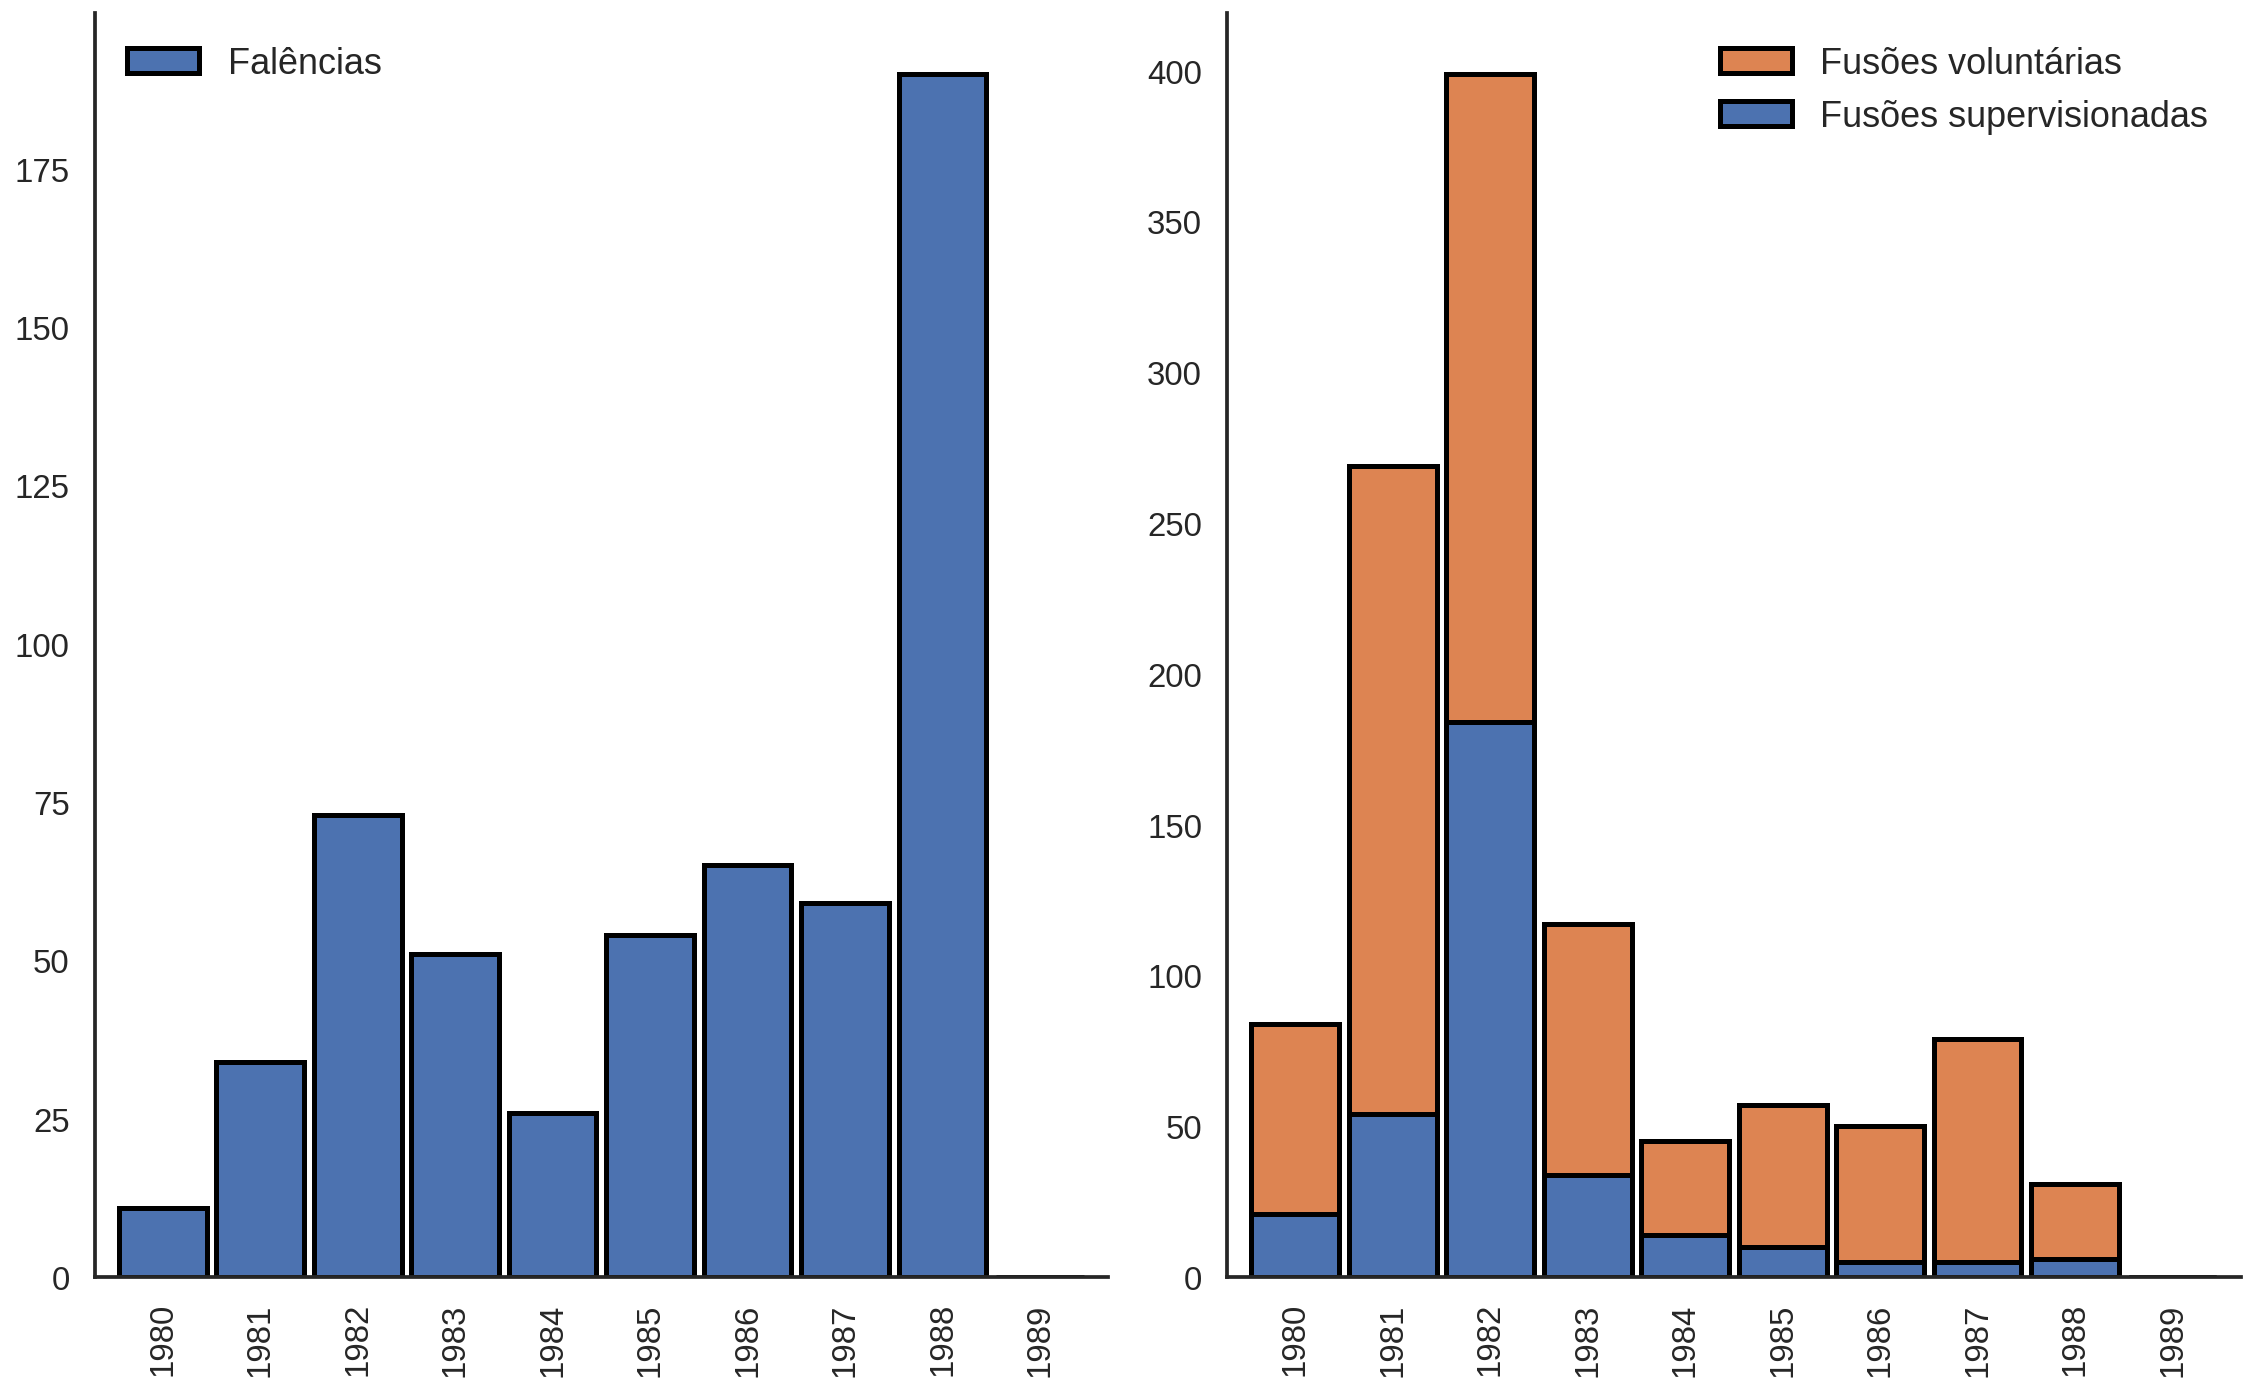

In [66]:
sns.set_context('talk')
fig, ax = plt.subplots(1, 2, figsize=(16, 10))

df[["Falências"]].plot(ax=ax[0], kind='bar', edgecolor='black', lw=2.5,stacked=True,
                                                      width=0.9)
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[::-1], labels[::-1], fontsize=18)

df[["Fusões supervisionadas", "Fusões voluntárias"]].plot(ax=ax[1],
                                                      kind='bar',
                                                      edgecolor='black',
                                                      lw=2.5,
                                                      stacked=True,
                                                      width=0.9)
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(handles[::-1], labels[::-1], fontsize=18)

plt.tight_layout()
sns.despine()
plt.show()
salvar_grafico("Falencias_Fusoes")

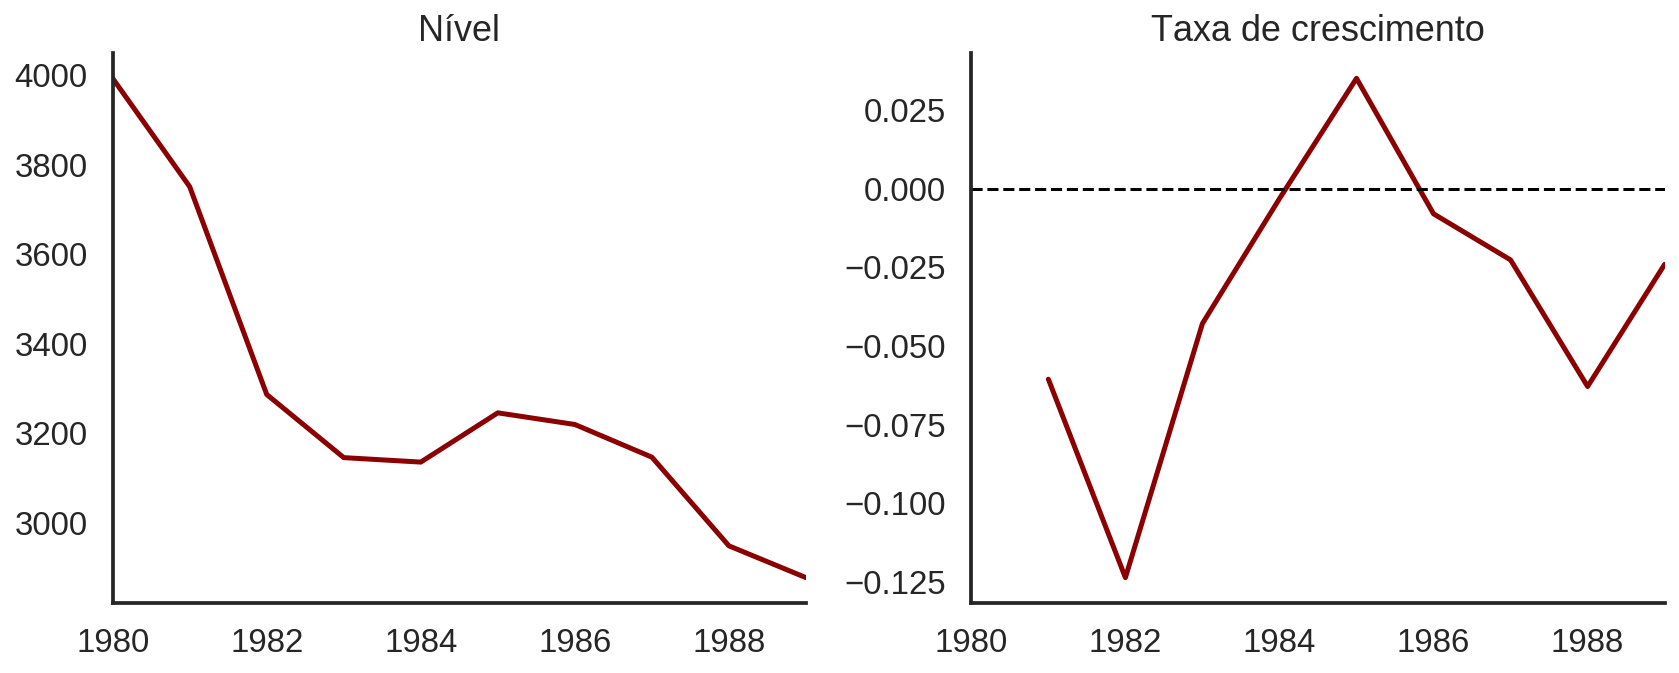

In [67]:
sns.set_context('talk')
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

df[["Ativos"]].plot(ax=ax[0], lw=2.5, color='darkred', title="Nível", legend=False)
df[["Ativos"]].pct_change().plot(ax=ax[1], lw=2.5, color='darkred', title="Taxa de crescimento", legend=False)
ax[1].axhline(y=0, ls='--', color='black', lw=1.5)

plt.tight_layout()
sns.despine()
plt.show()
salvar_grafico(file_name="Numero_S&L")

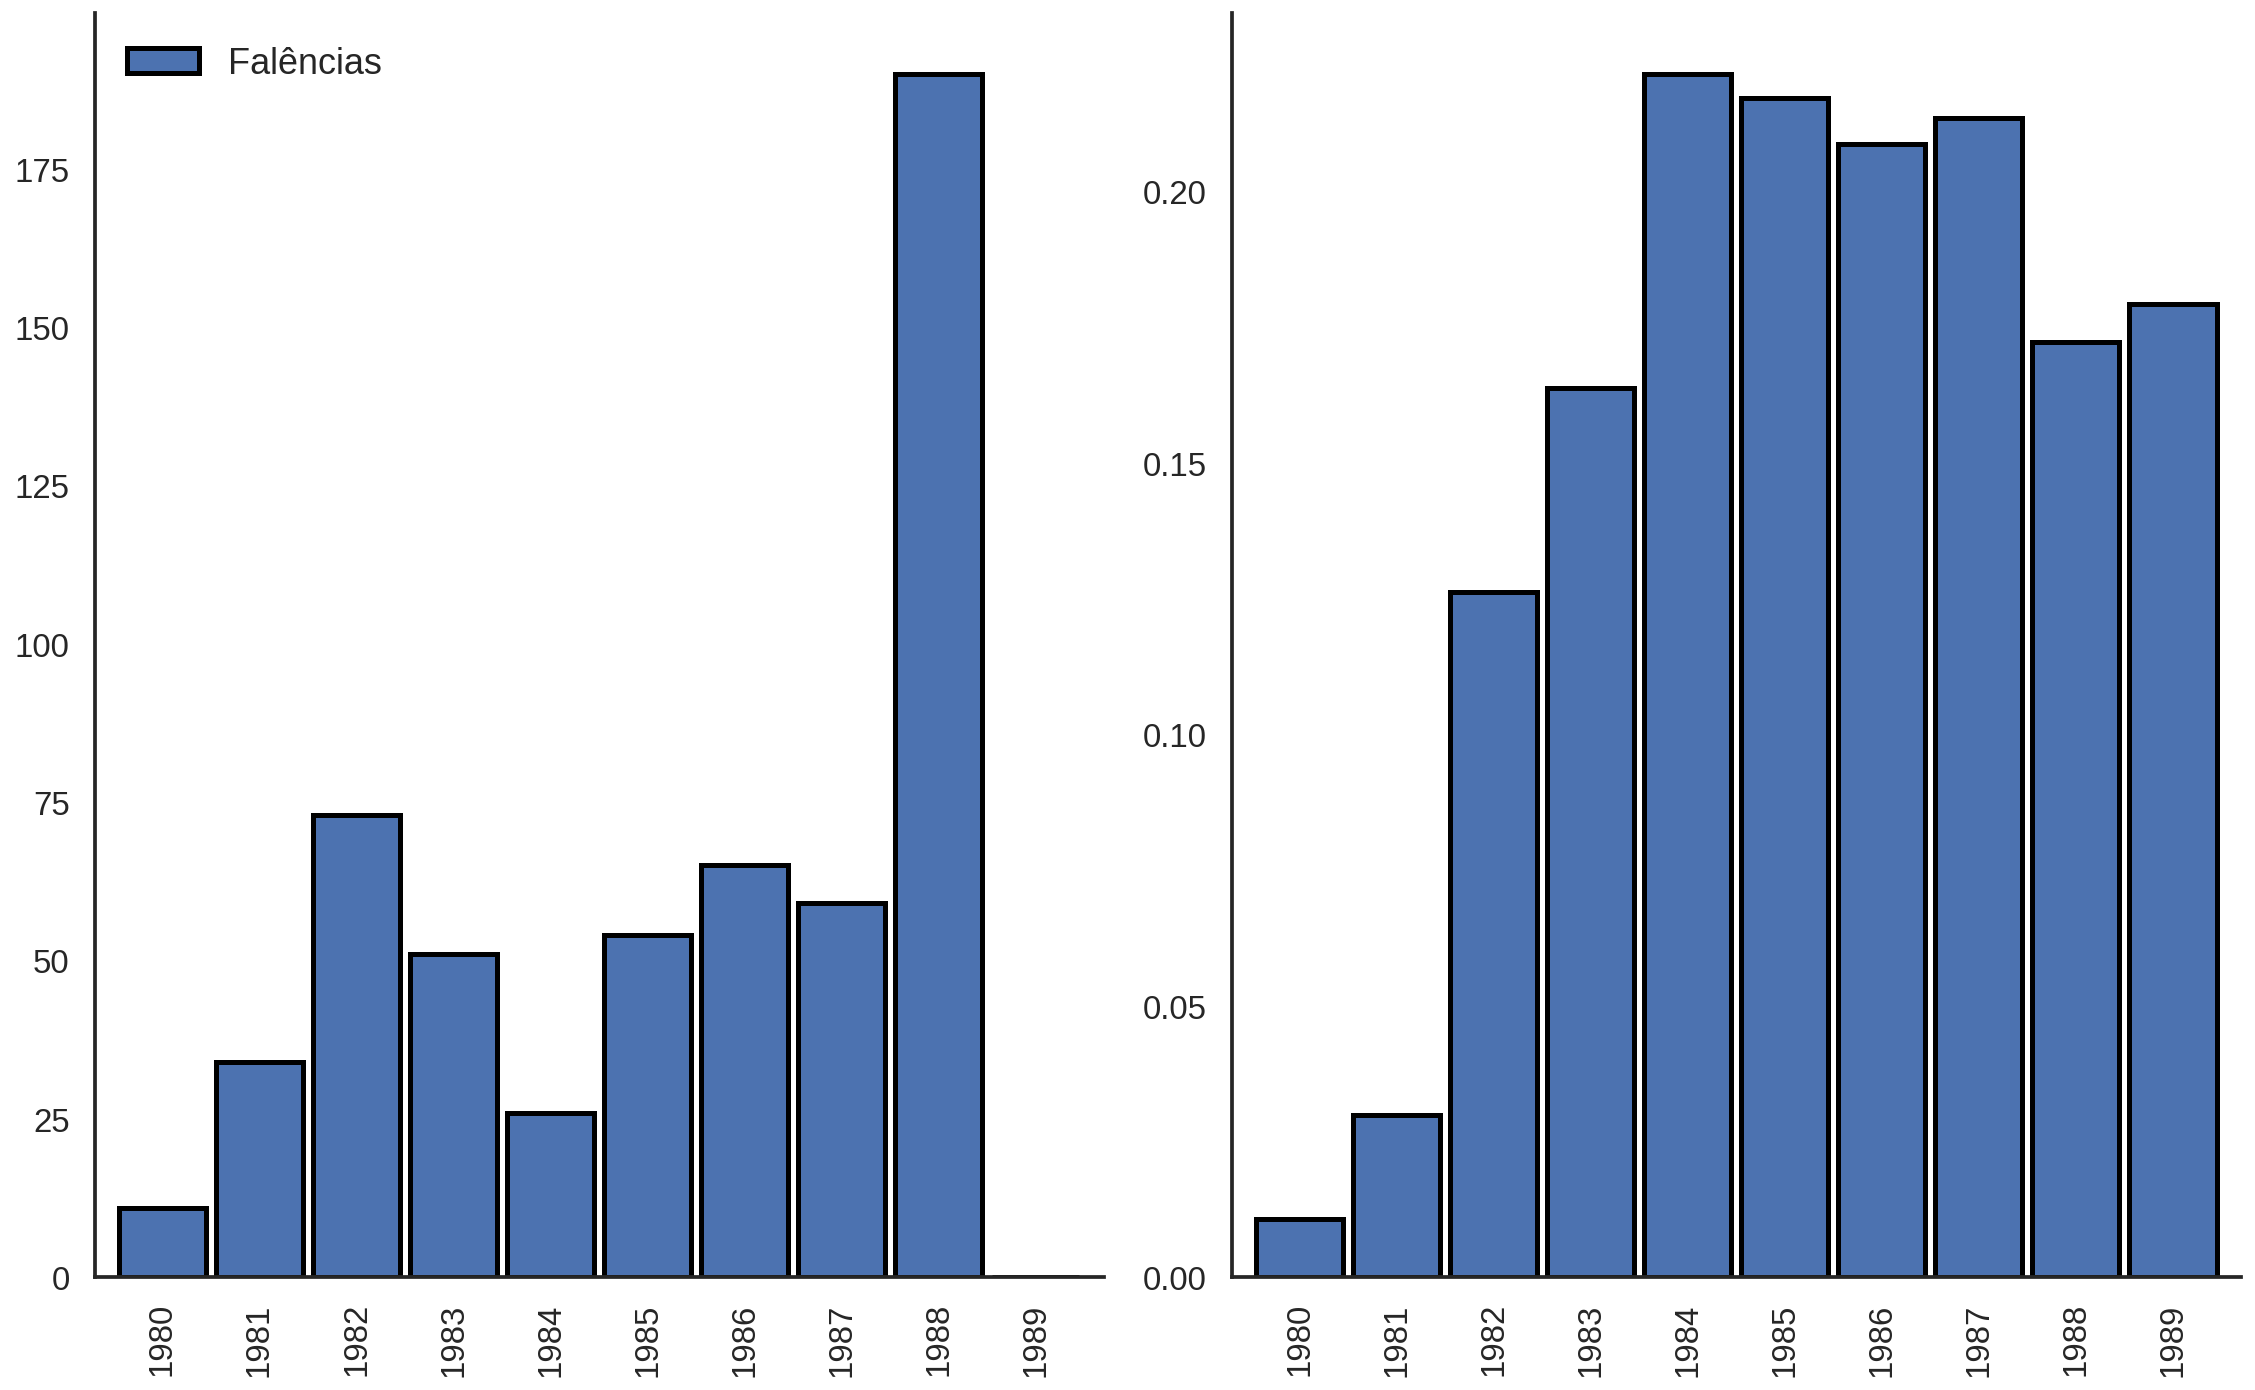

In [68]:
sns.set_context('talk')
fig, ax = plt.subplots(1, 2, figsize=(16, 10))

df[["Falências"]].plot(ax=ax[0], kind='bar', edgecolor='black', lw=2.5,stacked=True,
                                                      width=0.9)
handles, labels = ax[0].get_legend_handles_labels()
ax[0].legend(handles[::-1], labels[::-1], fontsize=18)

(df["S&L insolventes"]/df["Ativos"]).plot(ax=ax[1], kind='bar', edgecolor='black', lw=2.5,stacked=True,
                                                      width=0.9)


plt.tight_layout()
sns.despine()
plt.show()

# Taxa própria 

In [69]:
start=dt(1987,1,1)
end=dt(2019,1,1)

df = web.DataReader(
    [
        "PRFI",
        "CSUSHPISA",
        "MORTGAGE30US",
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    "Investimento residencial", 
    "Preço dos imóveis", 
    "Taxa de juros",
]
df.index.name = ""


df['Taxa de juros'] = df['Taxa de juros'].divide(100)
df = df.resample('M').last()

df['Preço dos imóveis'] = df['Preço dos imóveis']/df['Preço dos imóveis'][0]
df = df.resample('Q').last()
df["Inflação"]= df["Preço dos imóveis"].pct_change()
df["Taxa Própria"] = ((1+df["Taxa de juros"])/(1+df["Inflação"])) -1


df['gZ'] = df["Investimento residencial"].pct_change()

df.head()

Investimento residencial  Preço dos imóveis  Taxa de juros  \
                                                                         
1987-03-31                   246.672           1.012065         0.0903   
1987-06-30                   249.693           1.032803         0.1035   
1987-09-30                   249.969           1.052400         0.1102   
1987-12-31                   252.825           1.070856         0.1061   
1988-03-31                   250.115           1.088578         0.0999   

            Inflação  Taxa Própria        gZ  
                                              
1987-03-31       NaN           NaN       NaN  
1987-06-30  0.020491      0.081343  0.012247  
1987-09-30  0.018975      0.089527  0.001105  
1987-12-31  0.017537      0.087036  0.011425  
1988-03-31  0.016549      0.081994 -0.010719

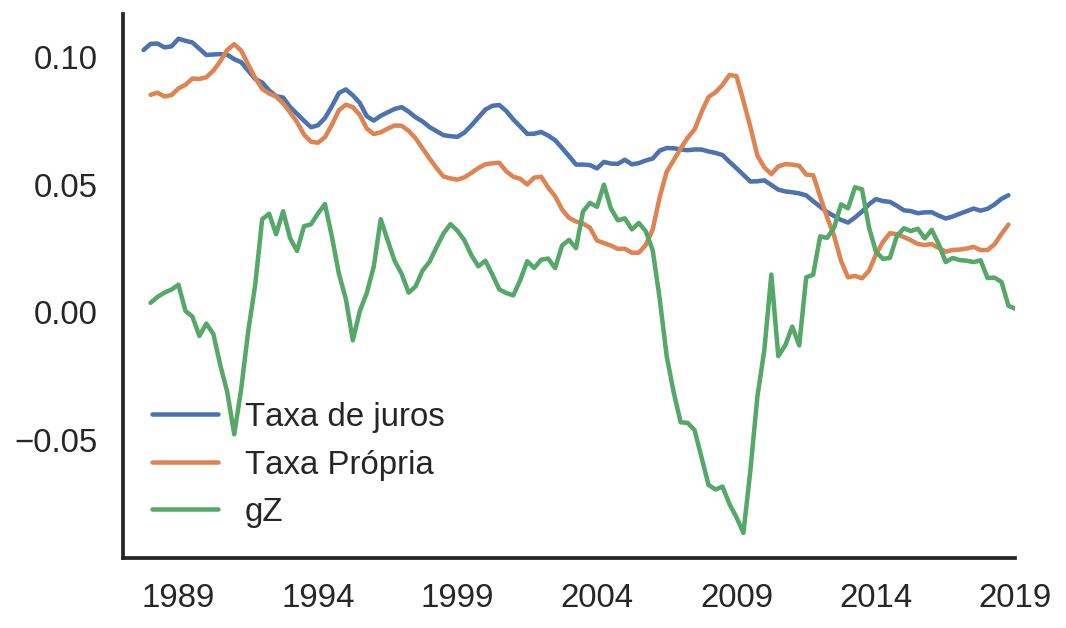

In [70]:
fig, ax = plt.subplots(figsize=(8,5))

df[['Taxa de juros', "Taxa Própria", "gZ"]].rolling(4).mean().plot(ax=ax)

sns.despine()
plt.show()

salvar_grafico("TxPropria_Investo")

In [71]:
df = pd.read_csv("../../Modelo/SeriesTemporais/Dados_yeojohnson.csv", index_col=[0], parse_dates=True)
df.head()

Inflação        gZ  Taxa Própria  Taxa de juros
1992-03-31  0.002998  0.065517      0.120417         0.0898
1992-06-30  0.000747  0.052722      0.114802         0.0843
1992-09-30 -0.001192  0.007945      0.111184         0.0802
1992-12-31  0.005745  0.063046      0.100172         0.0814
1993-03-31  0.002504  0.011942      0.095222         0.0750

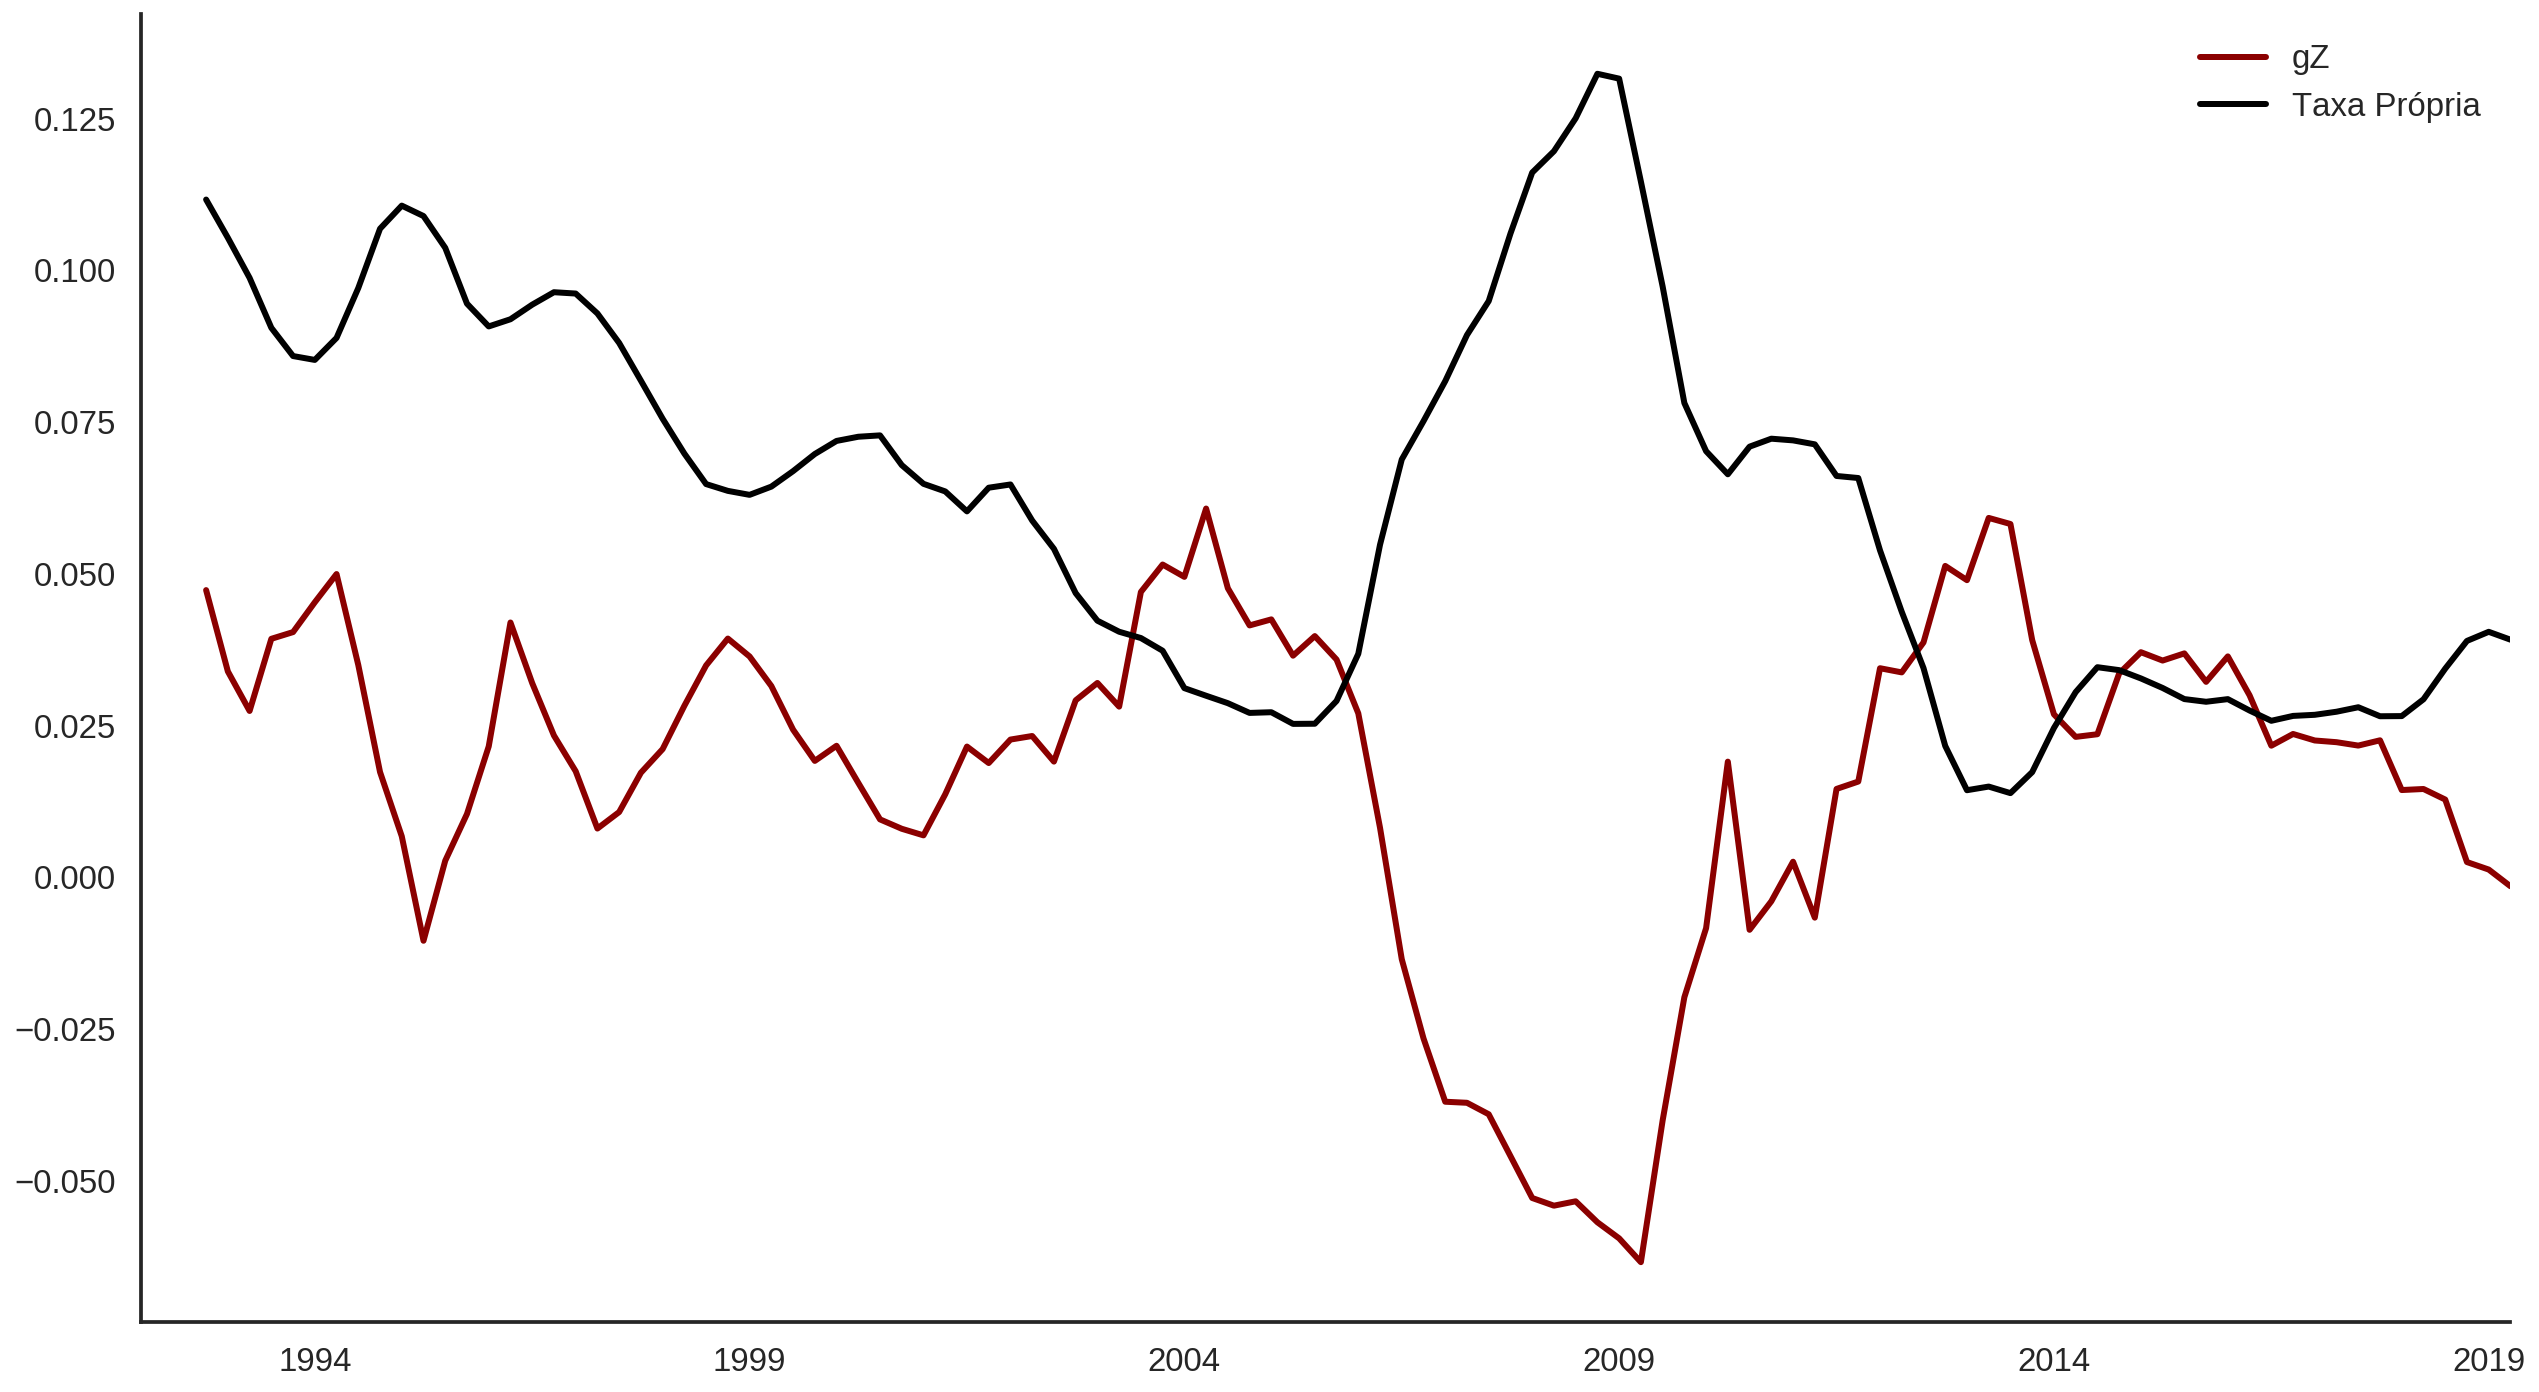

In [72]:
fig, ax = plt.subplots(figsize=(18,10), sharey=True)

df[[
    #'Taxa de juros', 
    #"Inflação", 
    "gZ", 
    "Taxa Própria"
]].rolling(4).mean().plot(
    ax=ax, 
    #subplots=True, layout=(2,2)
    subplots=False, 
    lw = 3,
    color=('darkred', 'black')
)

plt.tight_layout()
sns.despine()
plt.show()

salvar_grafico("YeoJohnson_Tx_gZ")

/home/gpetrini/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/__init__.py:62: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


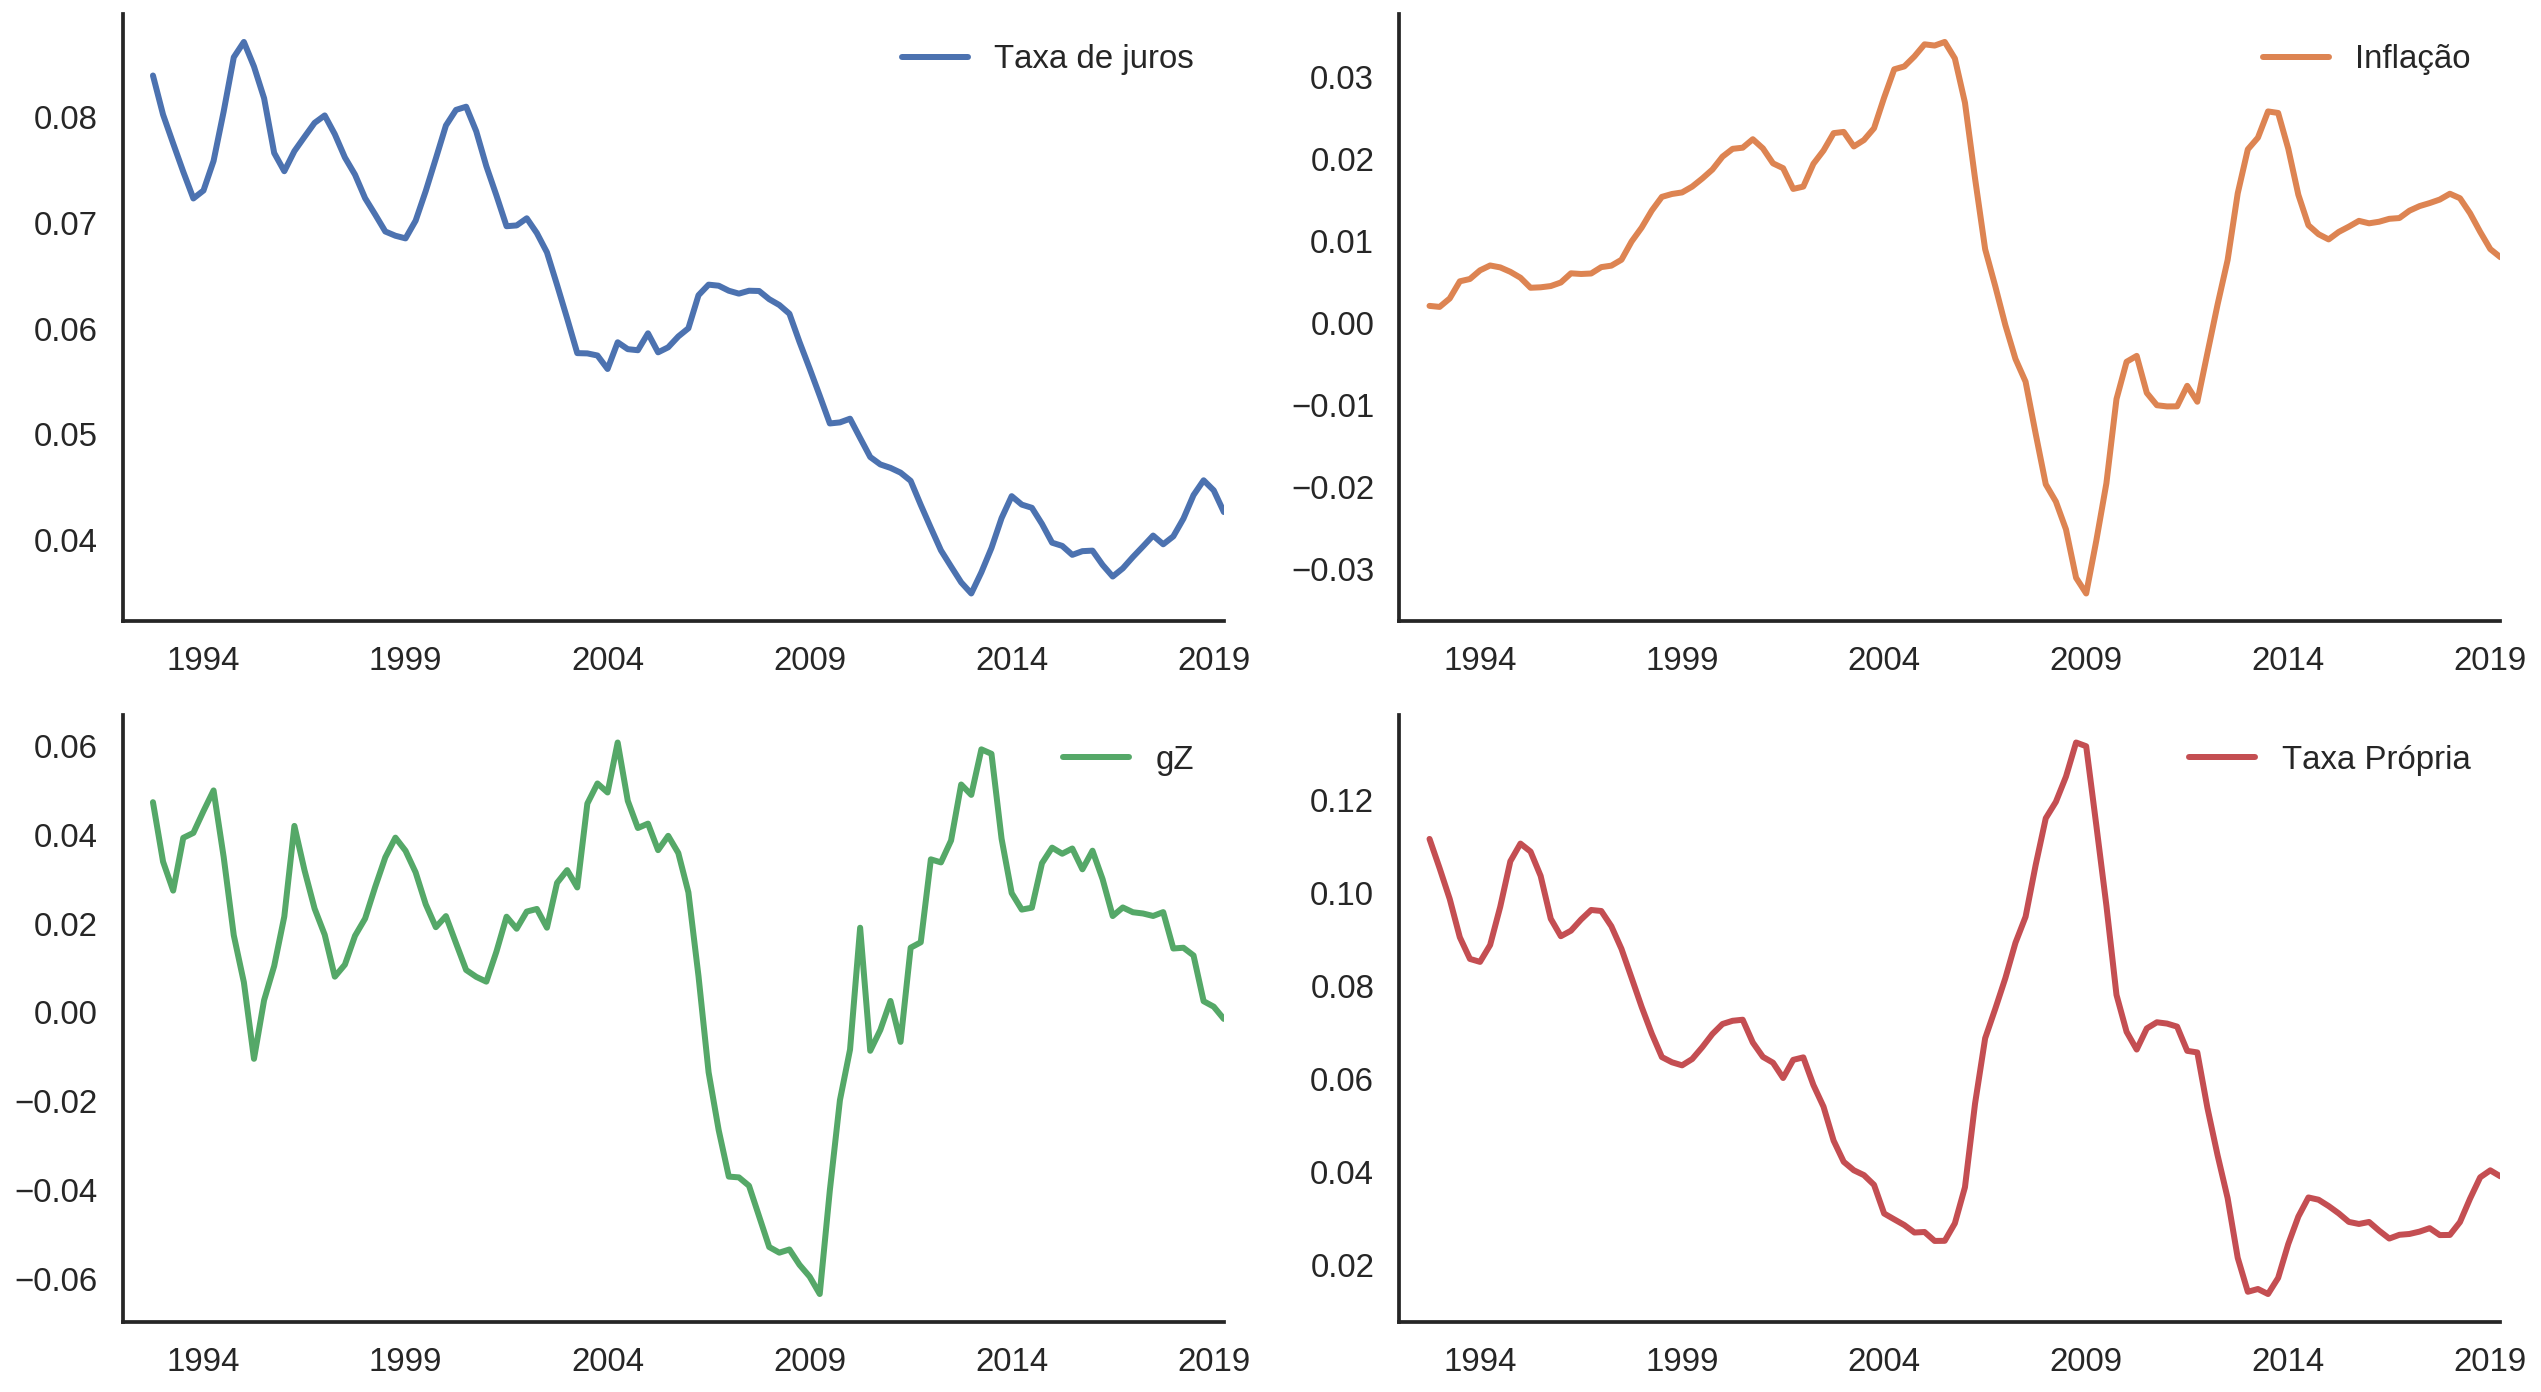

In [73]:
fig, ax = plt.subplots(figsize=(18,10), sharey=True)

df[[
    'Taxa de juros', 
    "Inflação", 
    "gZ", 
    "Taxa Própria"
]].rolling(4).mean().plot(
    ax=ax, 
    subplots=True, layout=(2,2),
    #subplots=False, 
    lw = 3,
)

plt.tight_layout()
sns.despine()
plt.show()

salvar_grafico("YeoJohnson_All")

## $k$: PRFI/PFI

In [77]:
start=dt(1987,1,1)
end=dt(2019,1,1)

df = web.DataReader(
    [
        "PRFI",
        "FPI",
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    "Investimento residencial", 
    "Investimento total", 
]
df.index.name = ""


df['k'] = df['Investimento residencial']/df['Investimento total']

df.head()

Investimento residencial  Investimento total         k
                                                                  
1987-01-01                   246.672             843.222  0.292535
1987-04-01                   249.693             858.064  0.290996
1987-07-01                   249.969             875.449  0.285532
1987-10-01                   252.825             883.376  0.286203
1988-01-01                   250.115             891.613  0.280520

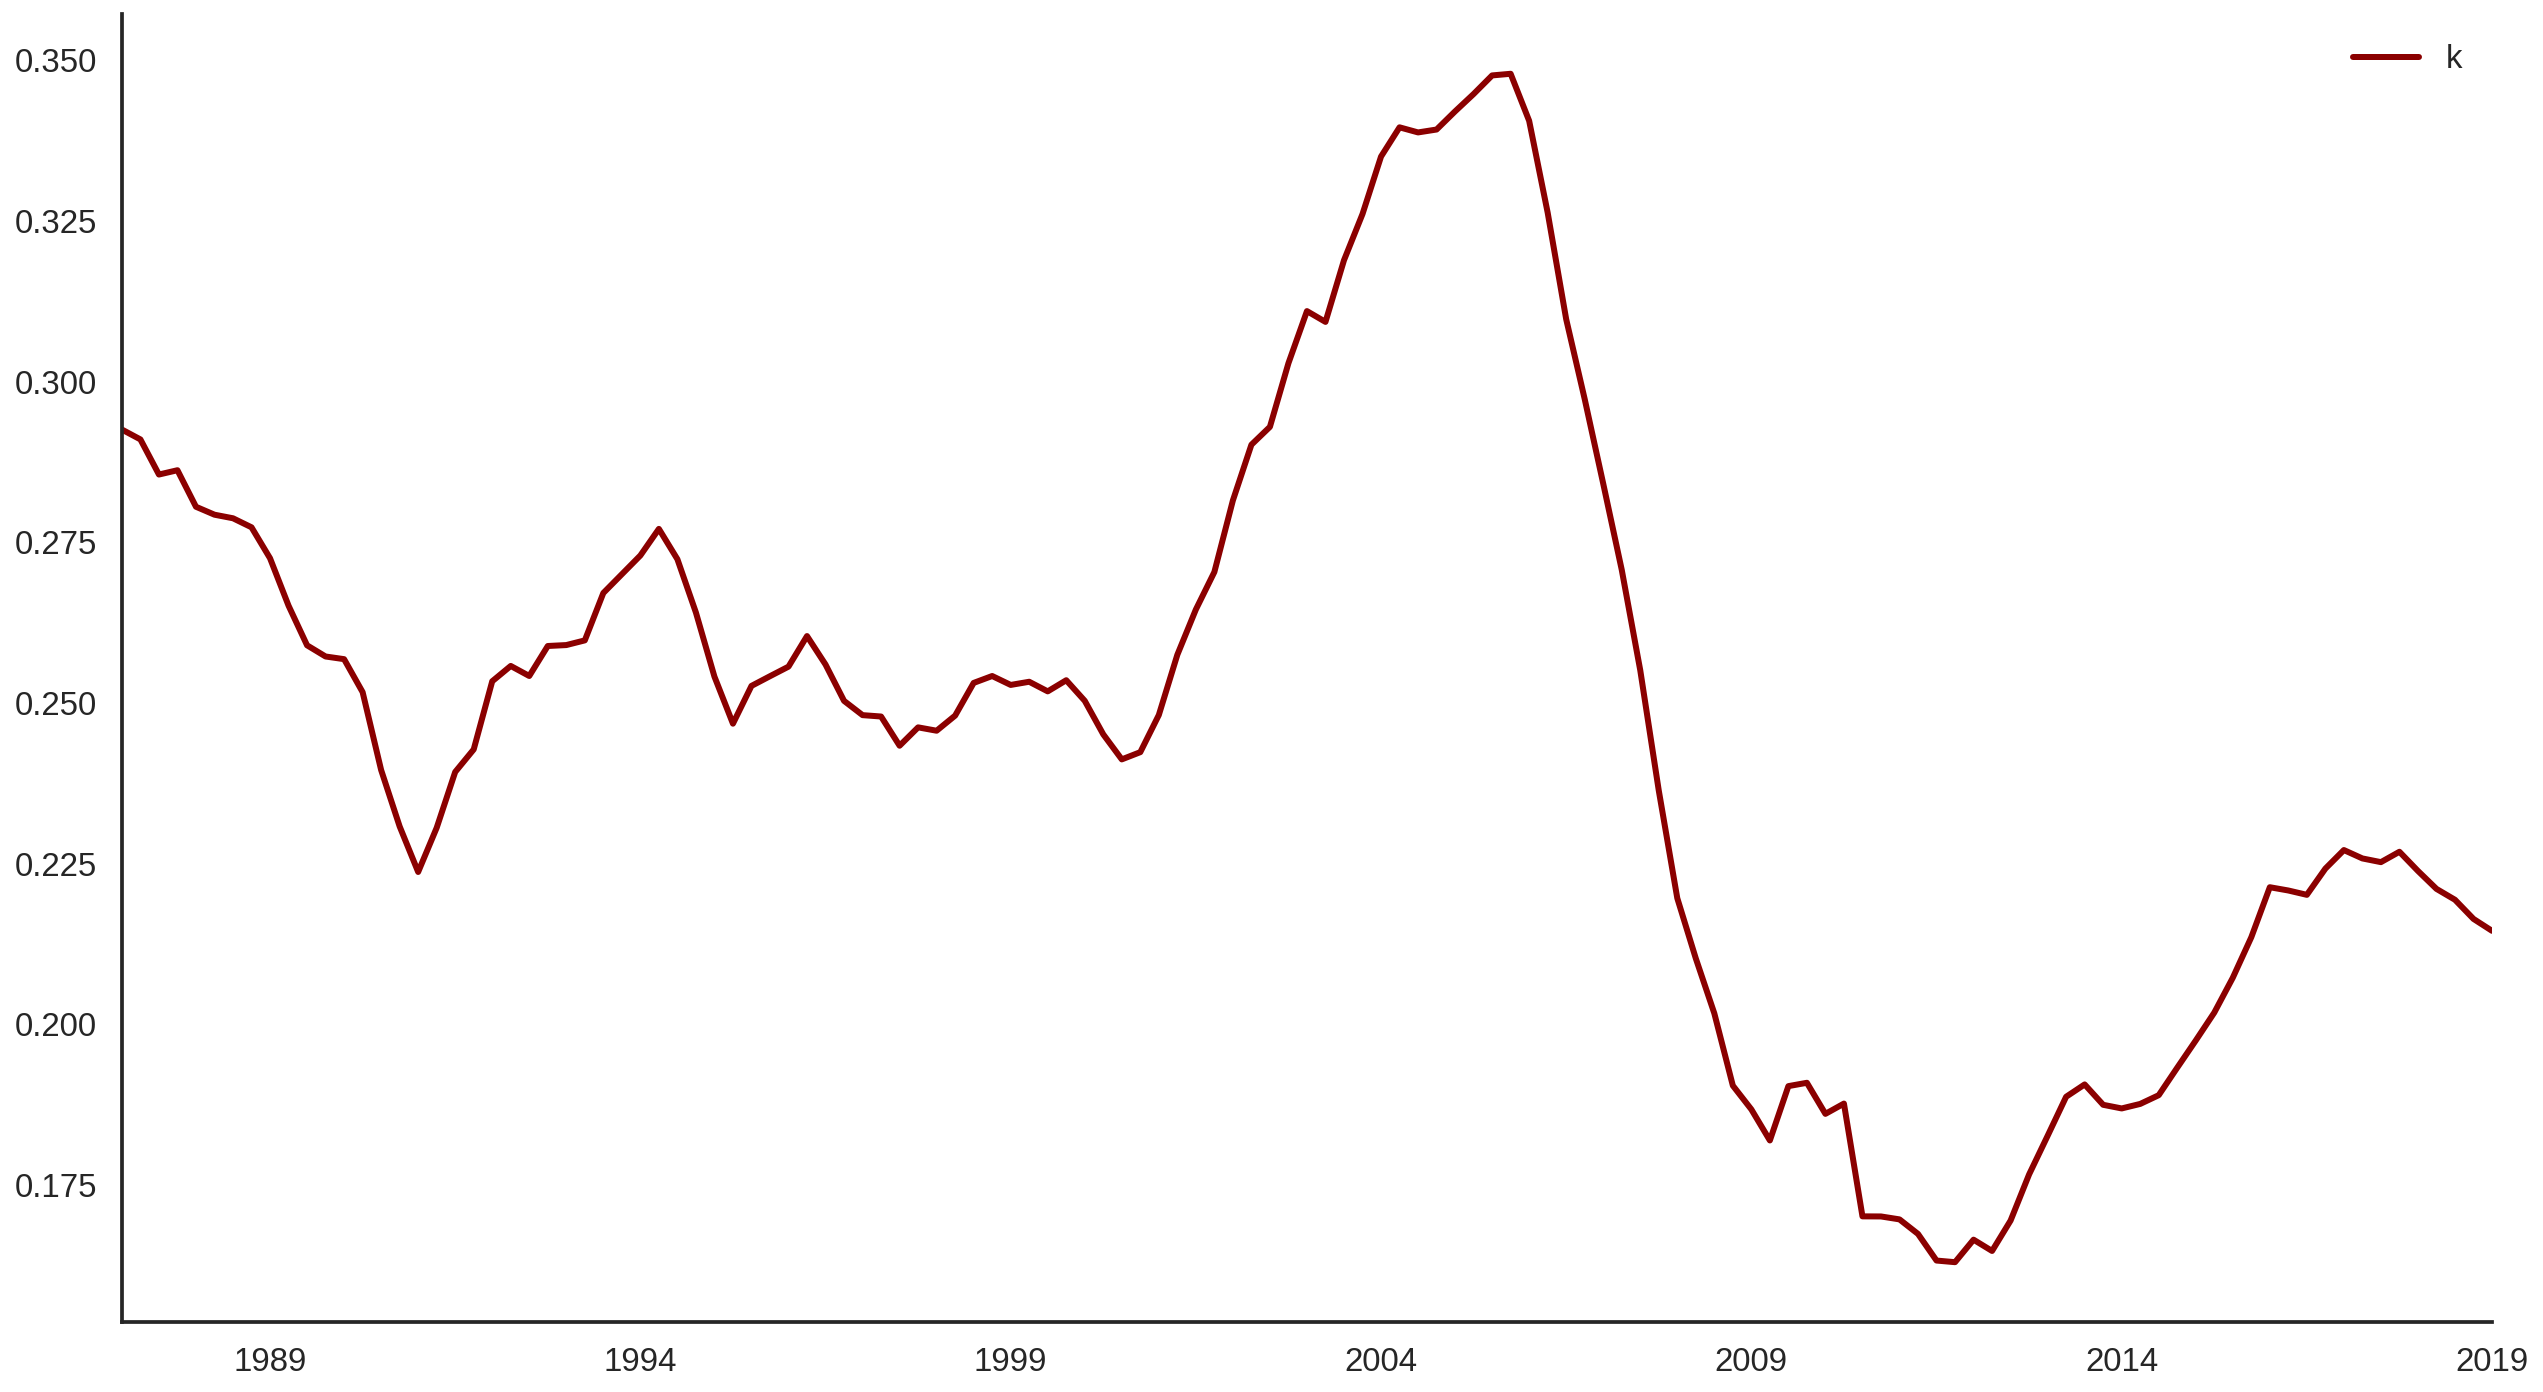

In [78]:
fig, ax = plt.subplots(figsize=(18,10), sharey=True)

df[['k']].plot(
    ax=ax, 
    lw = 3,
    color=('darkred')
)

plt.tight_layout()
sns.despine()
plt.show()

salvar_grafico("Ih_k")

In [82]:
start=dt(2001,1,1)
end=dt(2019,1,1)

df = web.DataReader(
    [
        "ETOTALUSQ176N",
        "RKNANPUSA666NRUG",
        "CSUSHPINSA"
    ], 
    'fred', 
    start, 
    end
)

df.columns = [
    "Residências (unidade)", 
    "Capital total", 
    "Preços"
]
df.index.name = ""
for i in df.columns:
    df[i] = df[i].apply(lambda x: x/df[i].loc["2001-01-01"])

df = df.resample('A').last()
df['Imóveis'] = df['Preços']*df['Residências (unidade)']
df['k'] = df["Imóveis"]/df["Capital total"]

df.head()

Residências (unidade)  Capital total    Preços   Imóveis         k
                                                                              
2001-12-31               1.010976       1.000000  1.062638  1.074301  1.074301
2002-12-31               1.025591       1.023475  1.164217  1.194011  1.166624
2003-12-31               1.041007       1.048274  1.278506  1.330933  1.269642
2004-12-31               1.057513       1.075649  1.452868  1.536427  1.428373
2005-12-31               1.074625       1.105444  1.649160  1.772228  1.603182

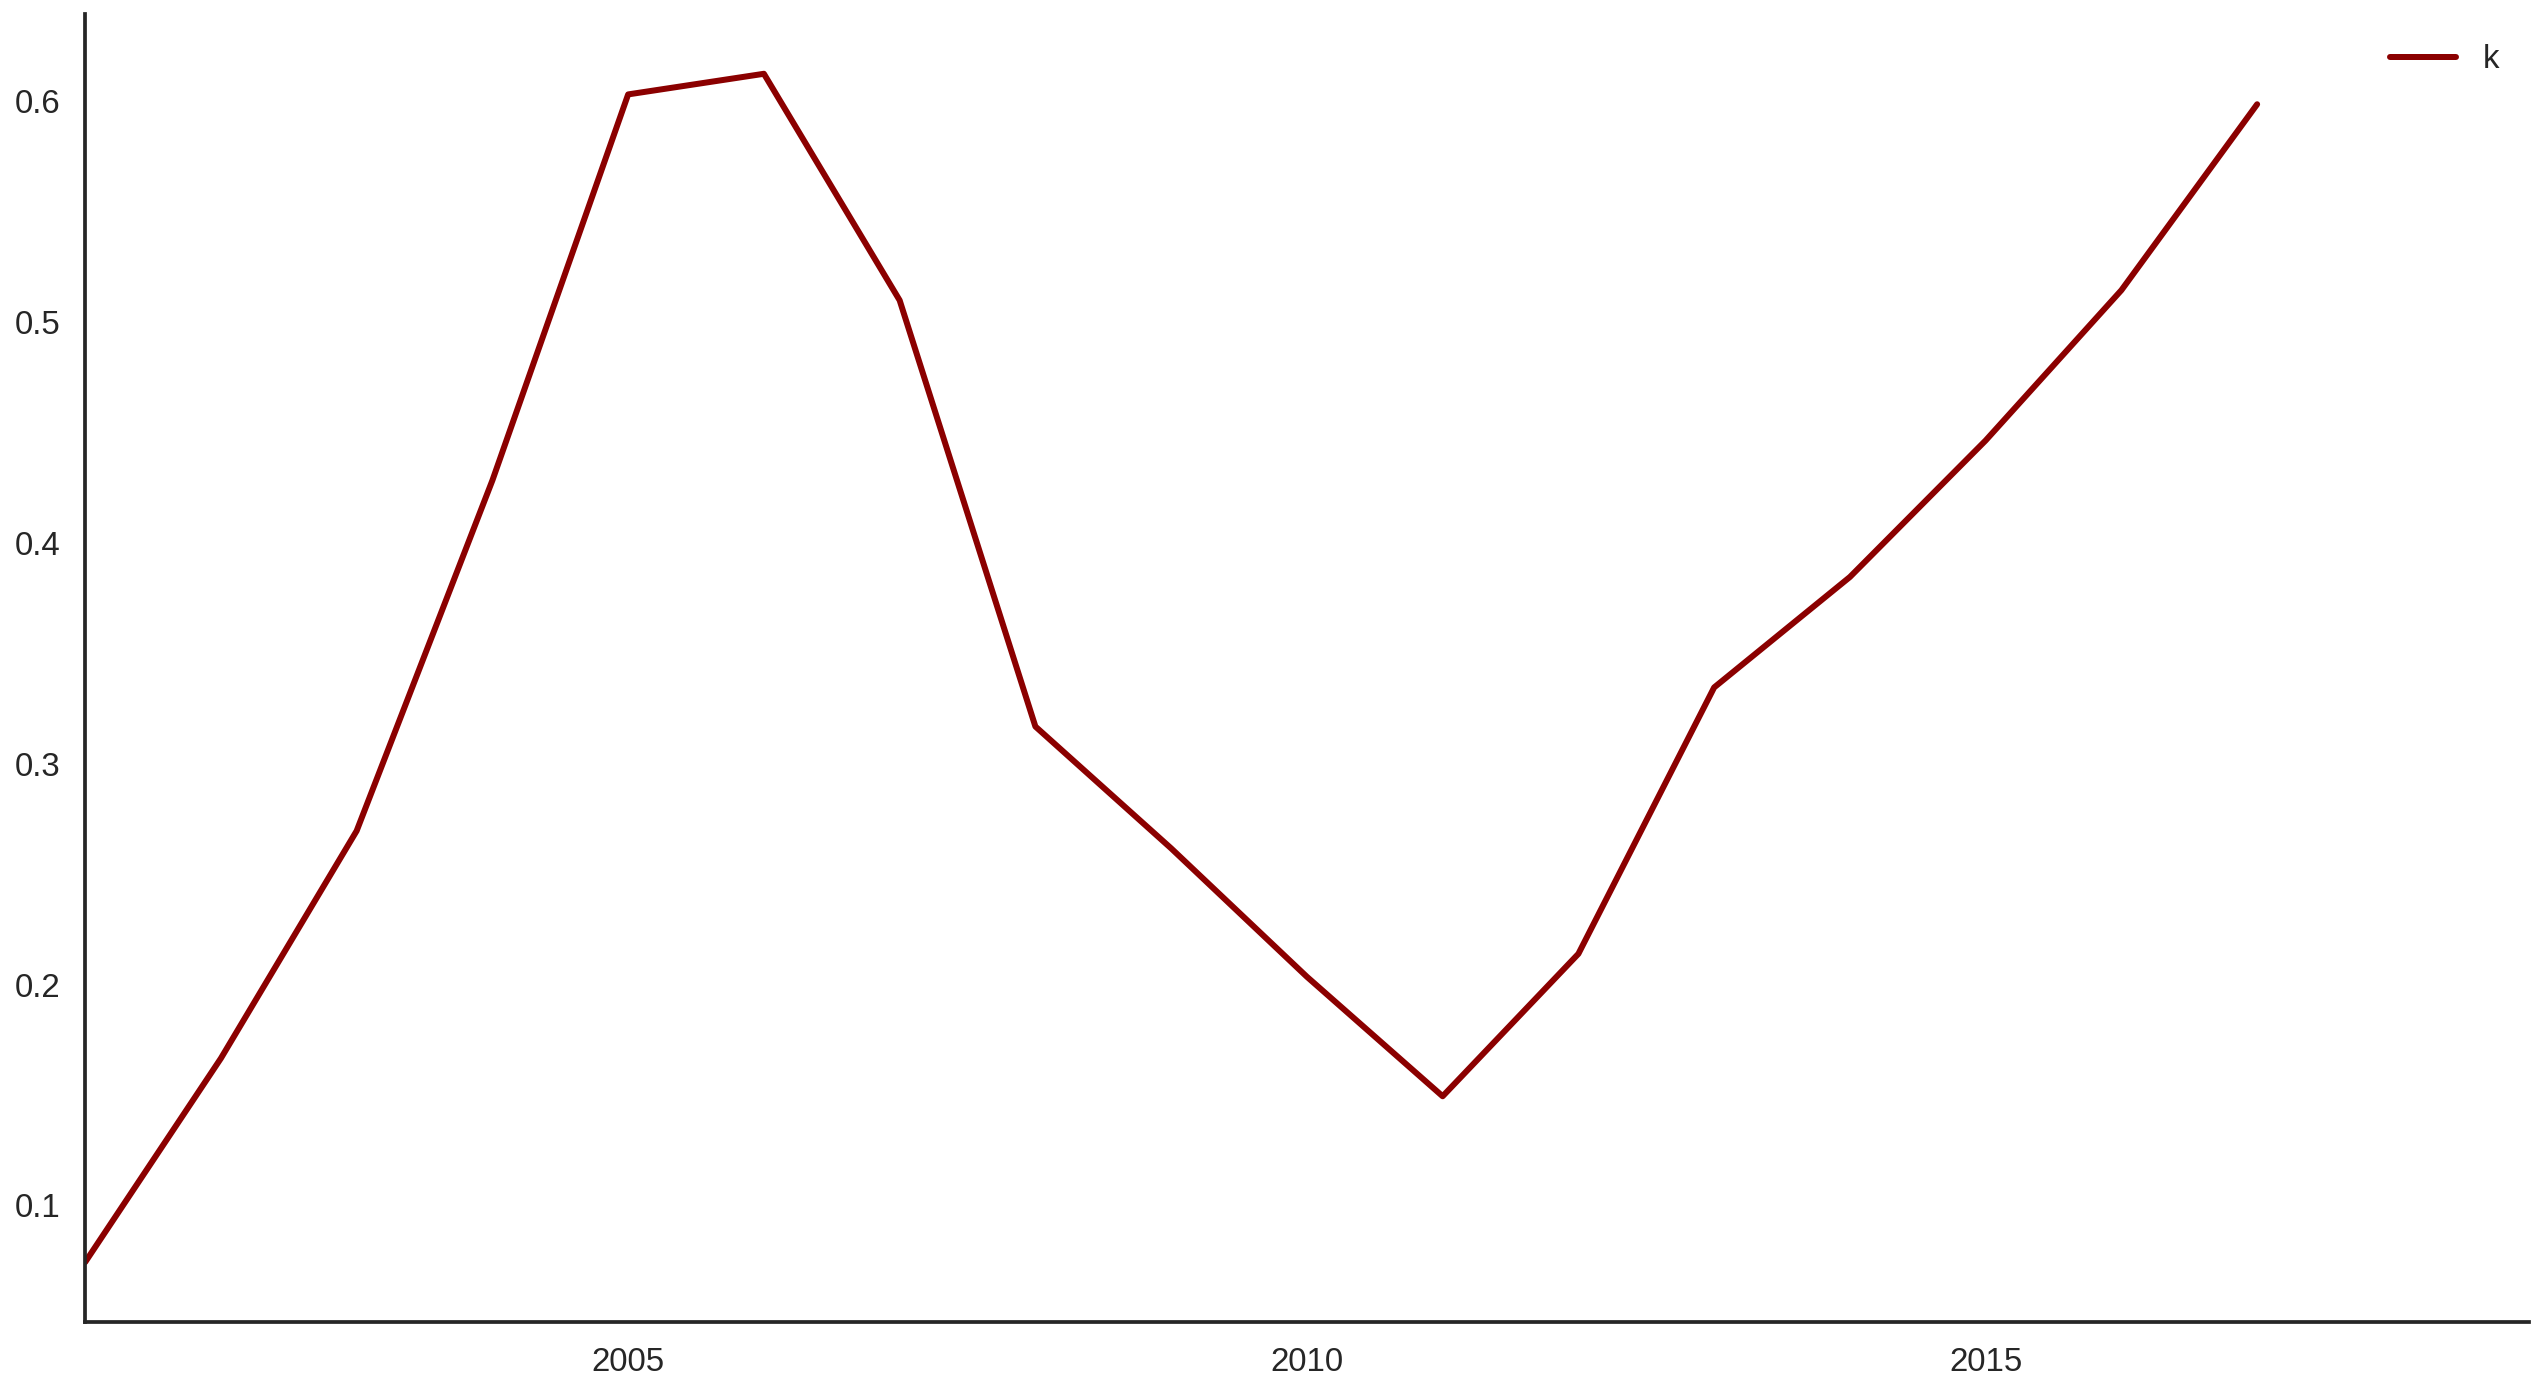

In [83]:
fig, ax = plt.subplots(figsize=(18,10), sharey=True)

(df[['k']]-1).plot(
    ax=ax, 
    lw = 3,
    color=('darkred')
)

plt.tight_layout()
sns.despine()
plt.show()

salvar_grafico("Ih_k_Estimado")

# Encenrando

In [ ]:
print(f'Tempo de execução: {dt.now() - t1}')